# NLTK - WordCloud

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import seaborn as sns
import re

from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
# Define stop words and punctuation.
stop_words = stopwords.words('english')

# construct list of common words to exclude that are not covered by stopwords
excludes = ["one", "two", "three", "four", "five", "first", "second", "third", "fourth", "year", "twenty", "quarter", "thousand", "think",
            "question", "see", "also", "would", "thank", "you", "u", "chf", "yes", "sure", "just", "is", "morning", "begin", "actually", "clearly",
            "said", "look", "say", "obviously", "really", "credit", "suisse", "thomas", "group", "david", "c"]

# instantiate WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
# Function to clean the document and display word cloud.
def word_cloud_display(df, key):
  top_number_of_results = 50
  all_transcripts = df[key].str.lower().str.cat(sep=' ')
  all_text = re.sub('[^A-Za-z]+', ' ', all_transcripts)

  word_tokens = word_tokenize(all_text)

  filtered_all_transcripts = [lemmatizer.lemmatize(word) for word in word_tokens if (word not in stop_words) and not(word.isnumeric()) and (word not in excludes)]

  word_distribution = nltk.FreqDist(filtered_all_transcripts)
  transcript_word_frequency_distribution_df = pd.DataFrame(word_distribution.most_common(top_number_of_results), columns=['Word', 'Frequency'])

  plt.figure(figsize=(8,8))
  sns.set_style("whitegrid")
  ax = sns.barplot(x = "Word", y = "Frequency", data = transcript_word_frequency_distribution_df.head(10))

  plt.figure(figsize = (60,60))
  wc = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
  wc.generate(' '.join(filtered_all_transcripts))
  plt.imshow(wc)
  plt.axis('off')

In [6]:
# 'credit suisse' / 'svb' / 'nomura'
bank = 'credit suisse'

# load the transcript file
def load_transcript():
  # get the transcript
  csv_path = f'/content/drive/MyDrive/Colab Notebooks/Employer Project/data/processed/{bank}/final_qa_df.csv'

  return pd.read_csv(csv_path)

transcript_df = load_transcript()

## WordCloud - Quarterly - Original Transcript

<ipython-input-4-9b7dff9d721a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


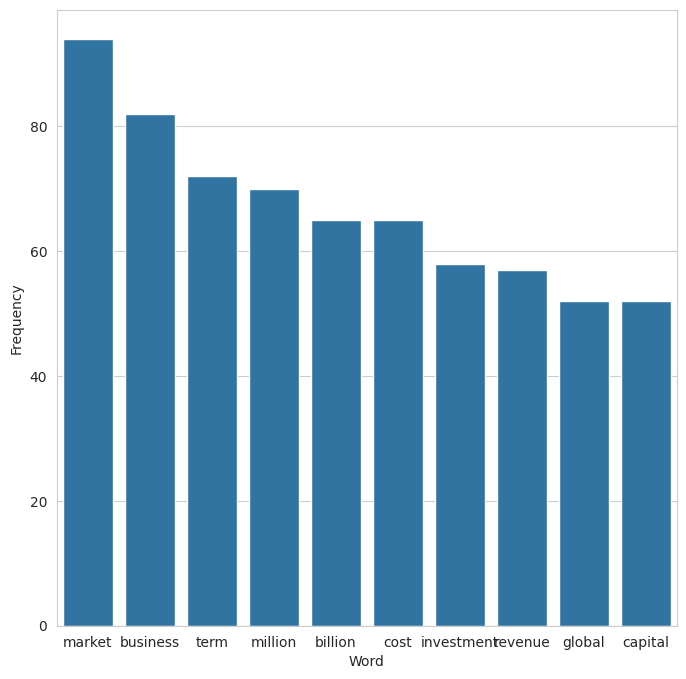

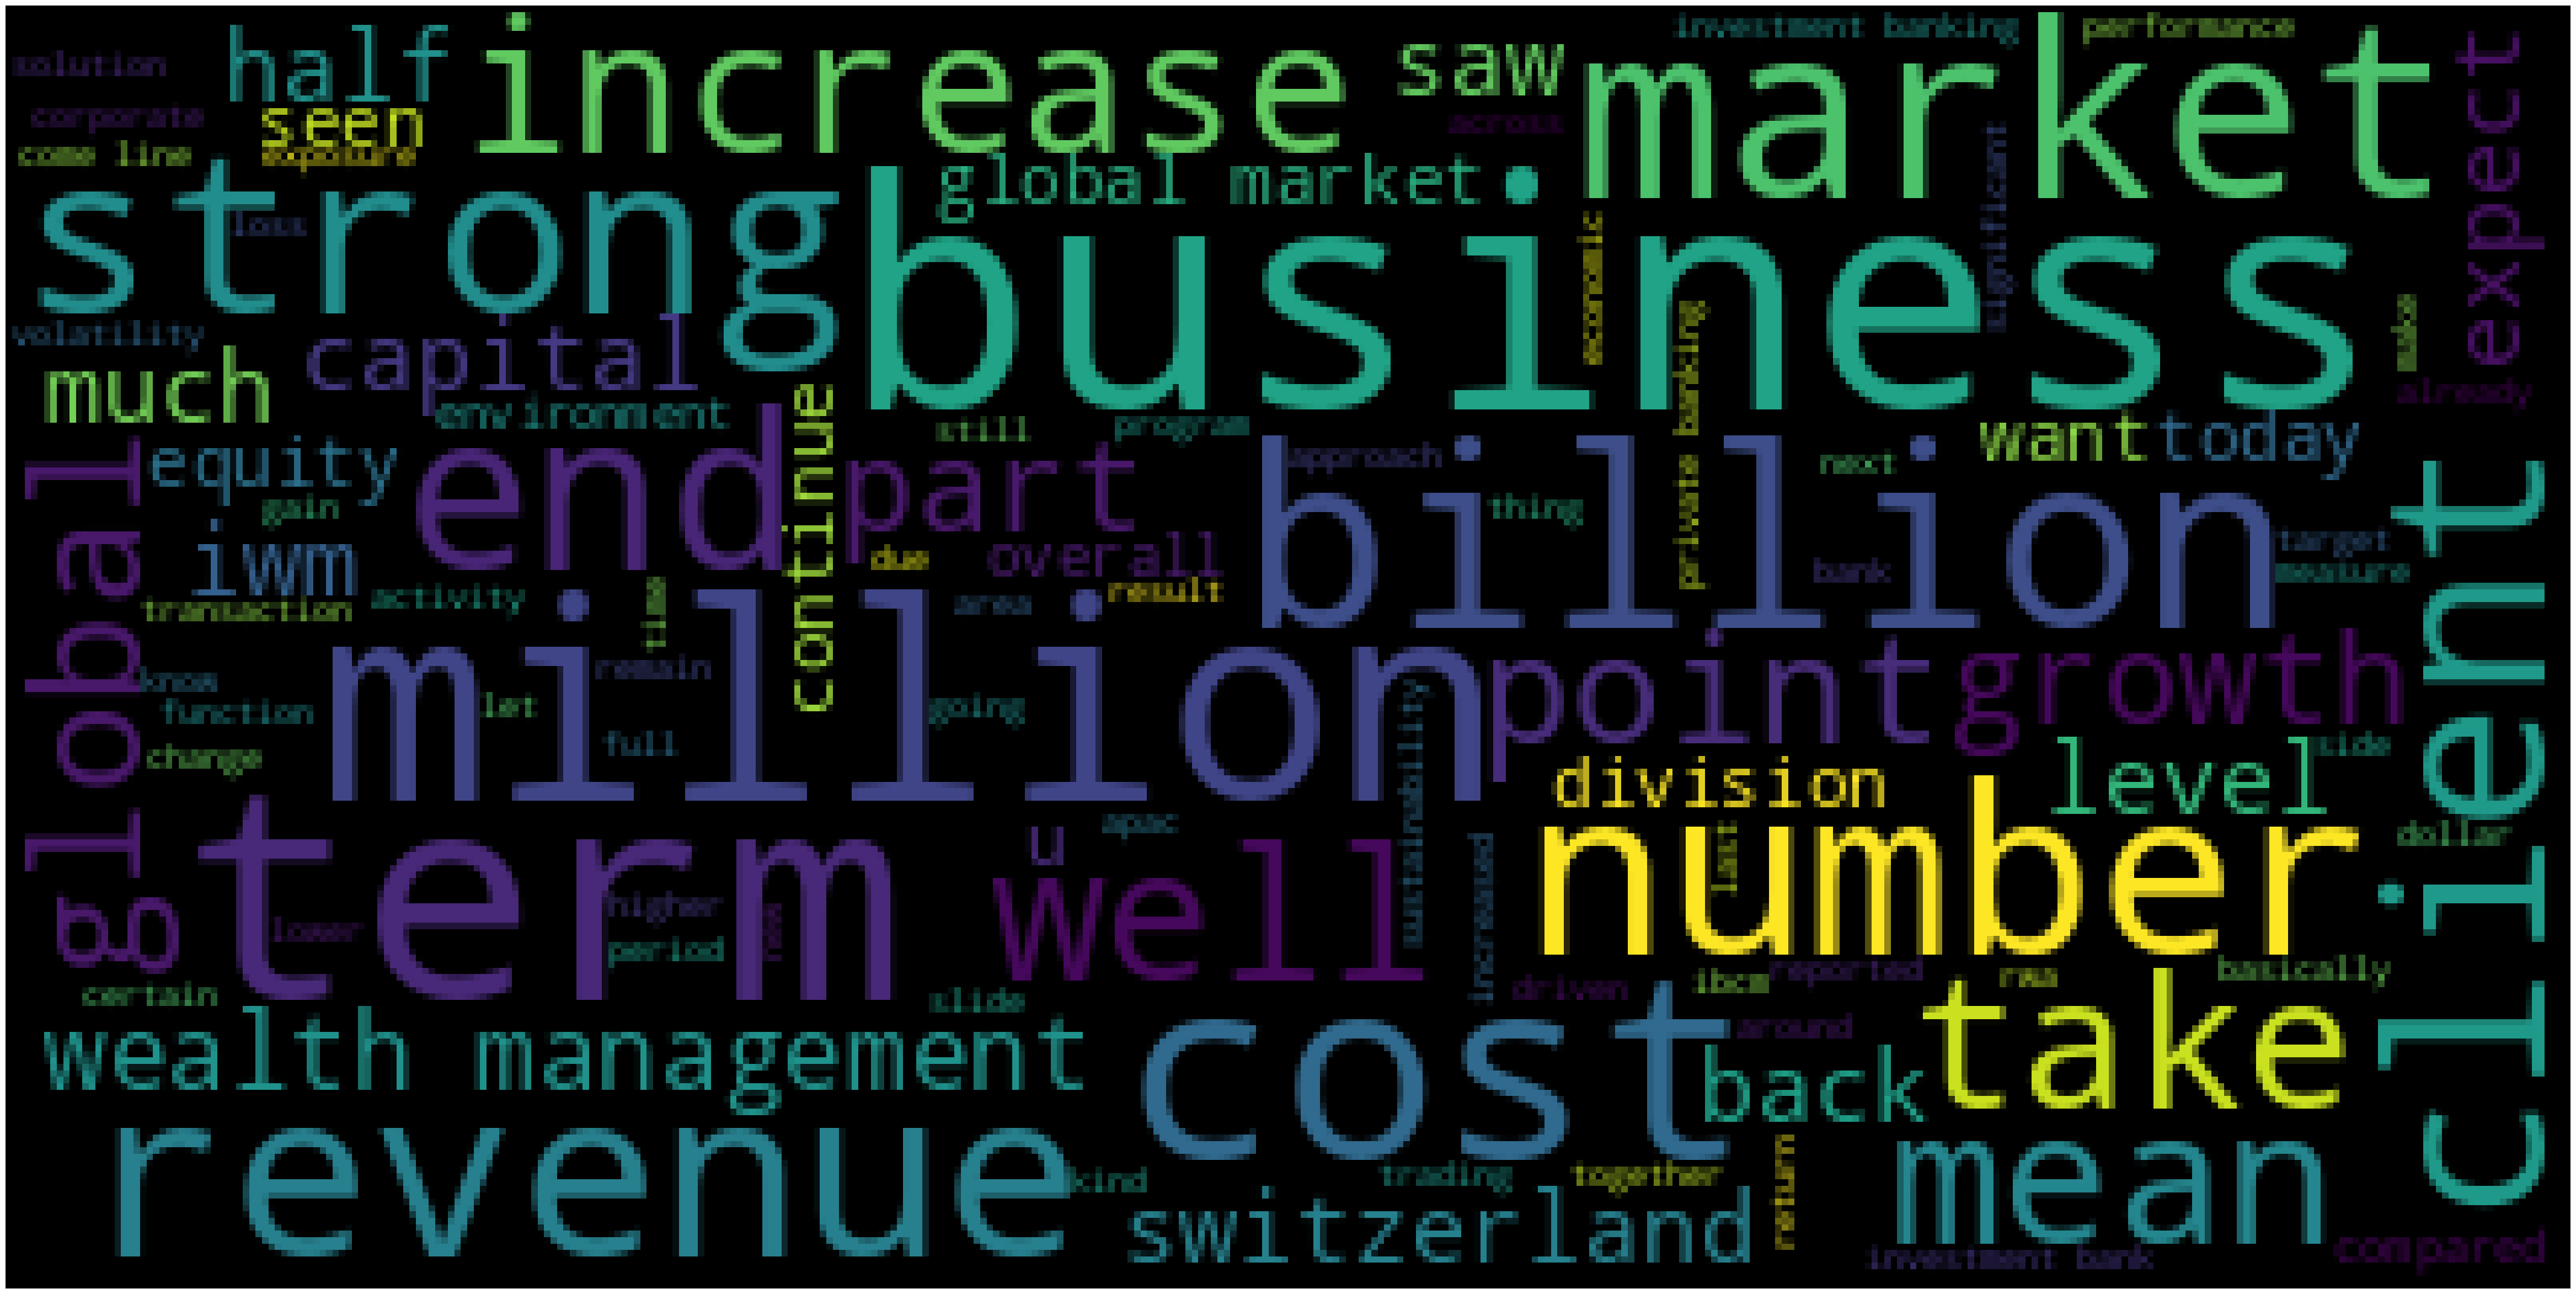

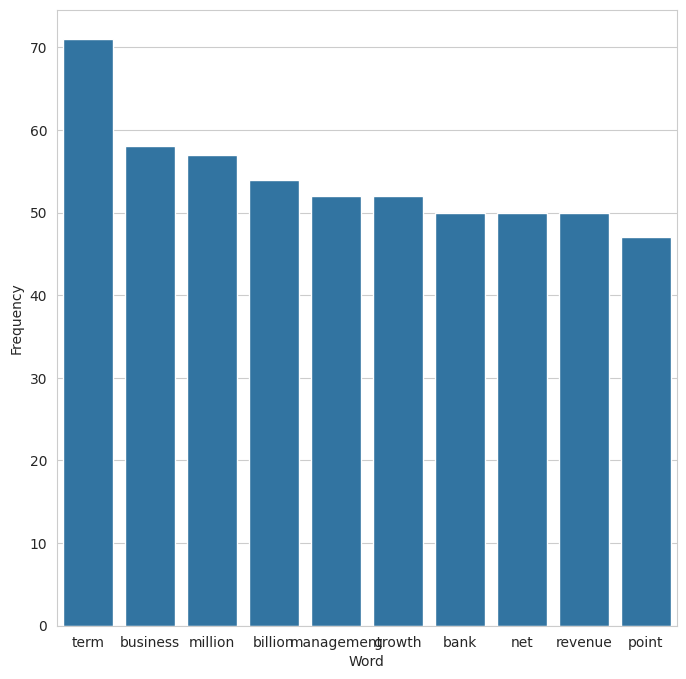

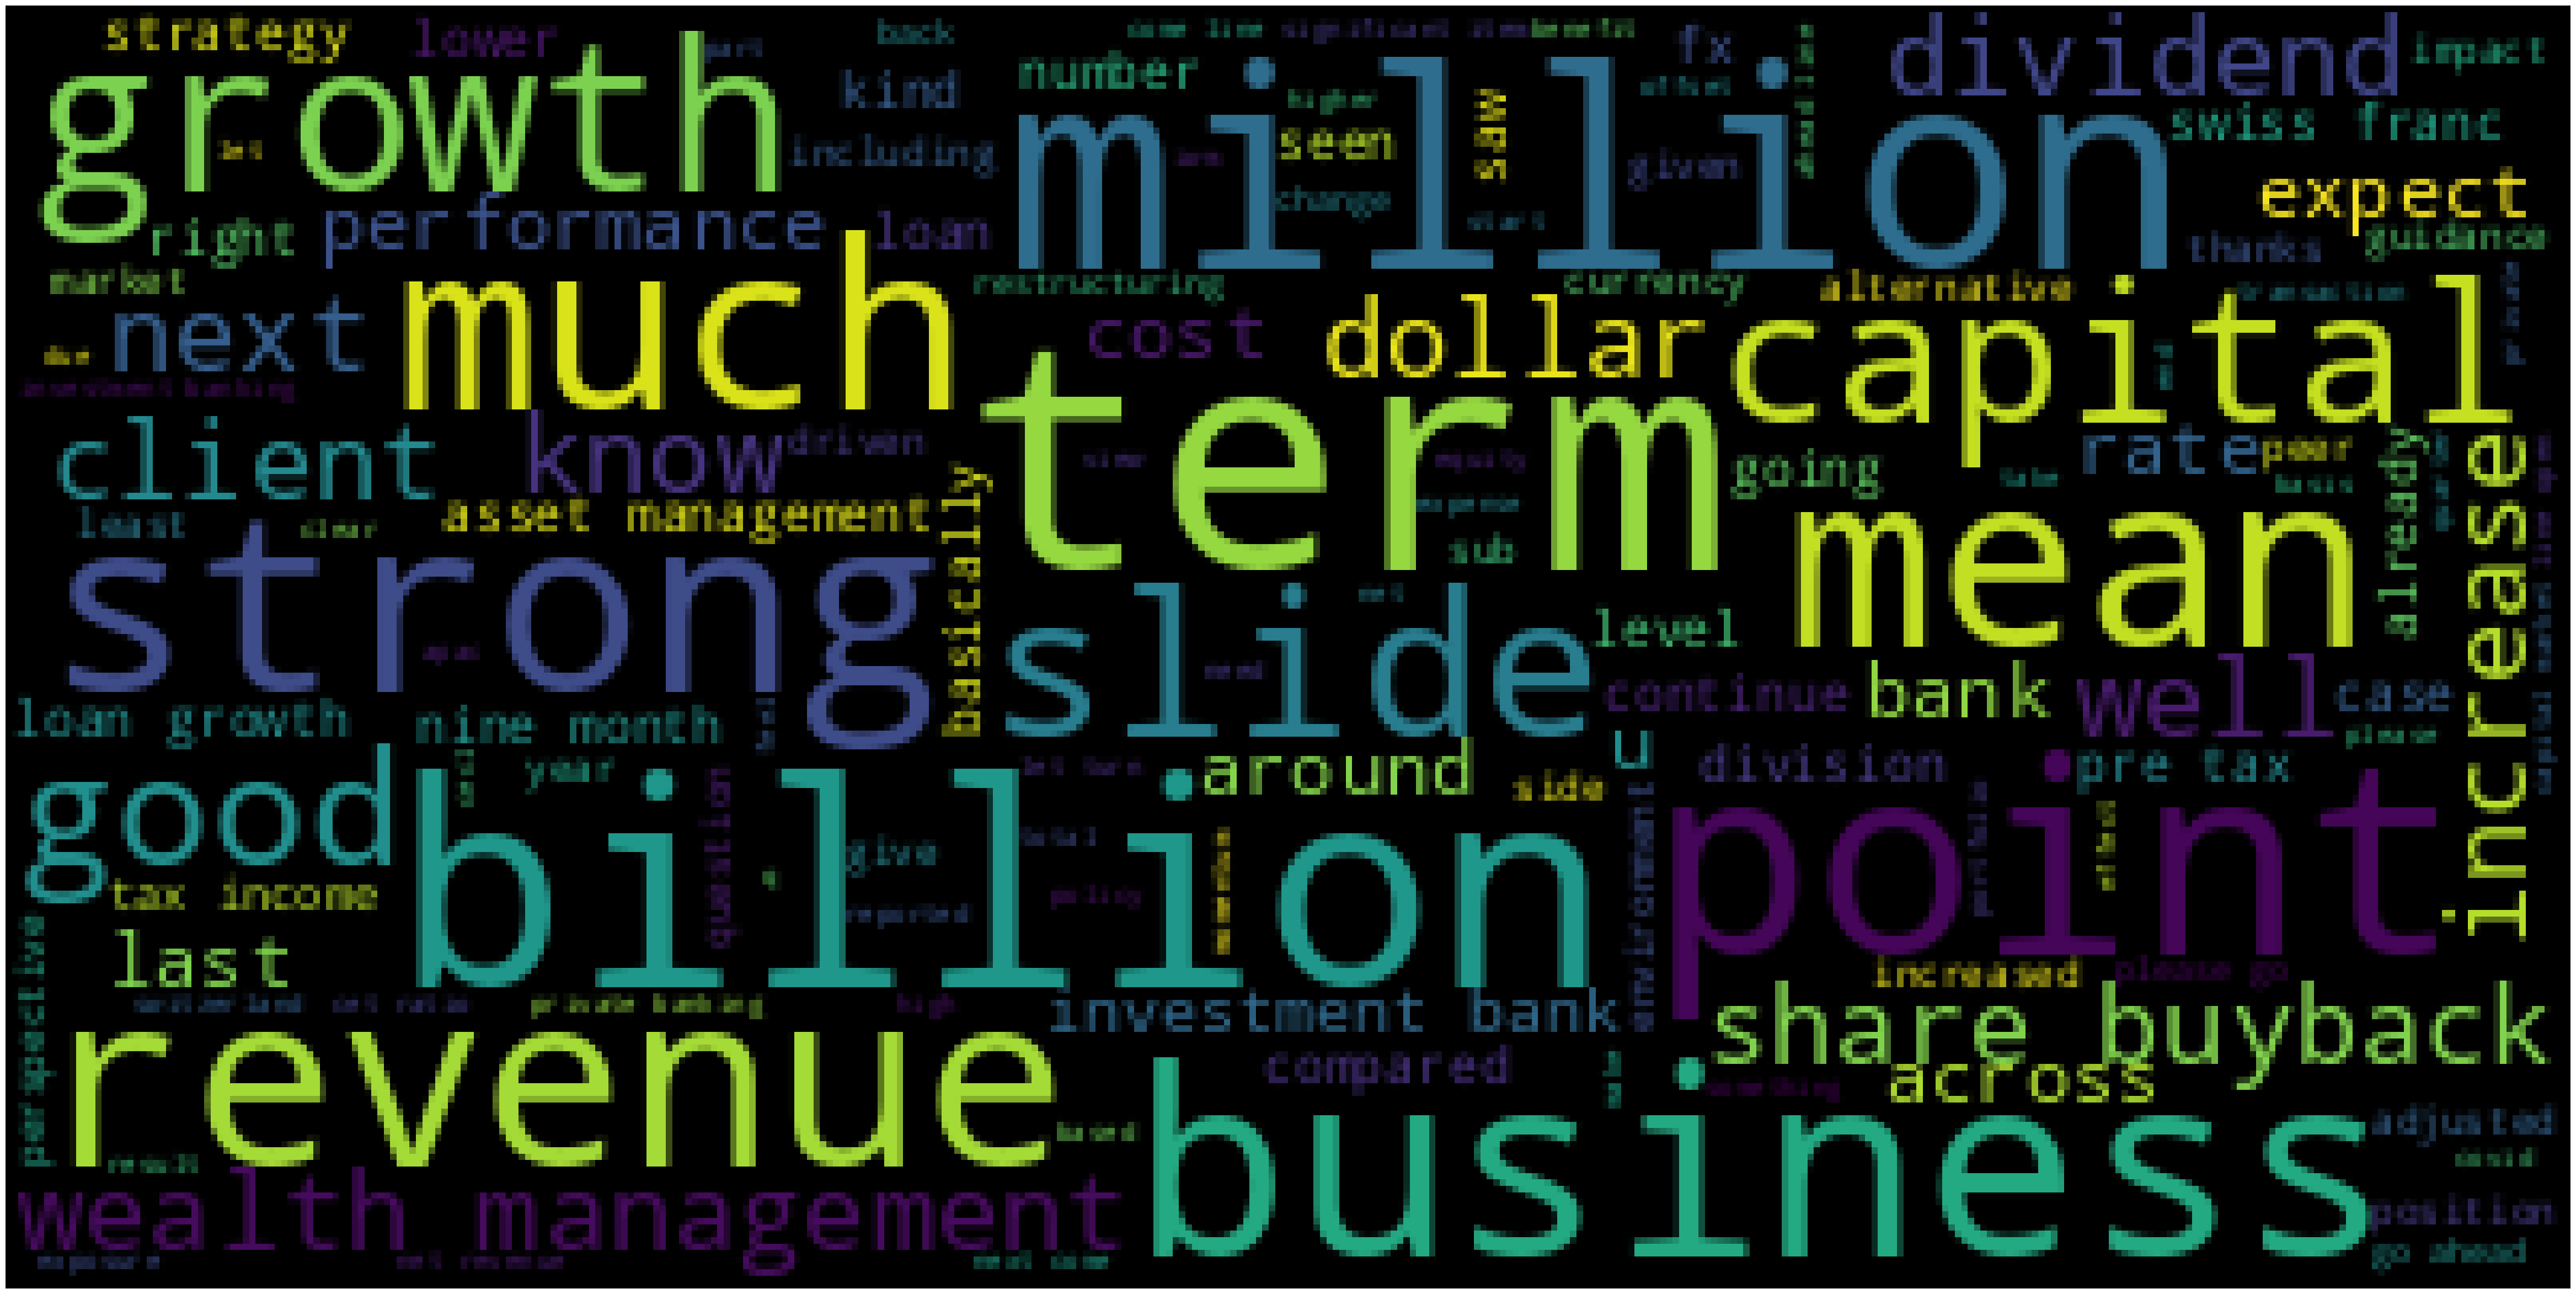

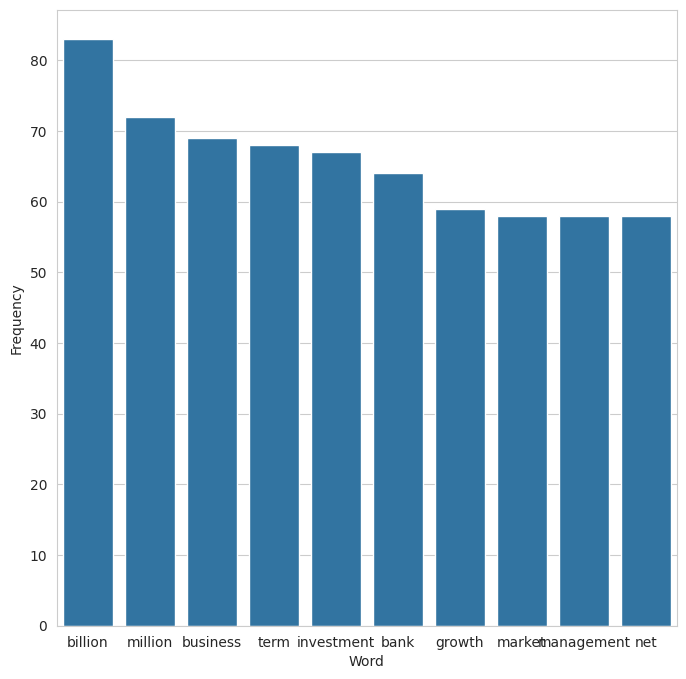

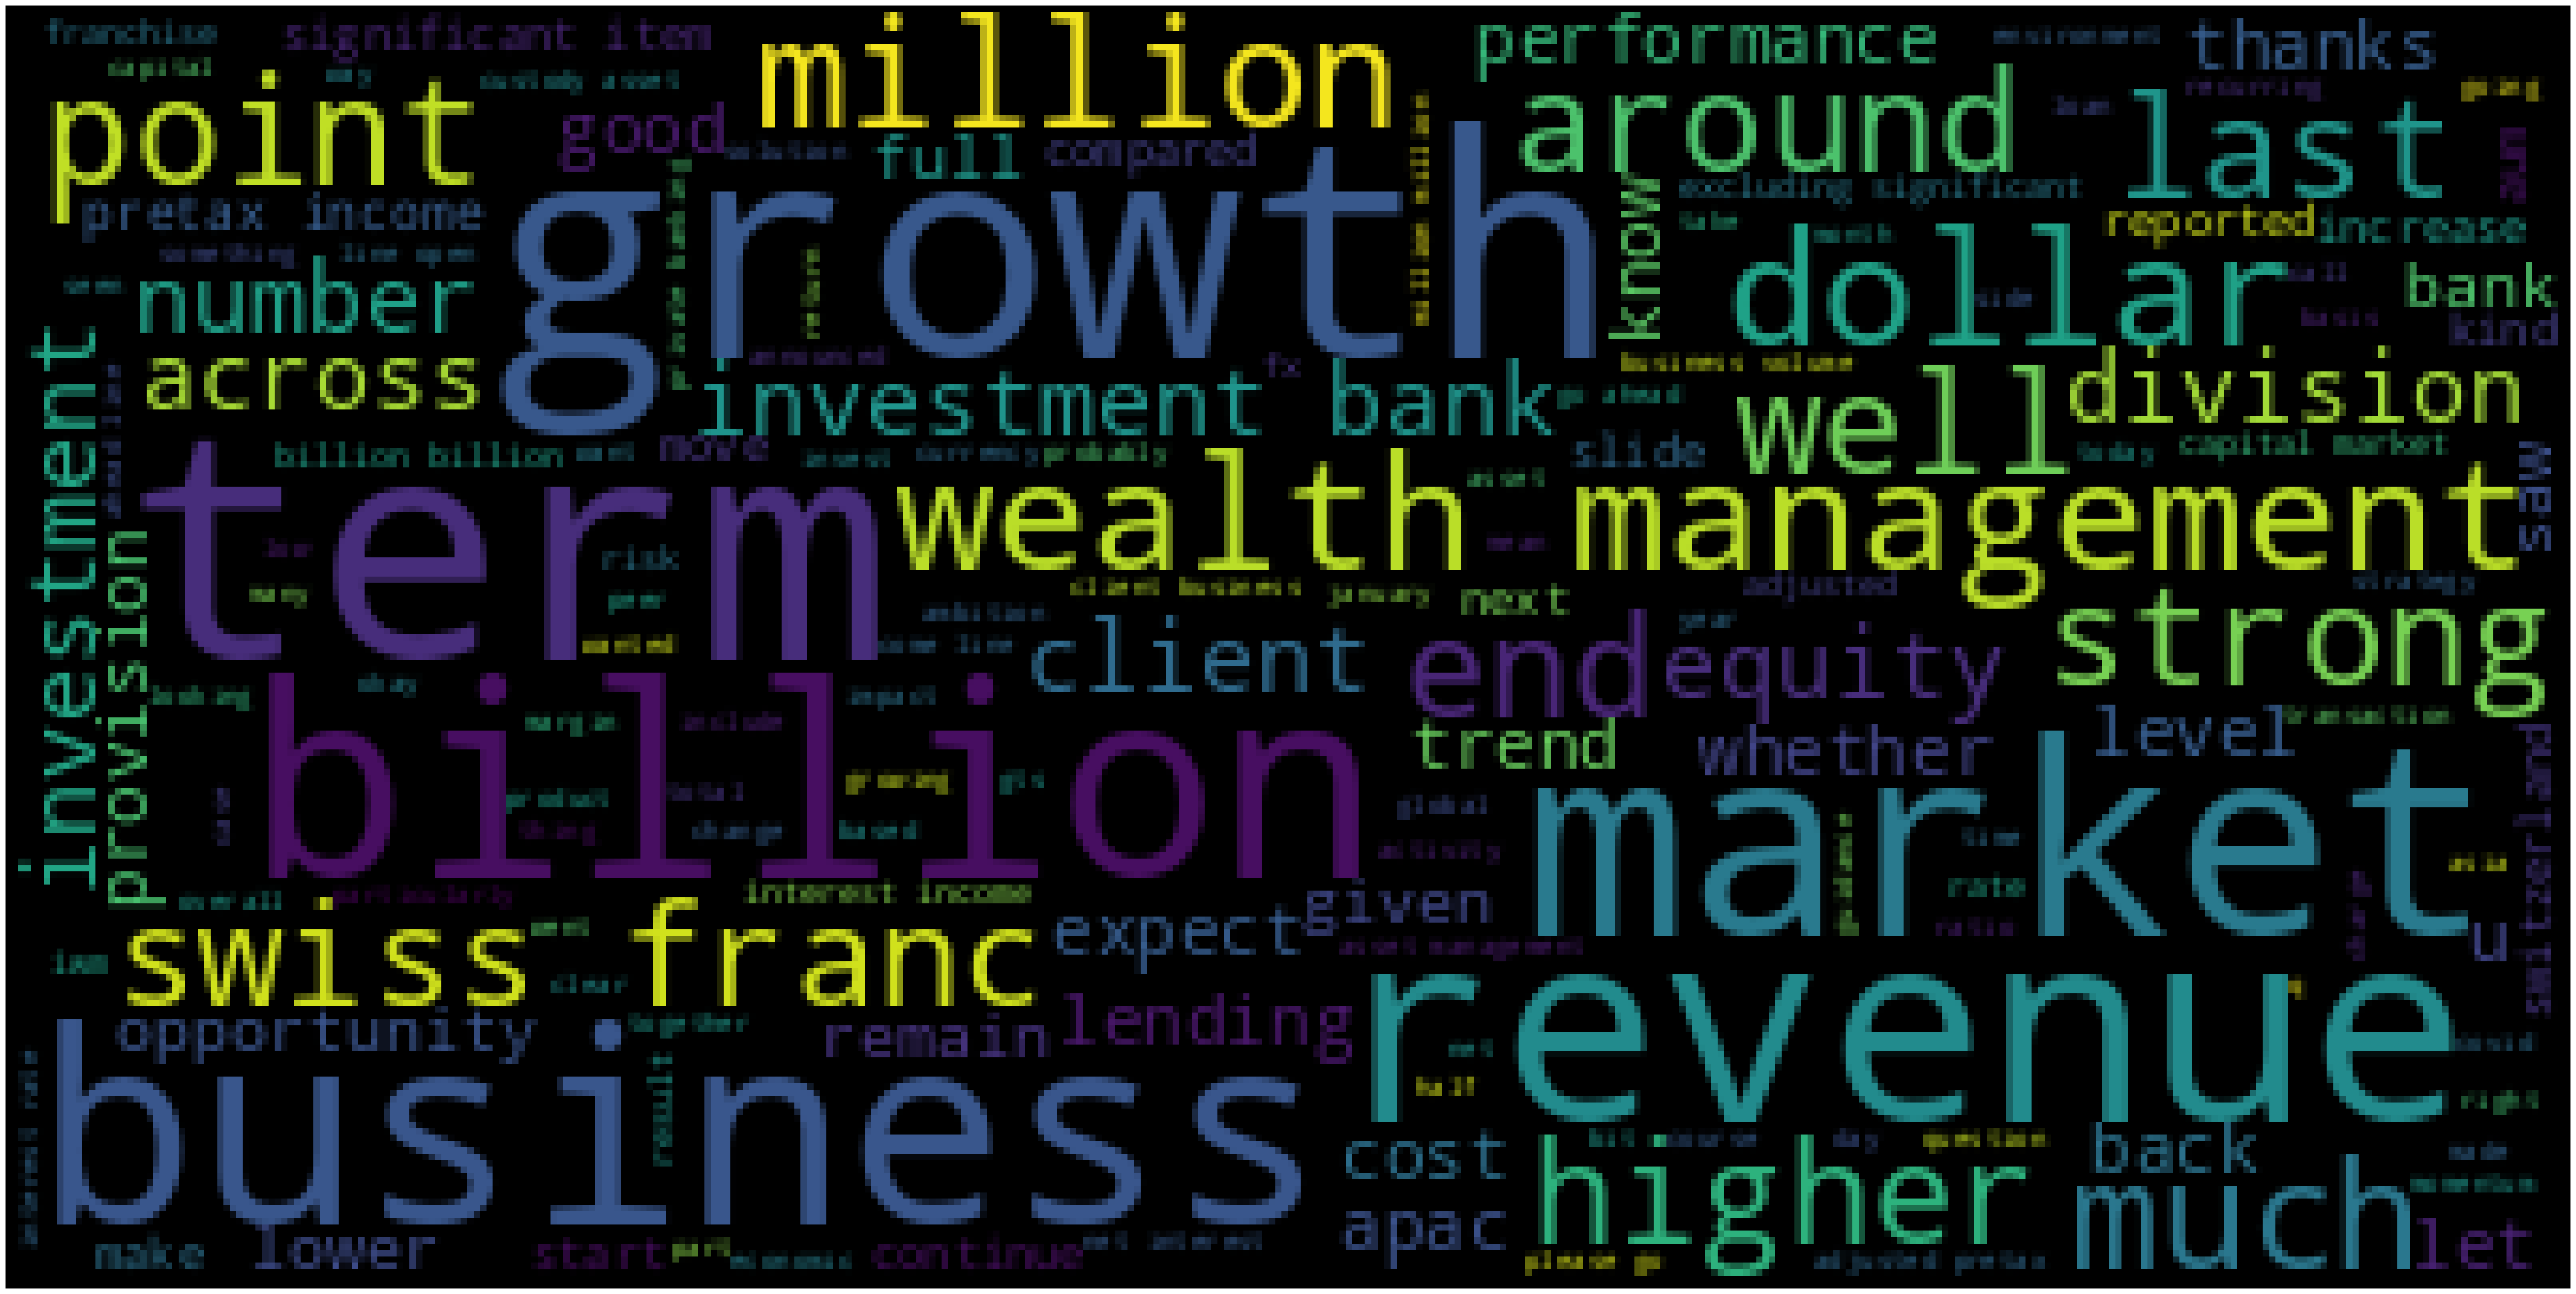

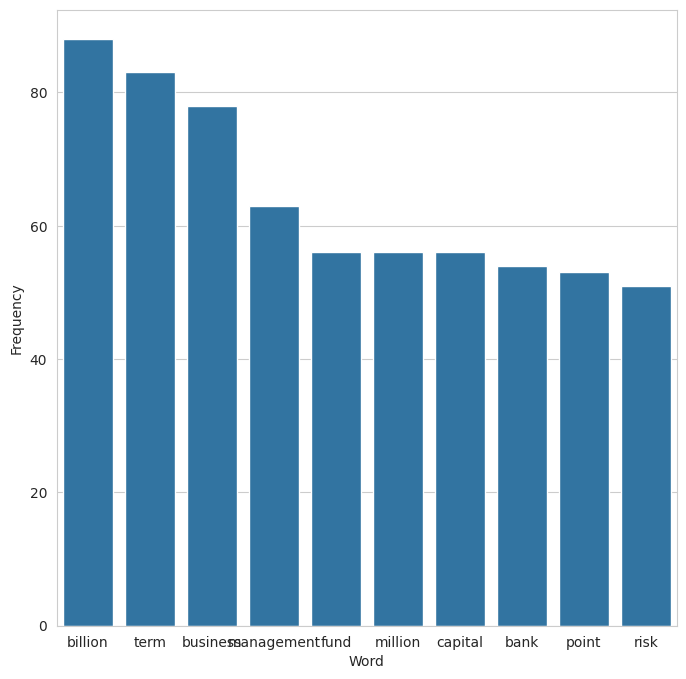

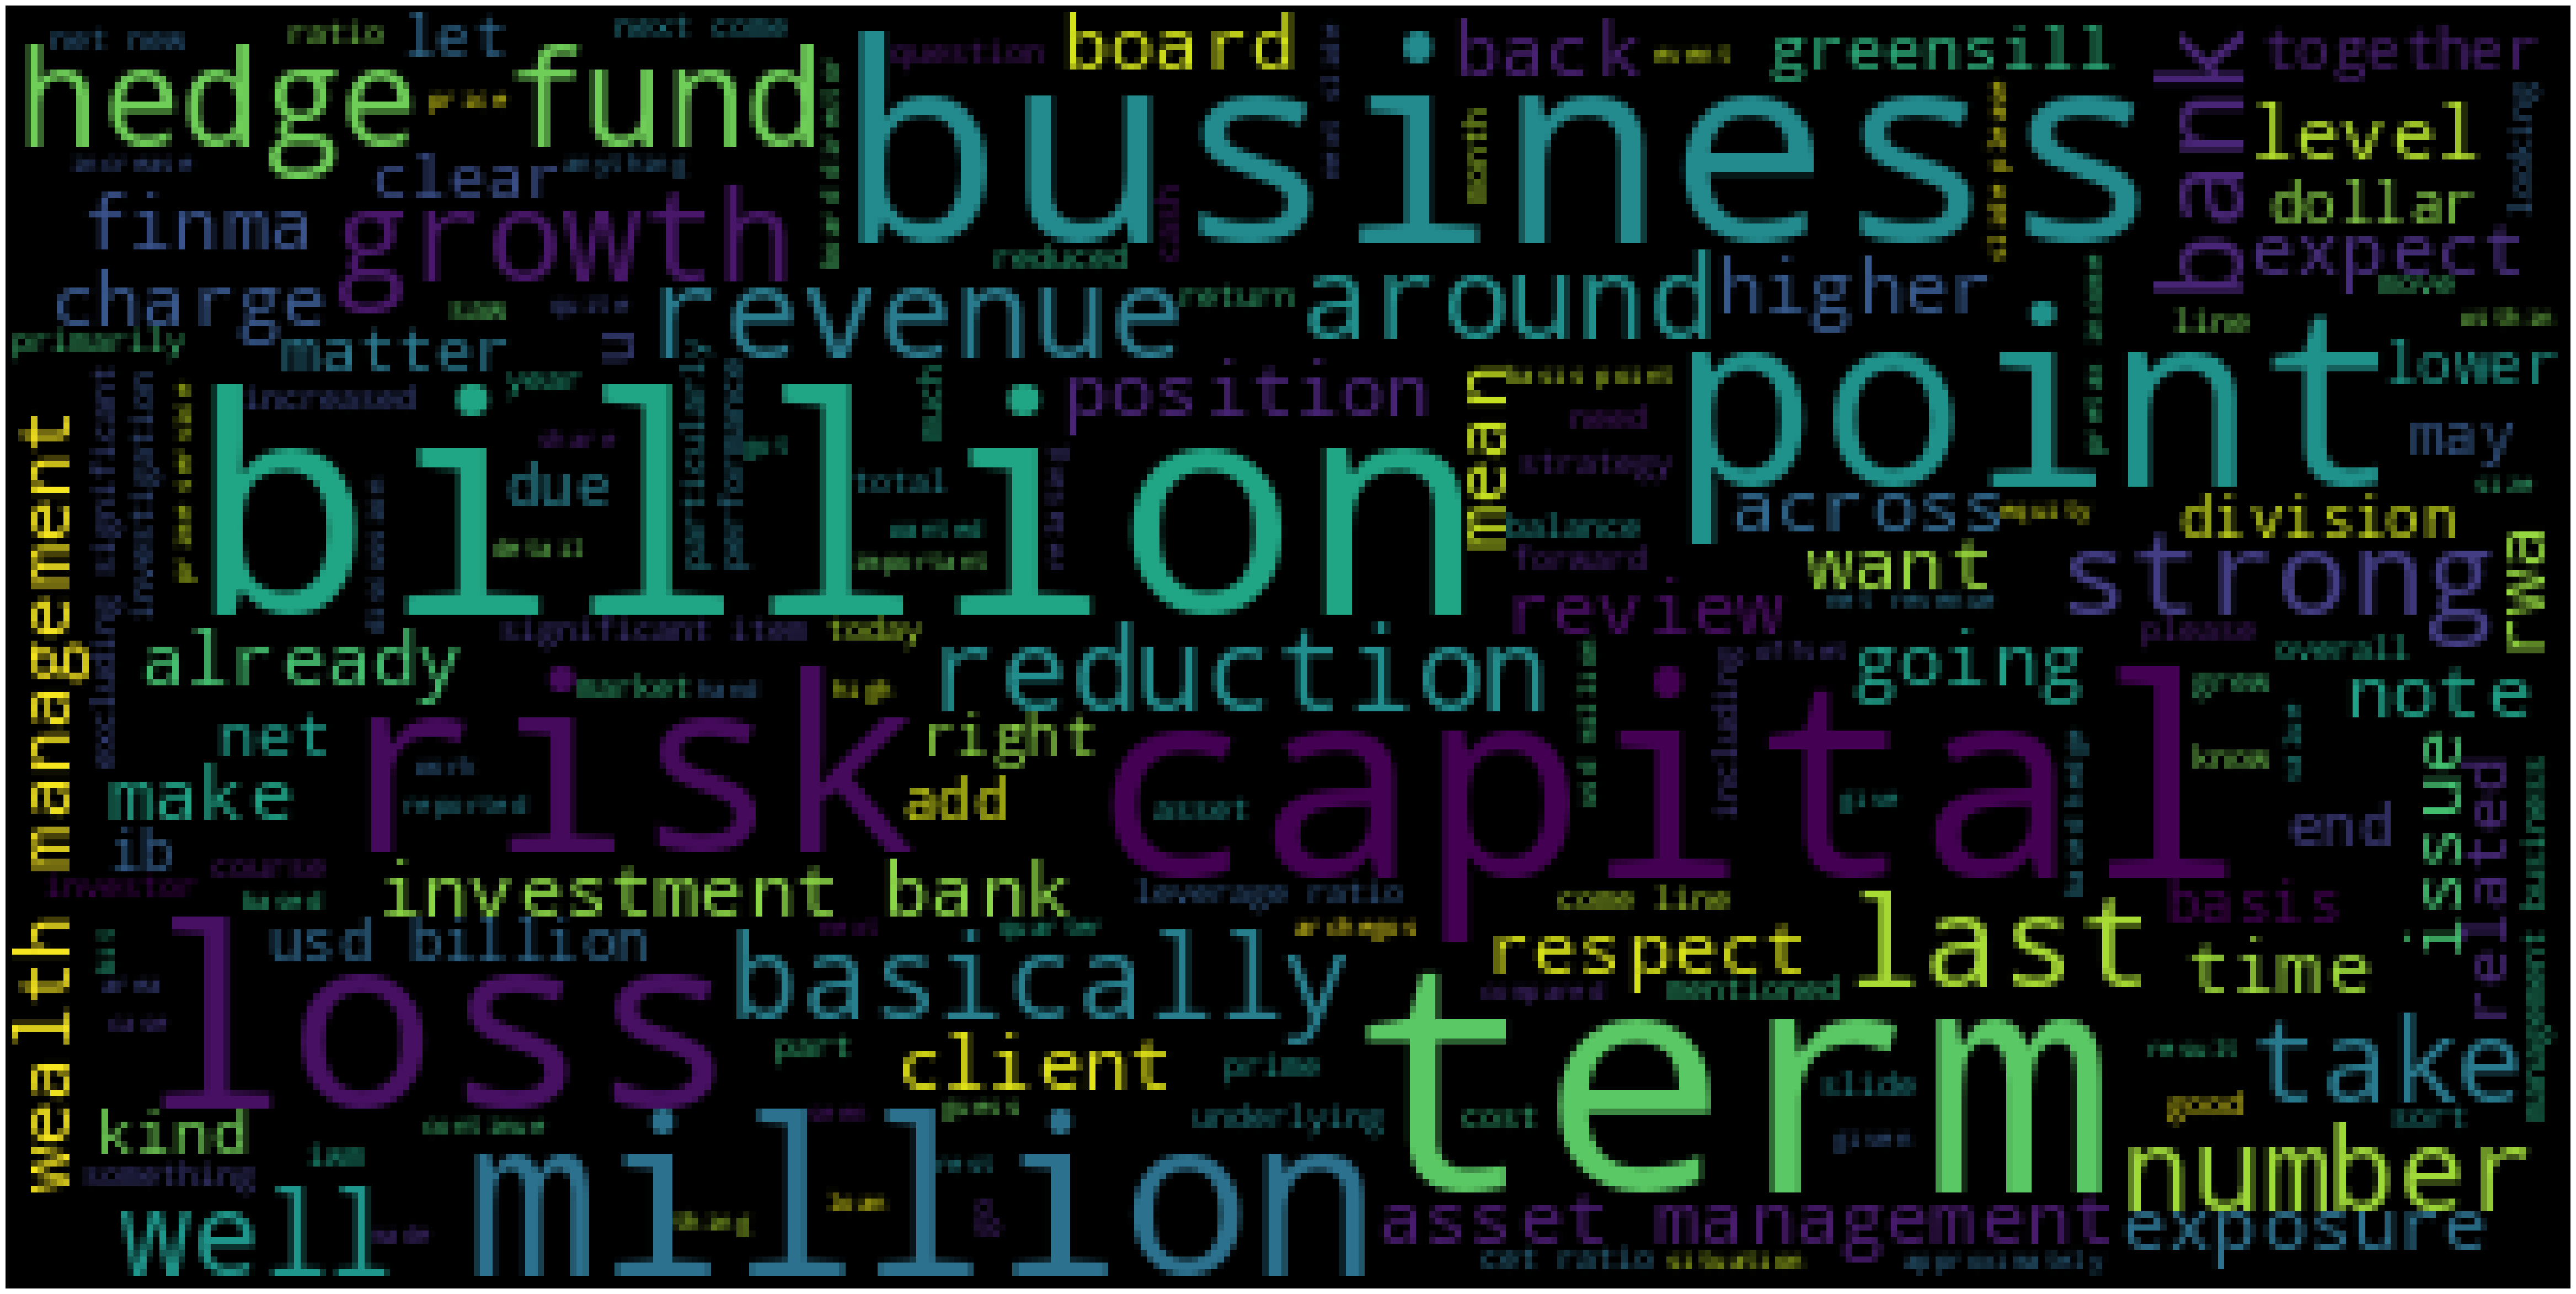

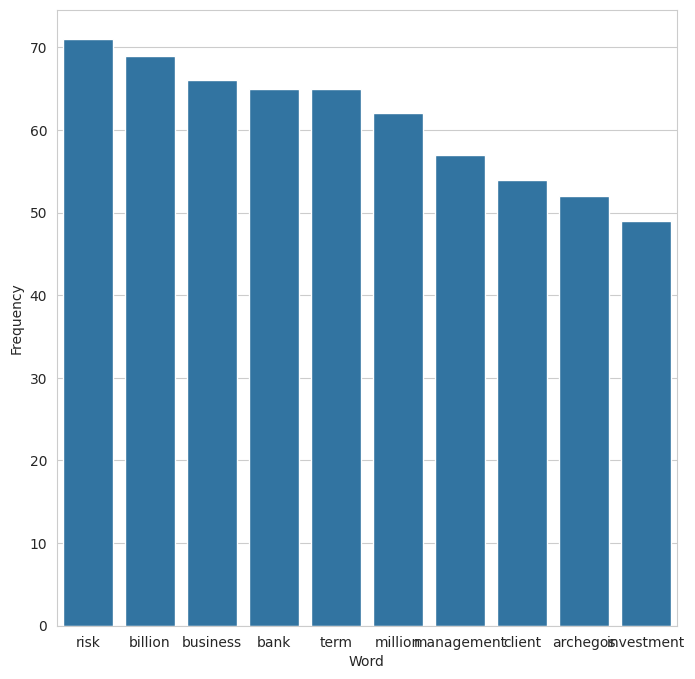

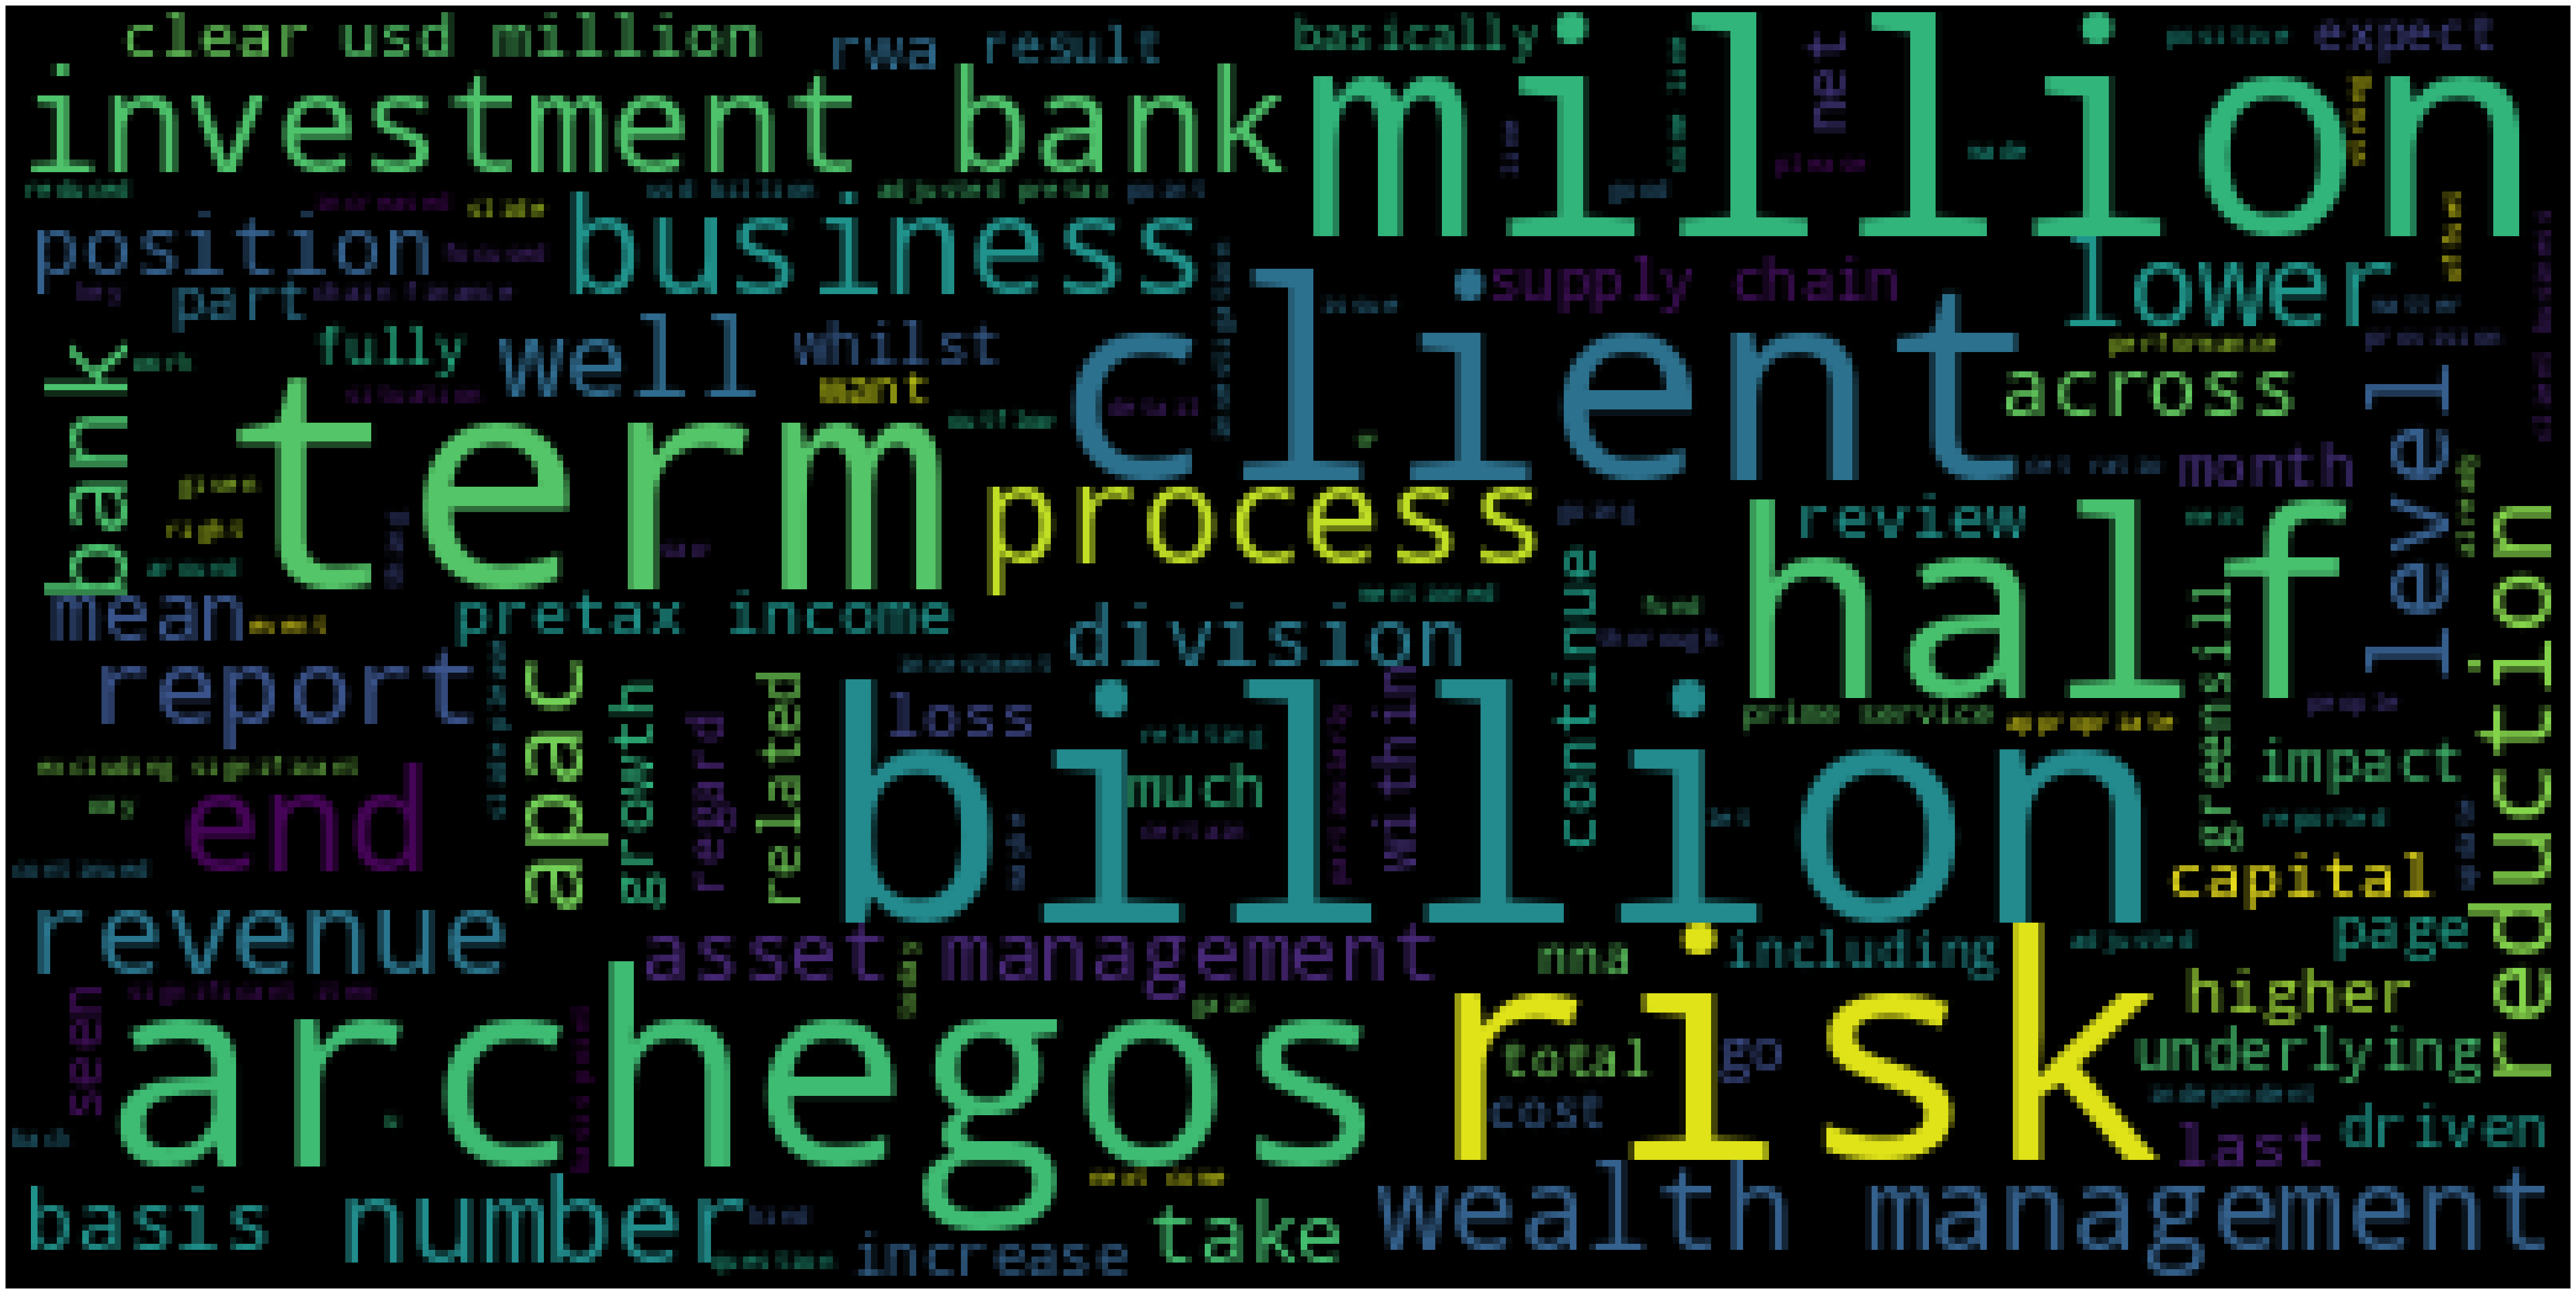

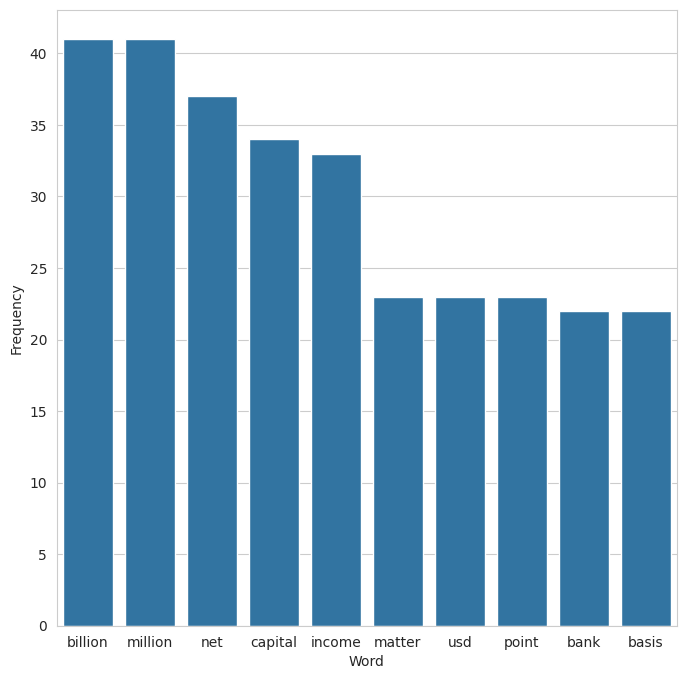

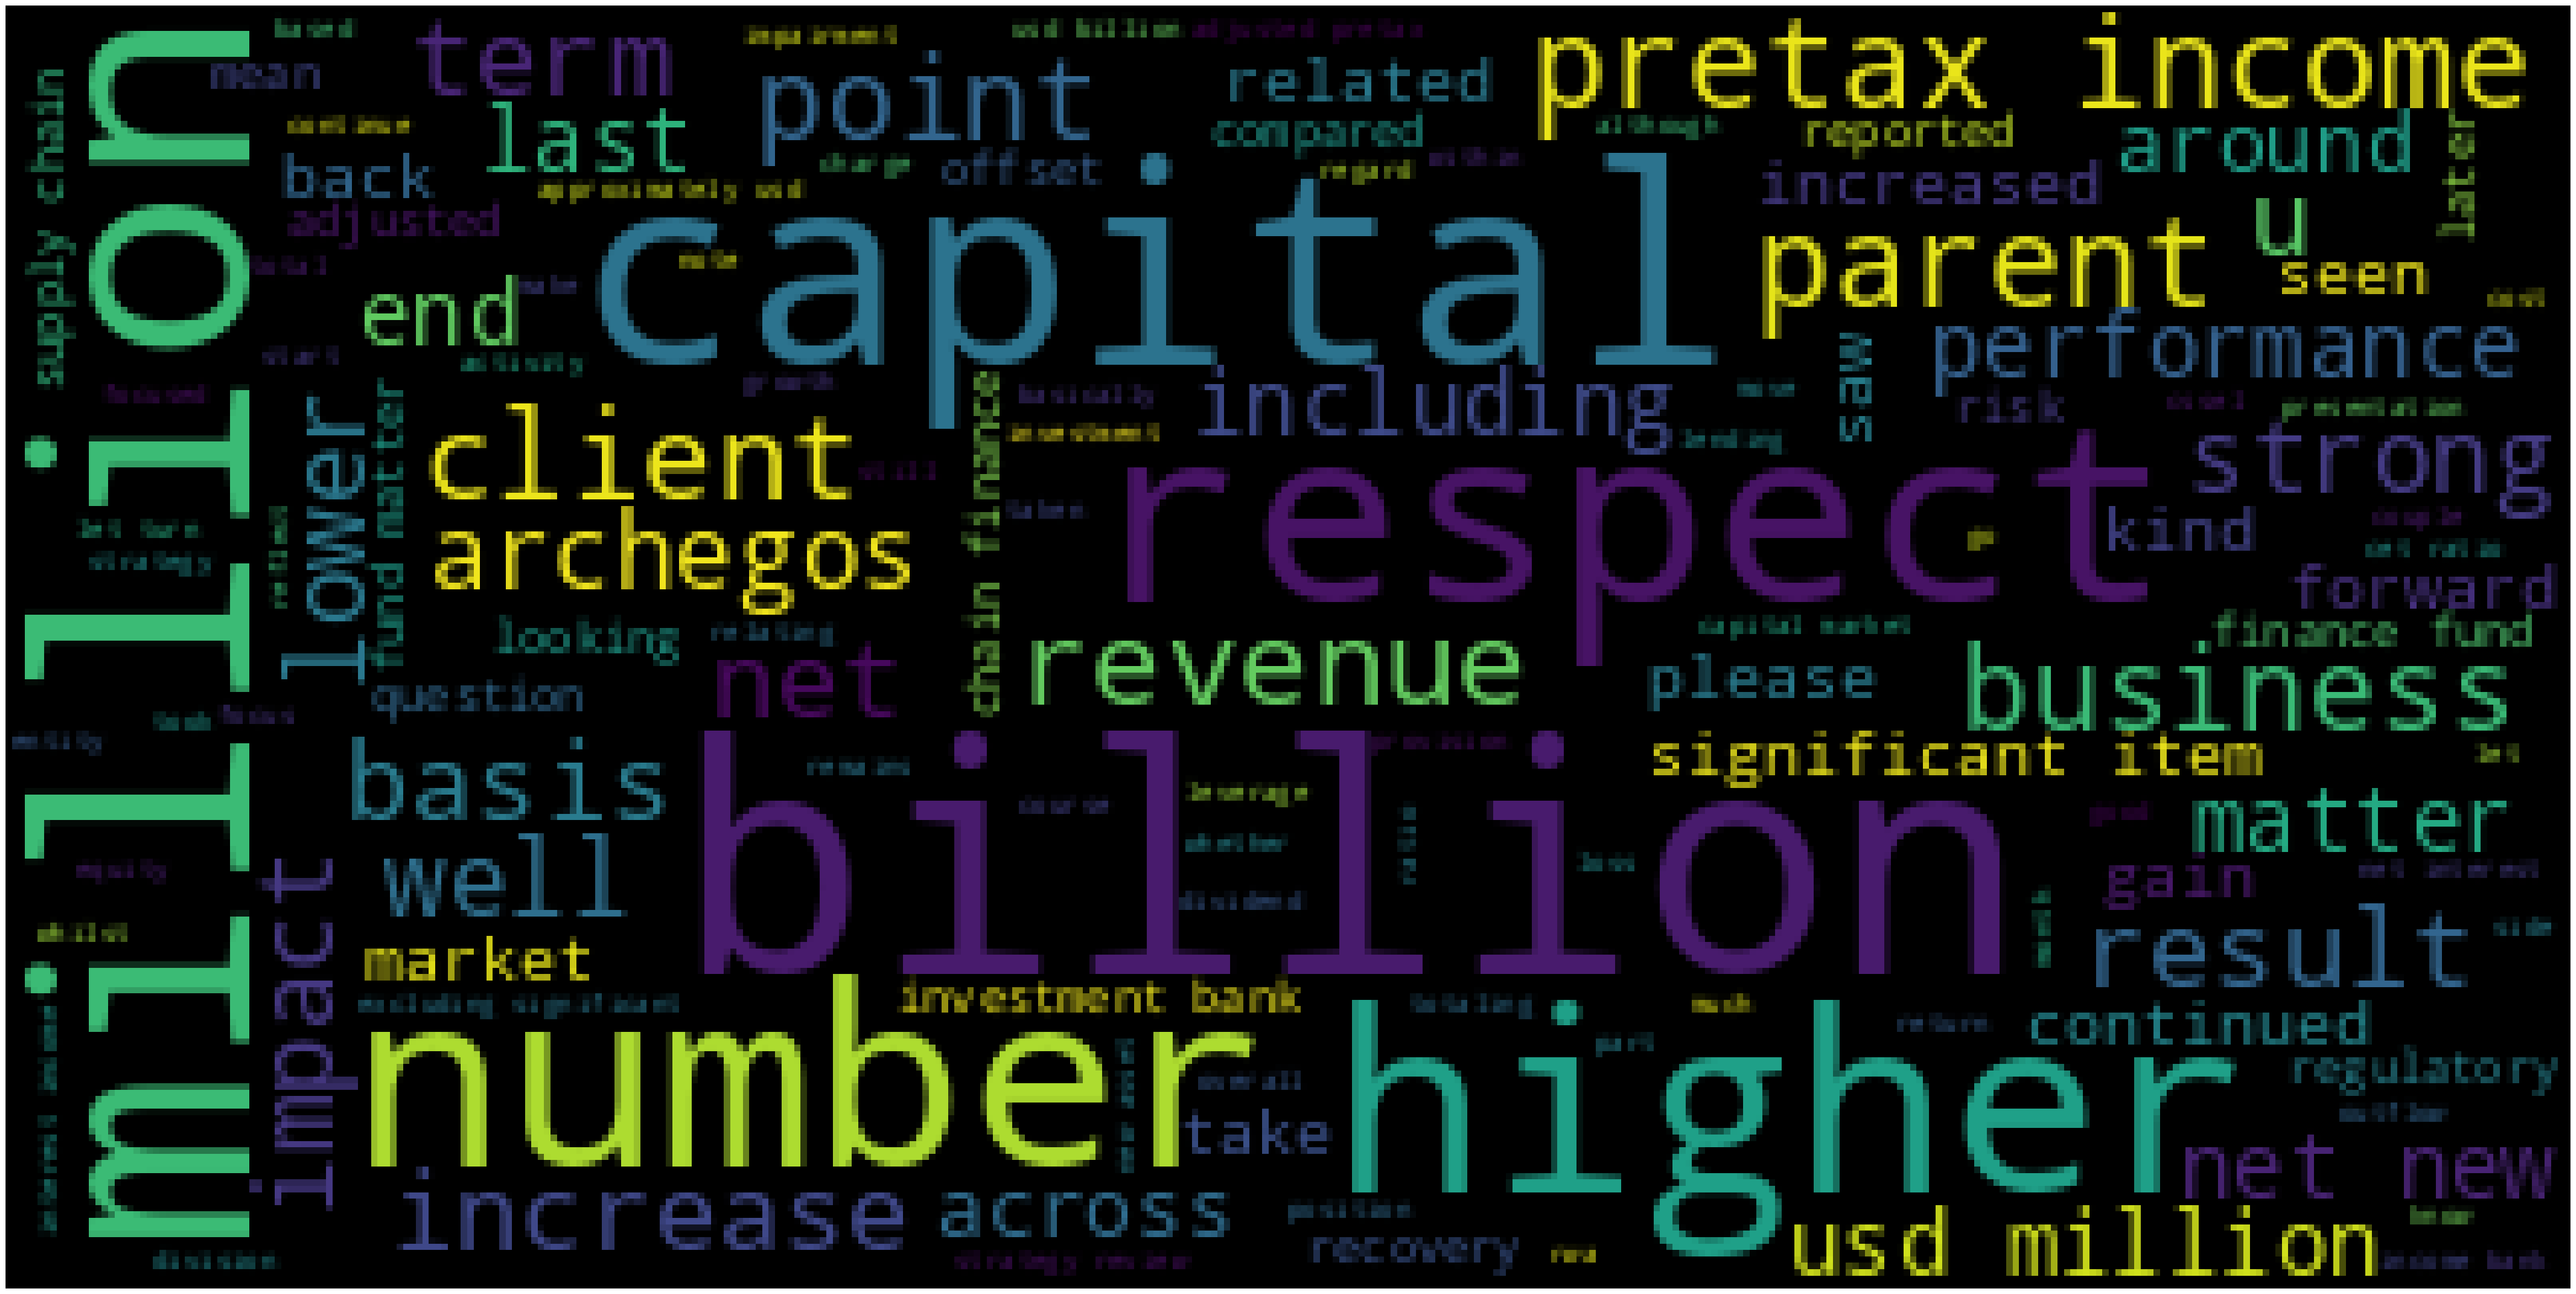

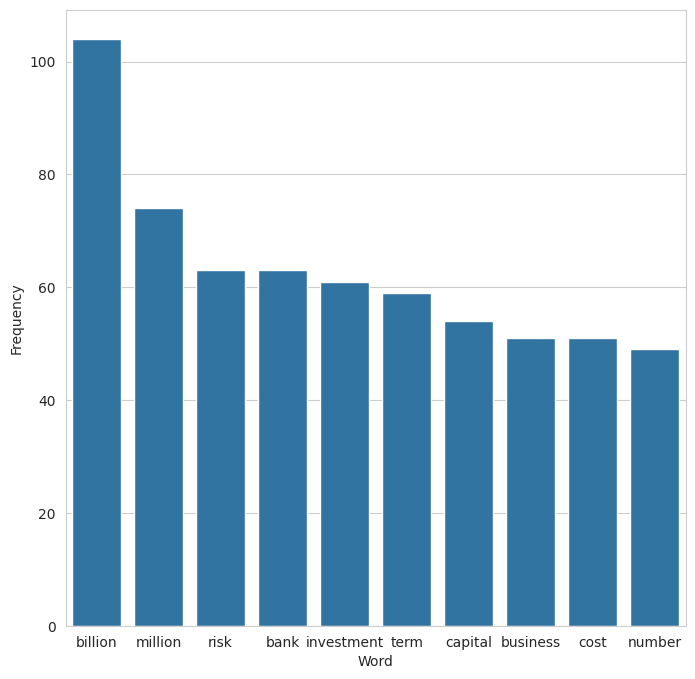

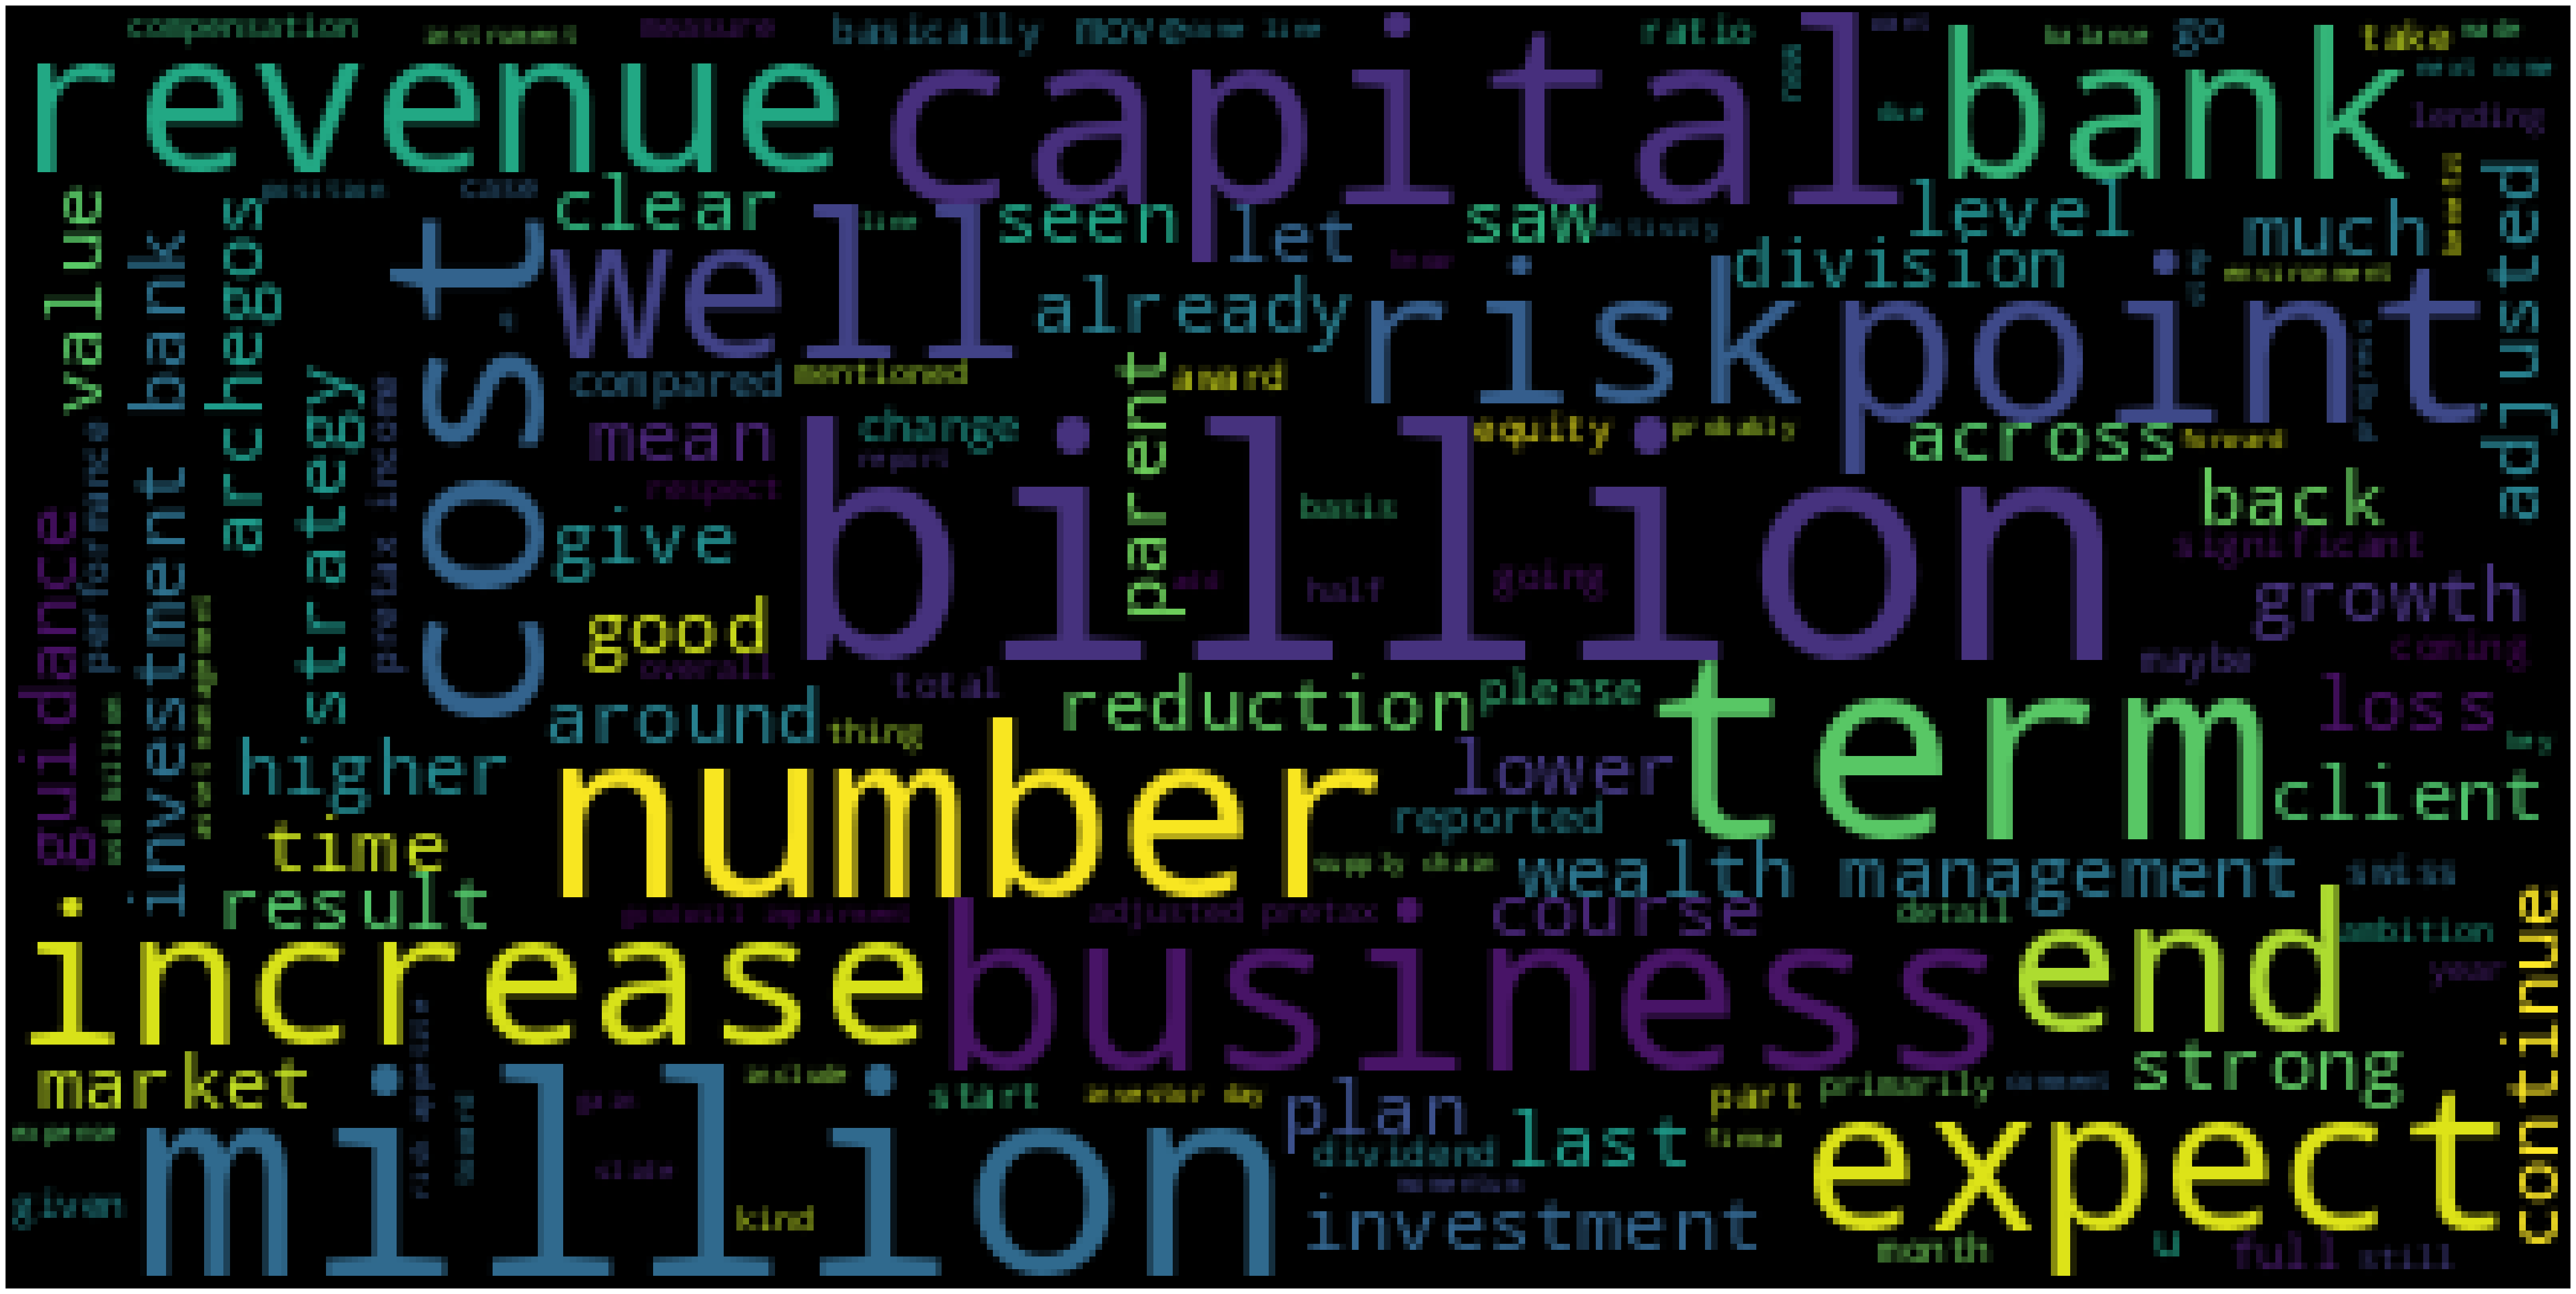

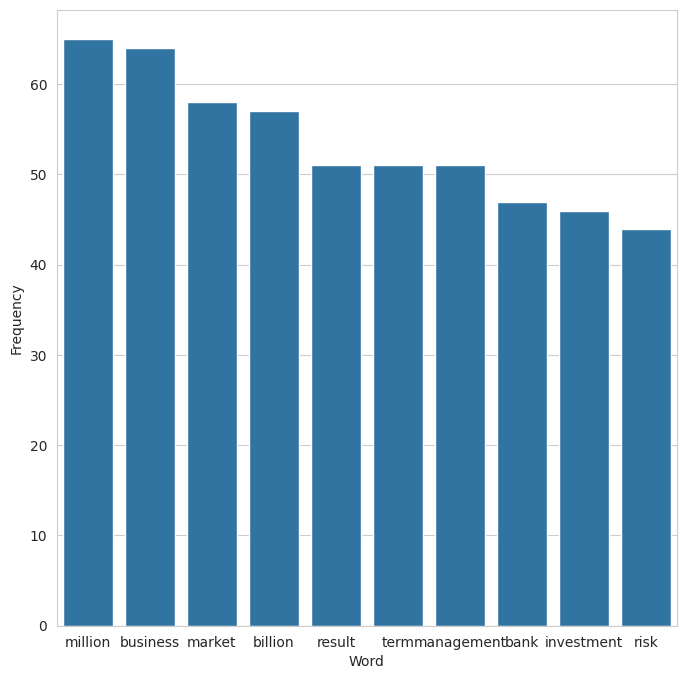

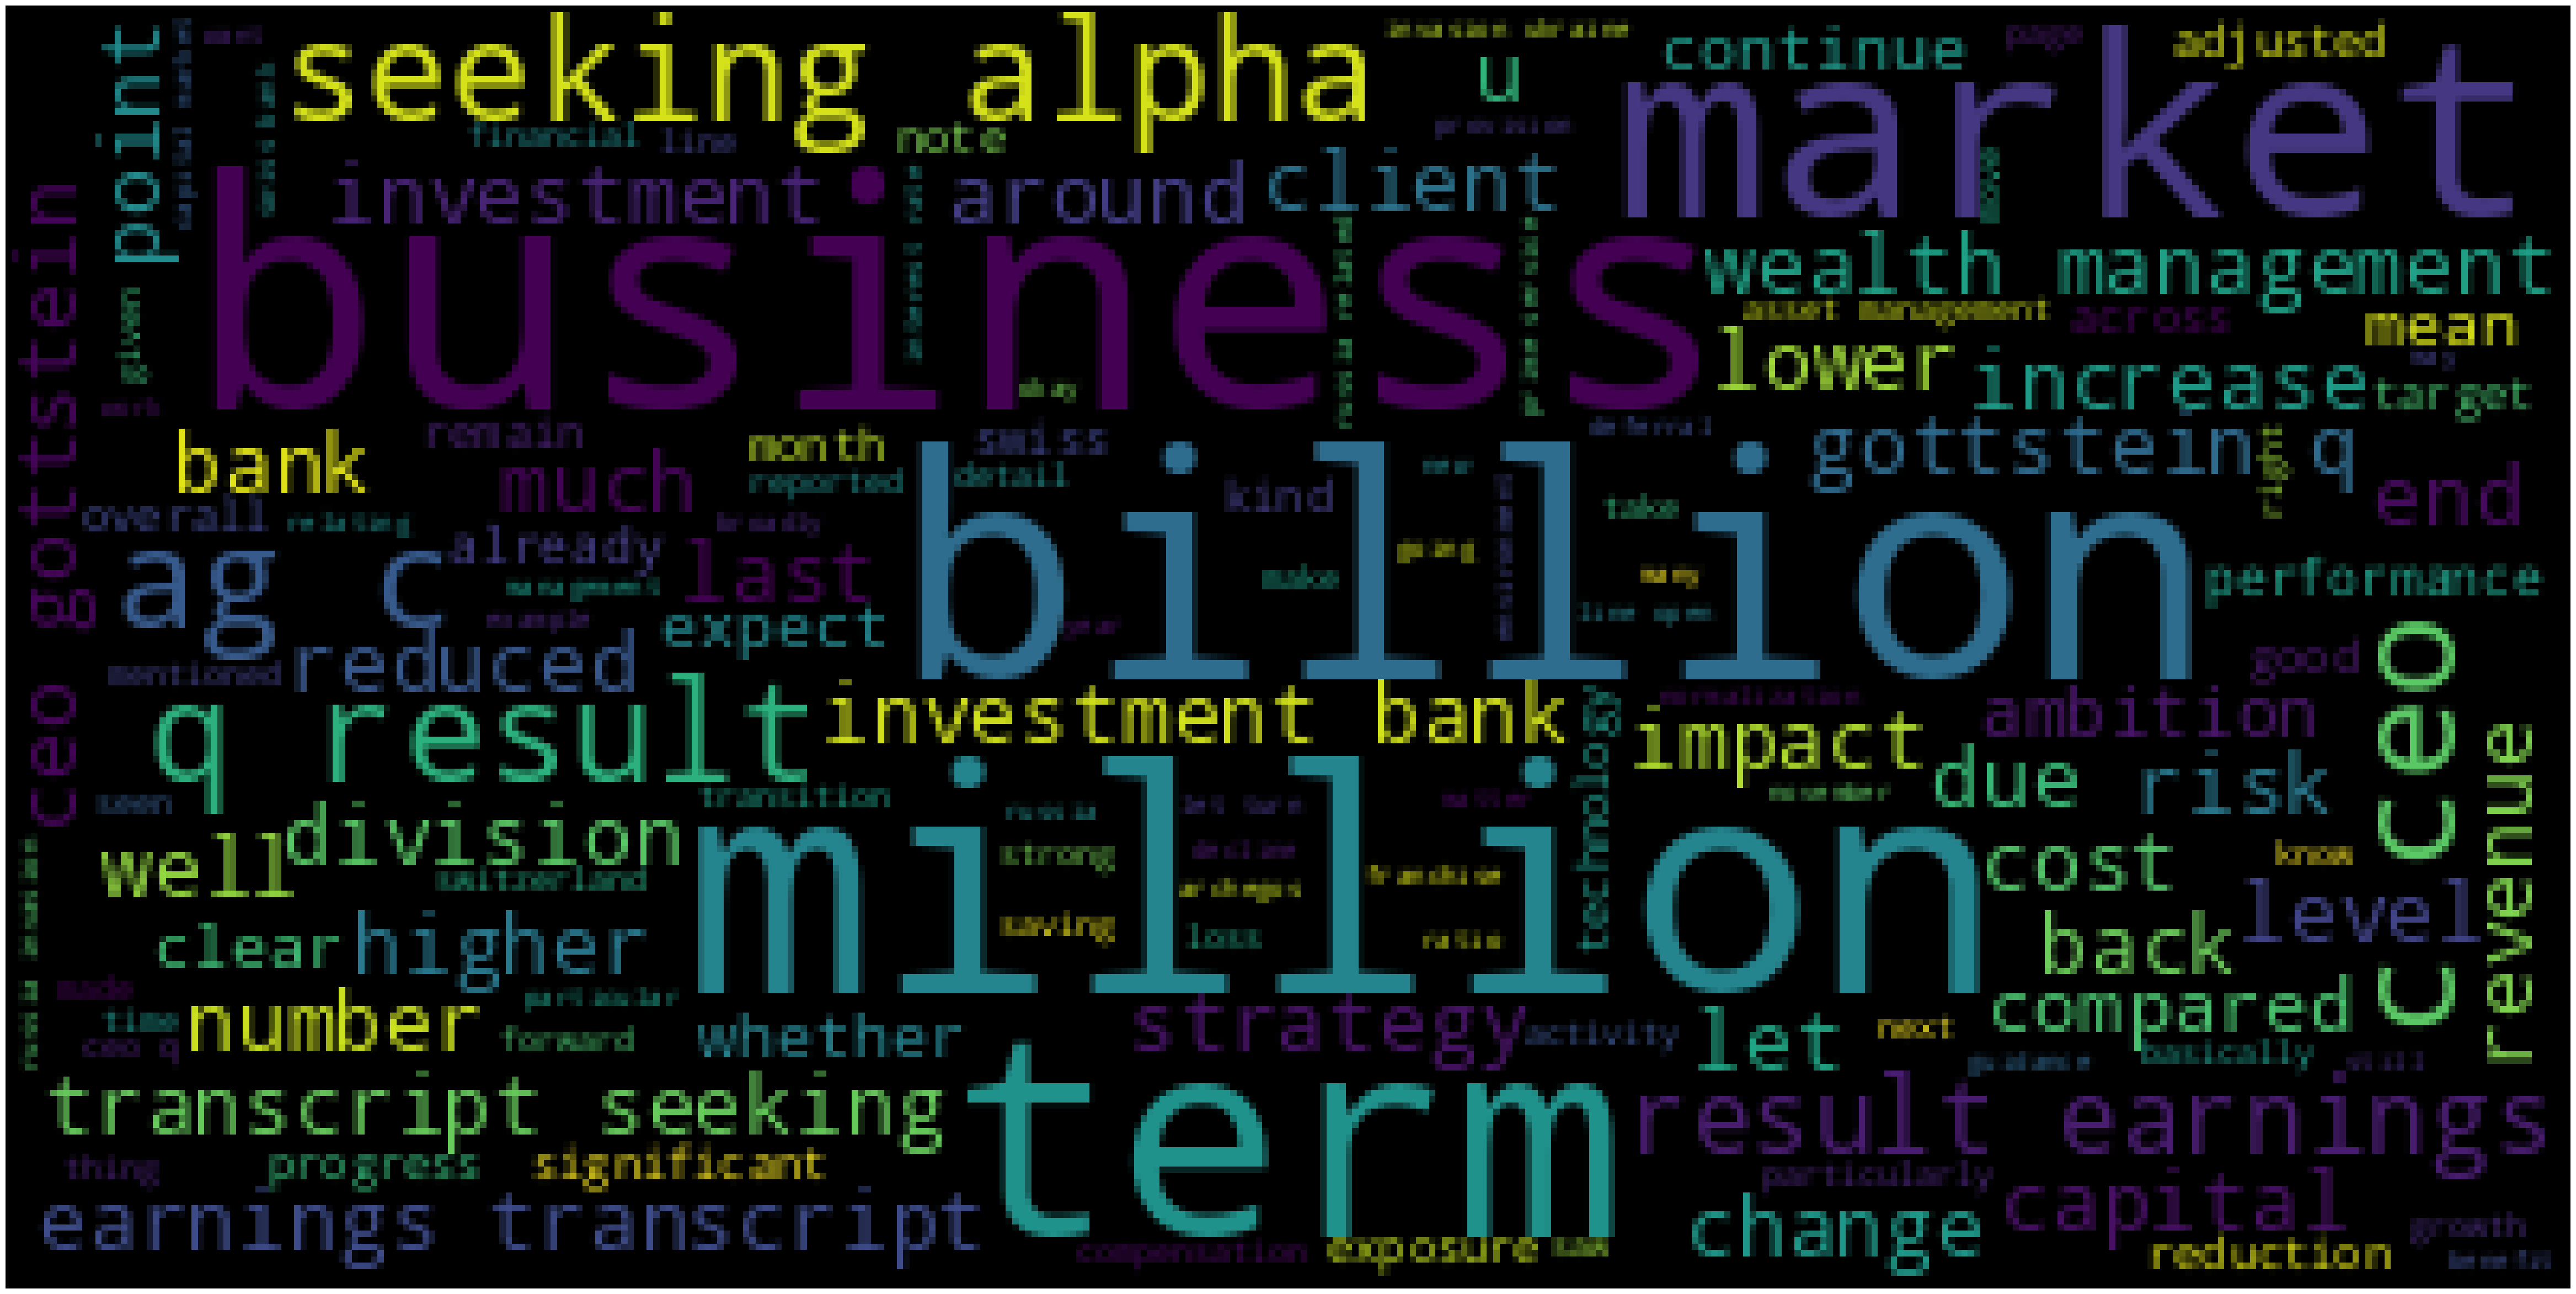

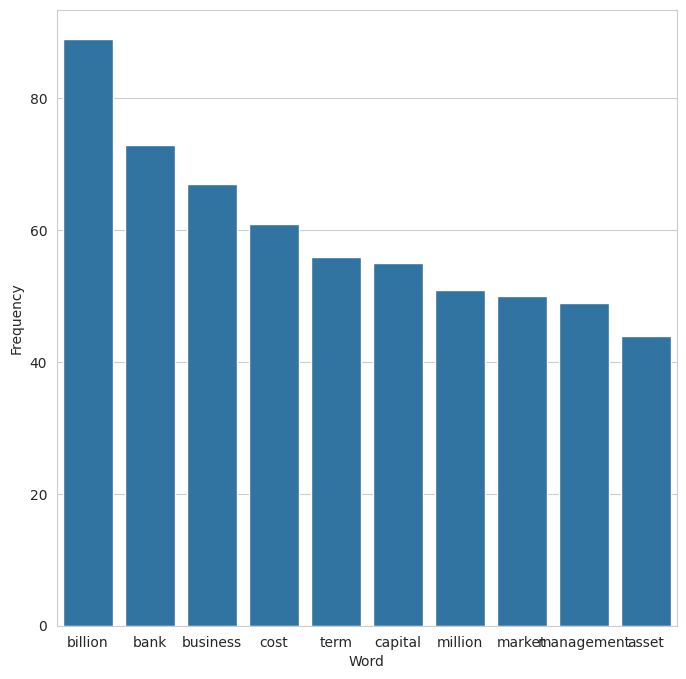

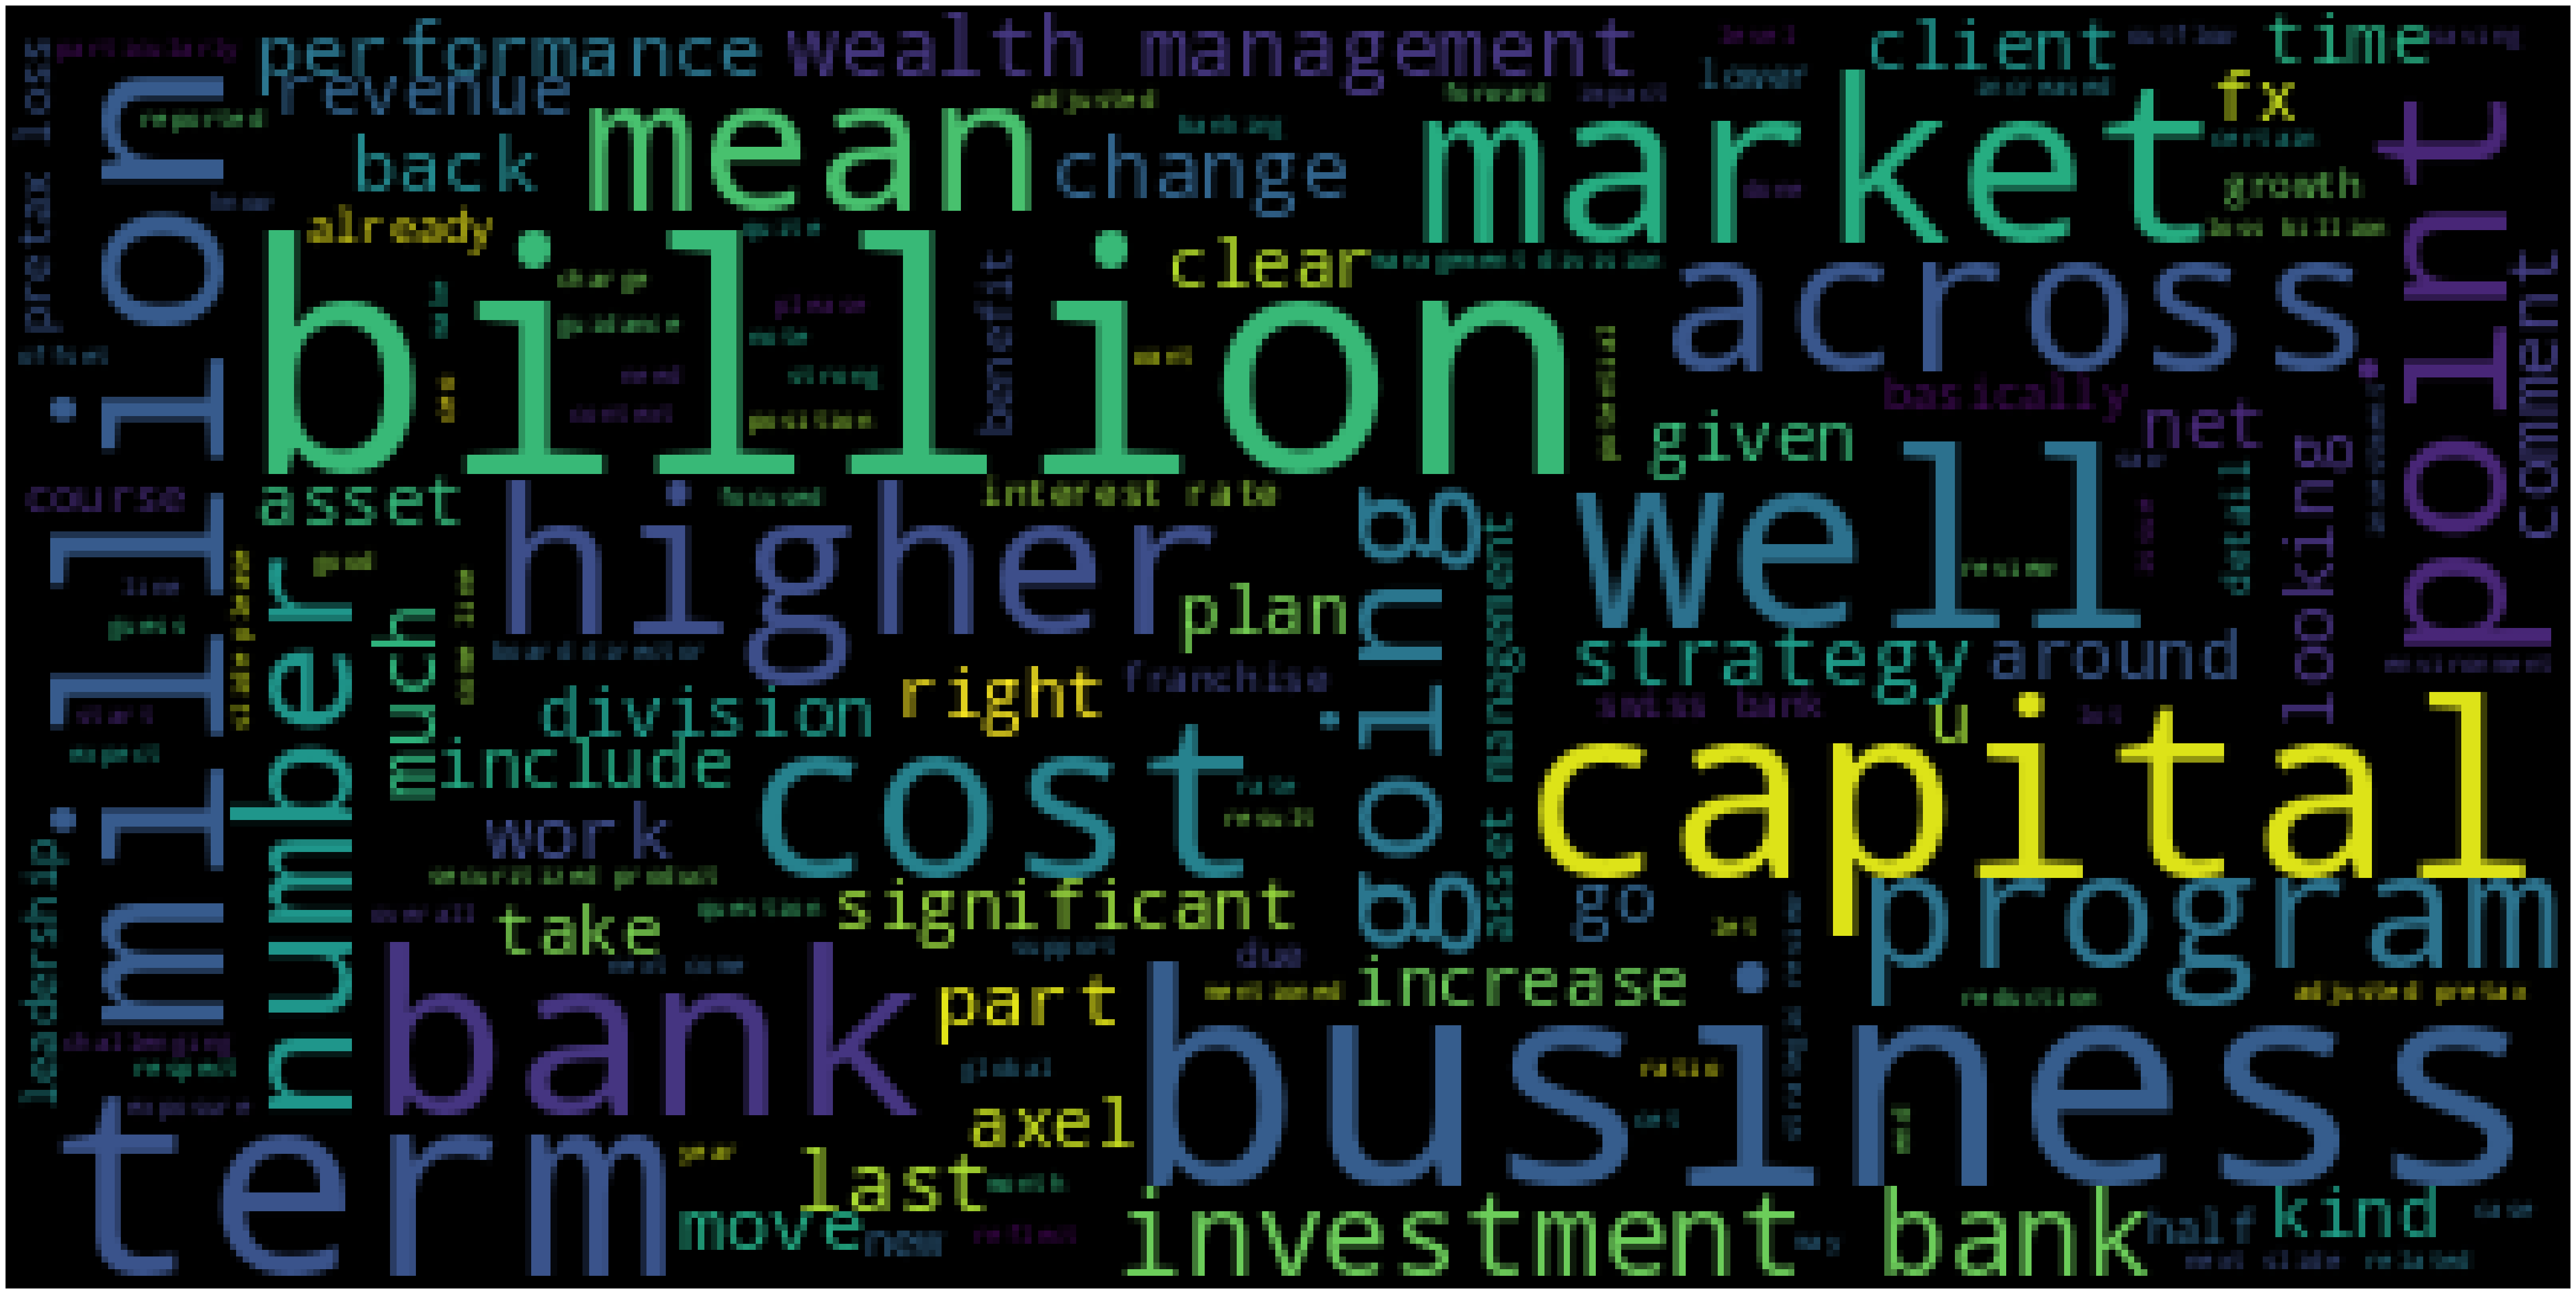

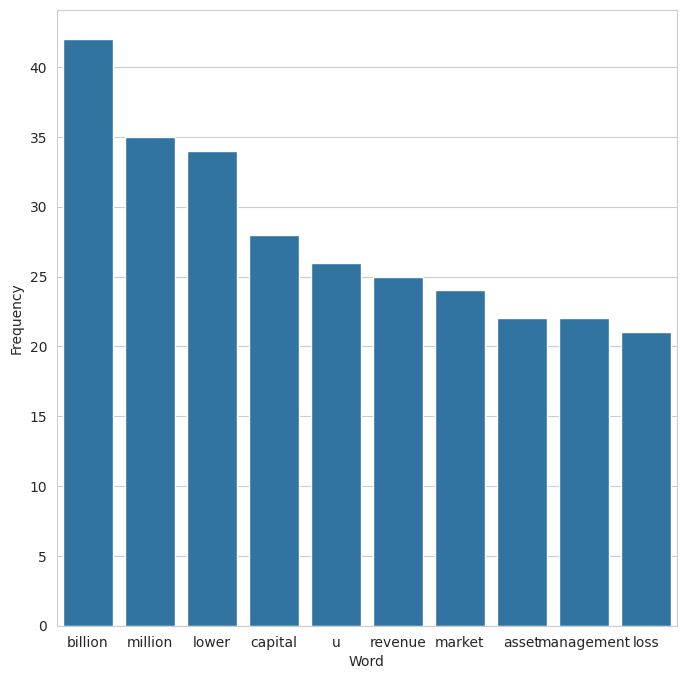

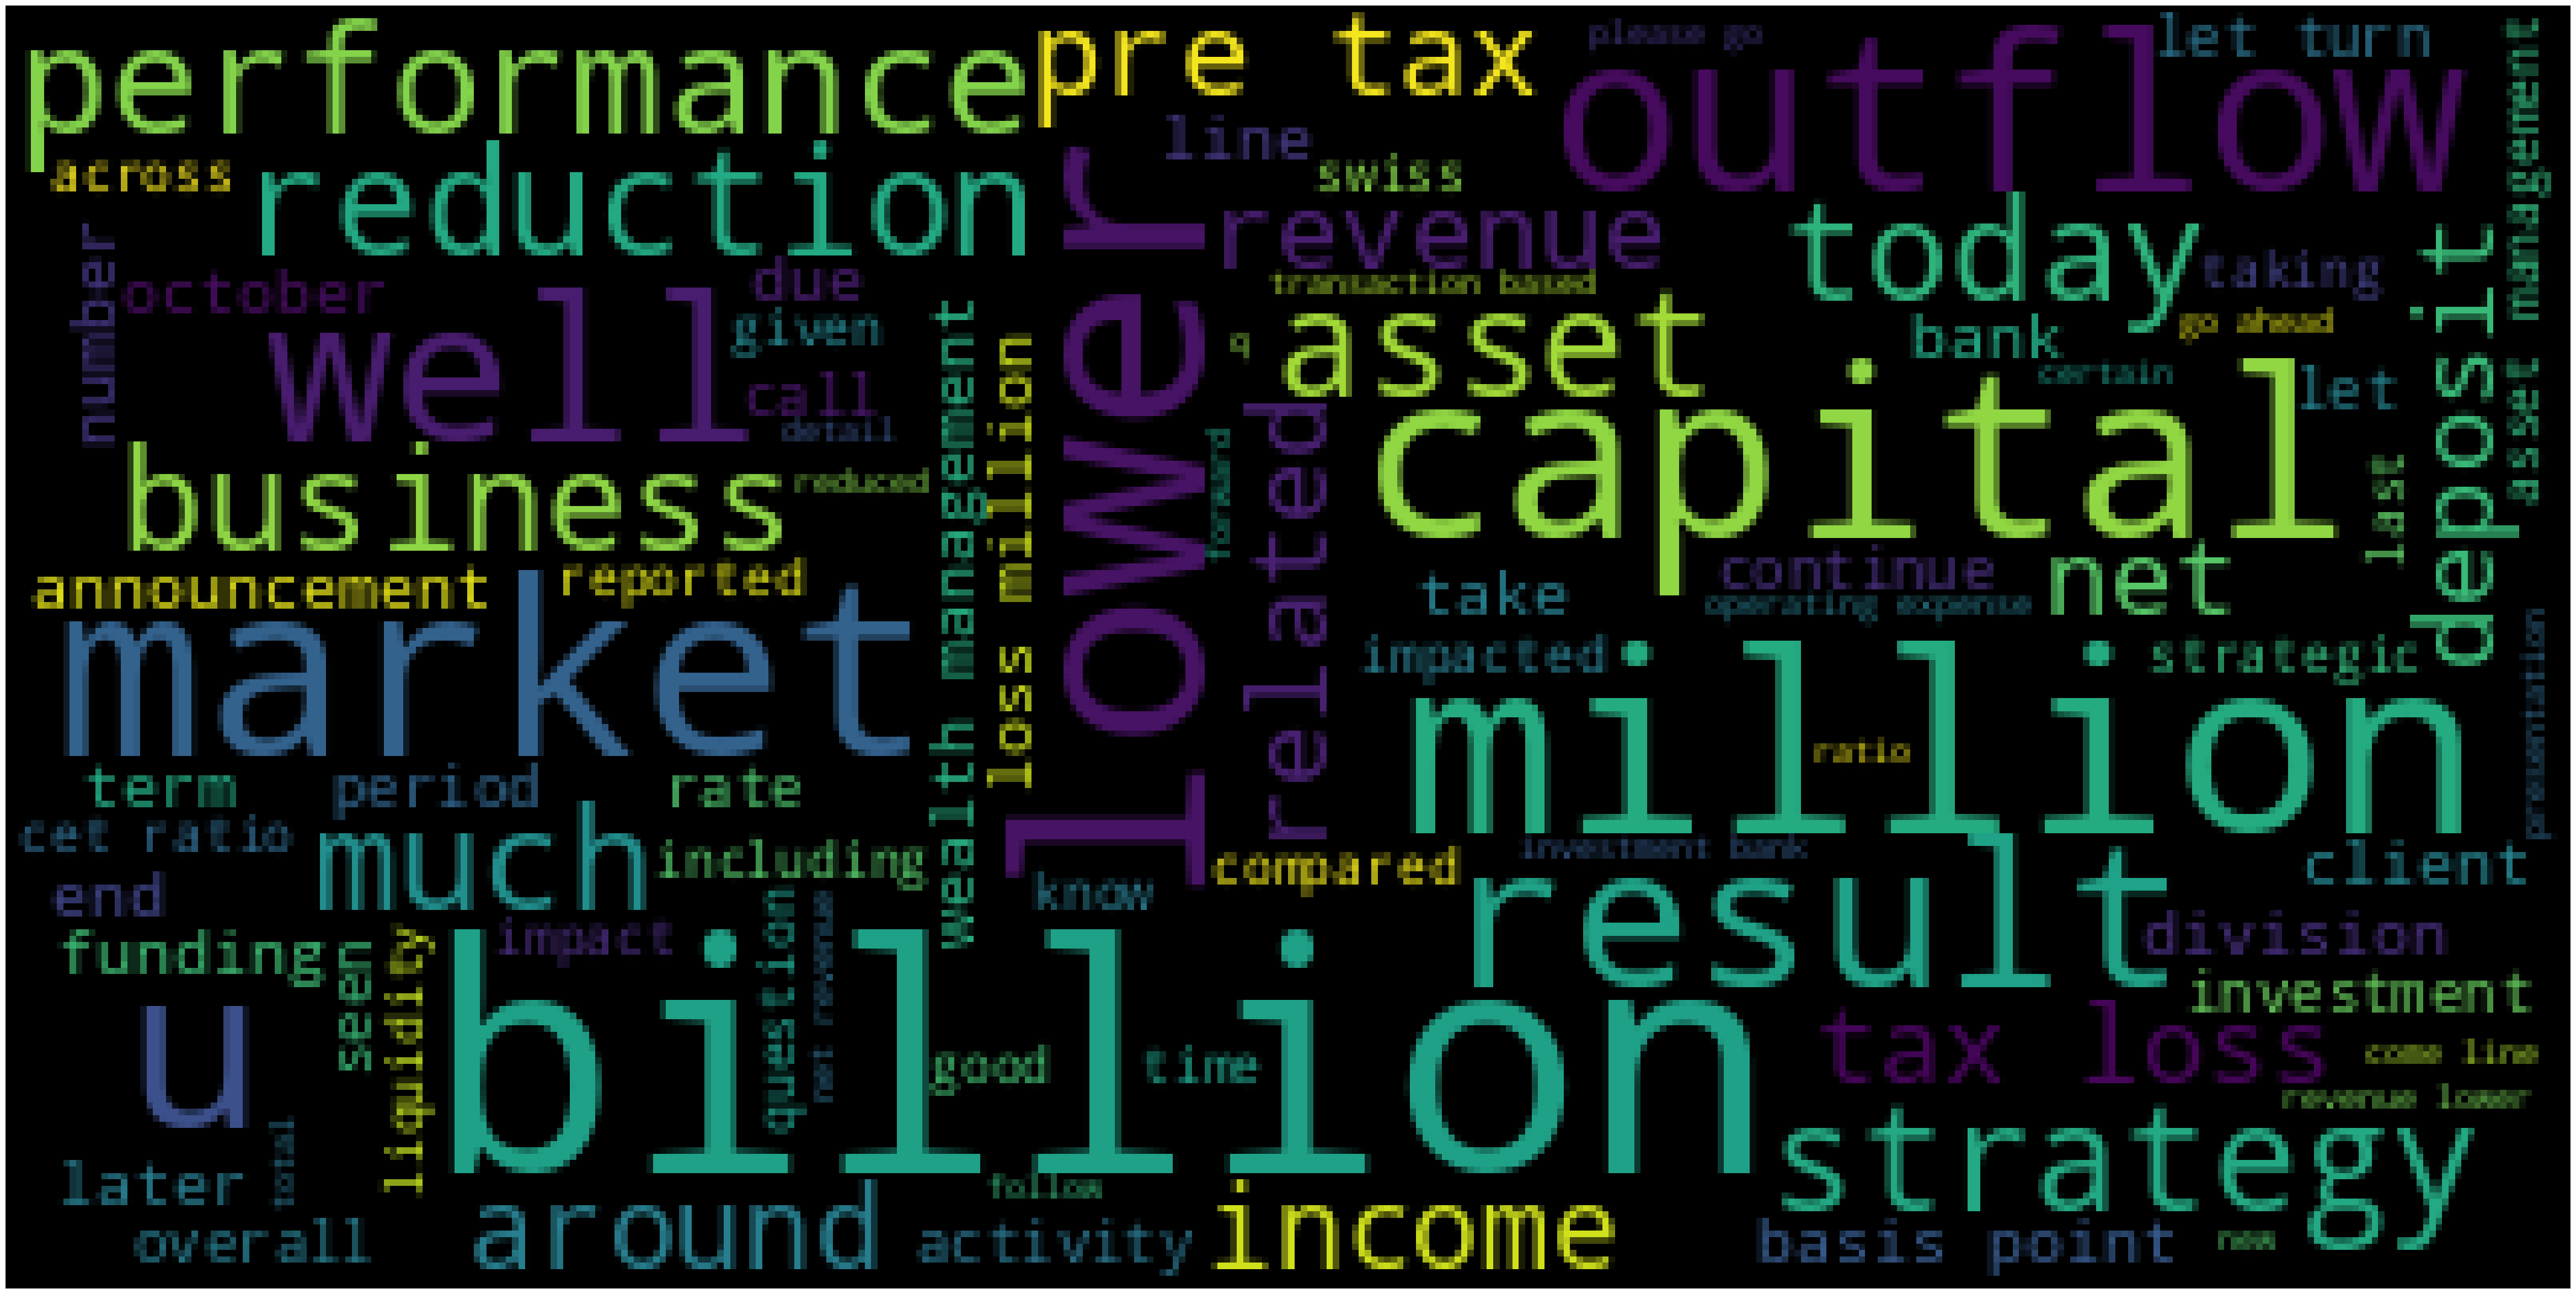

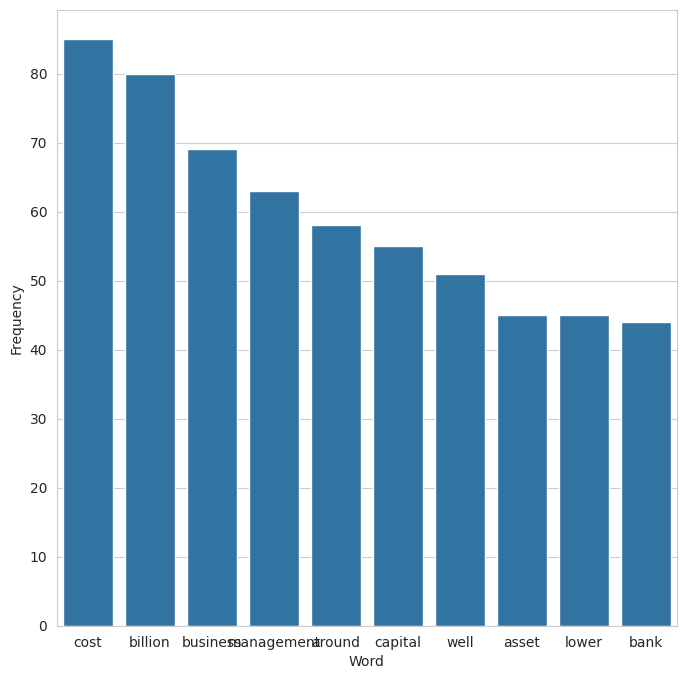

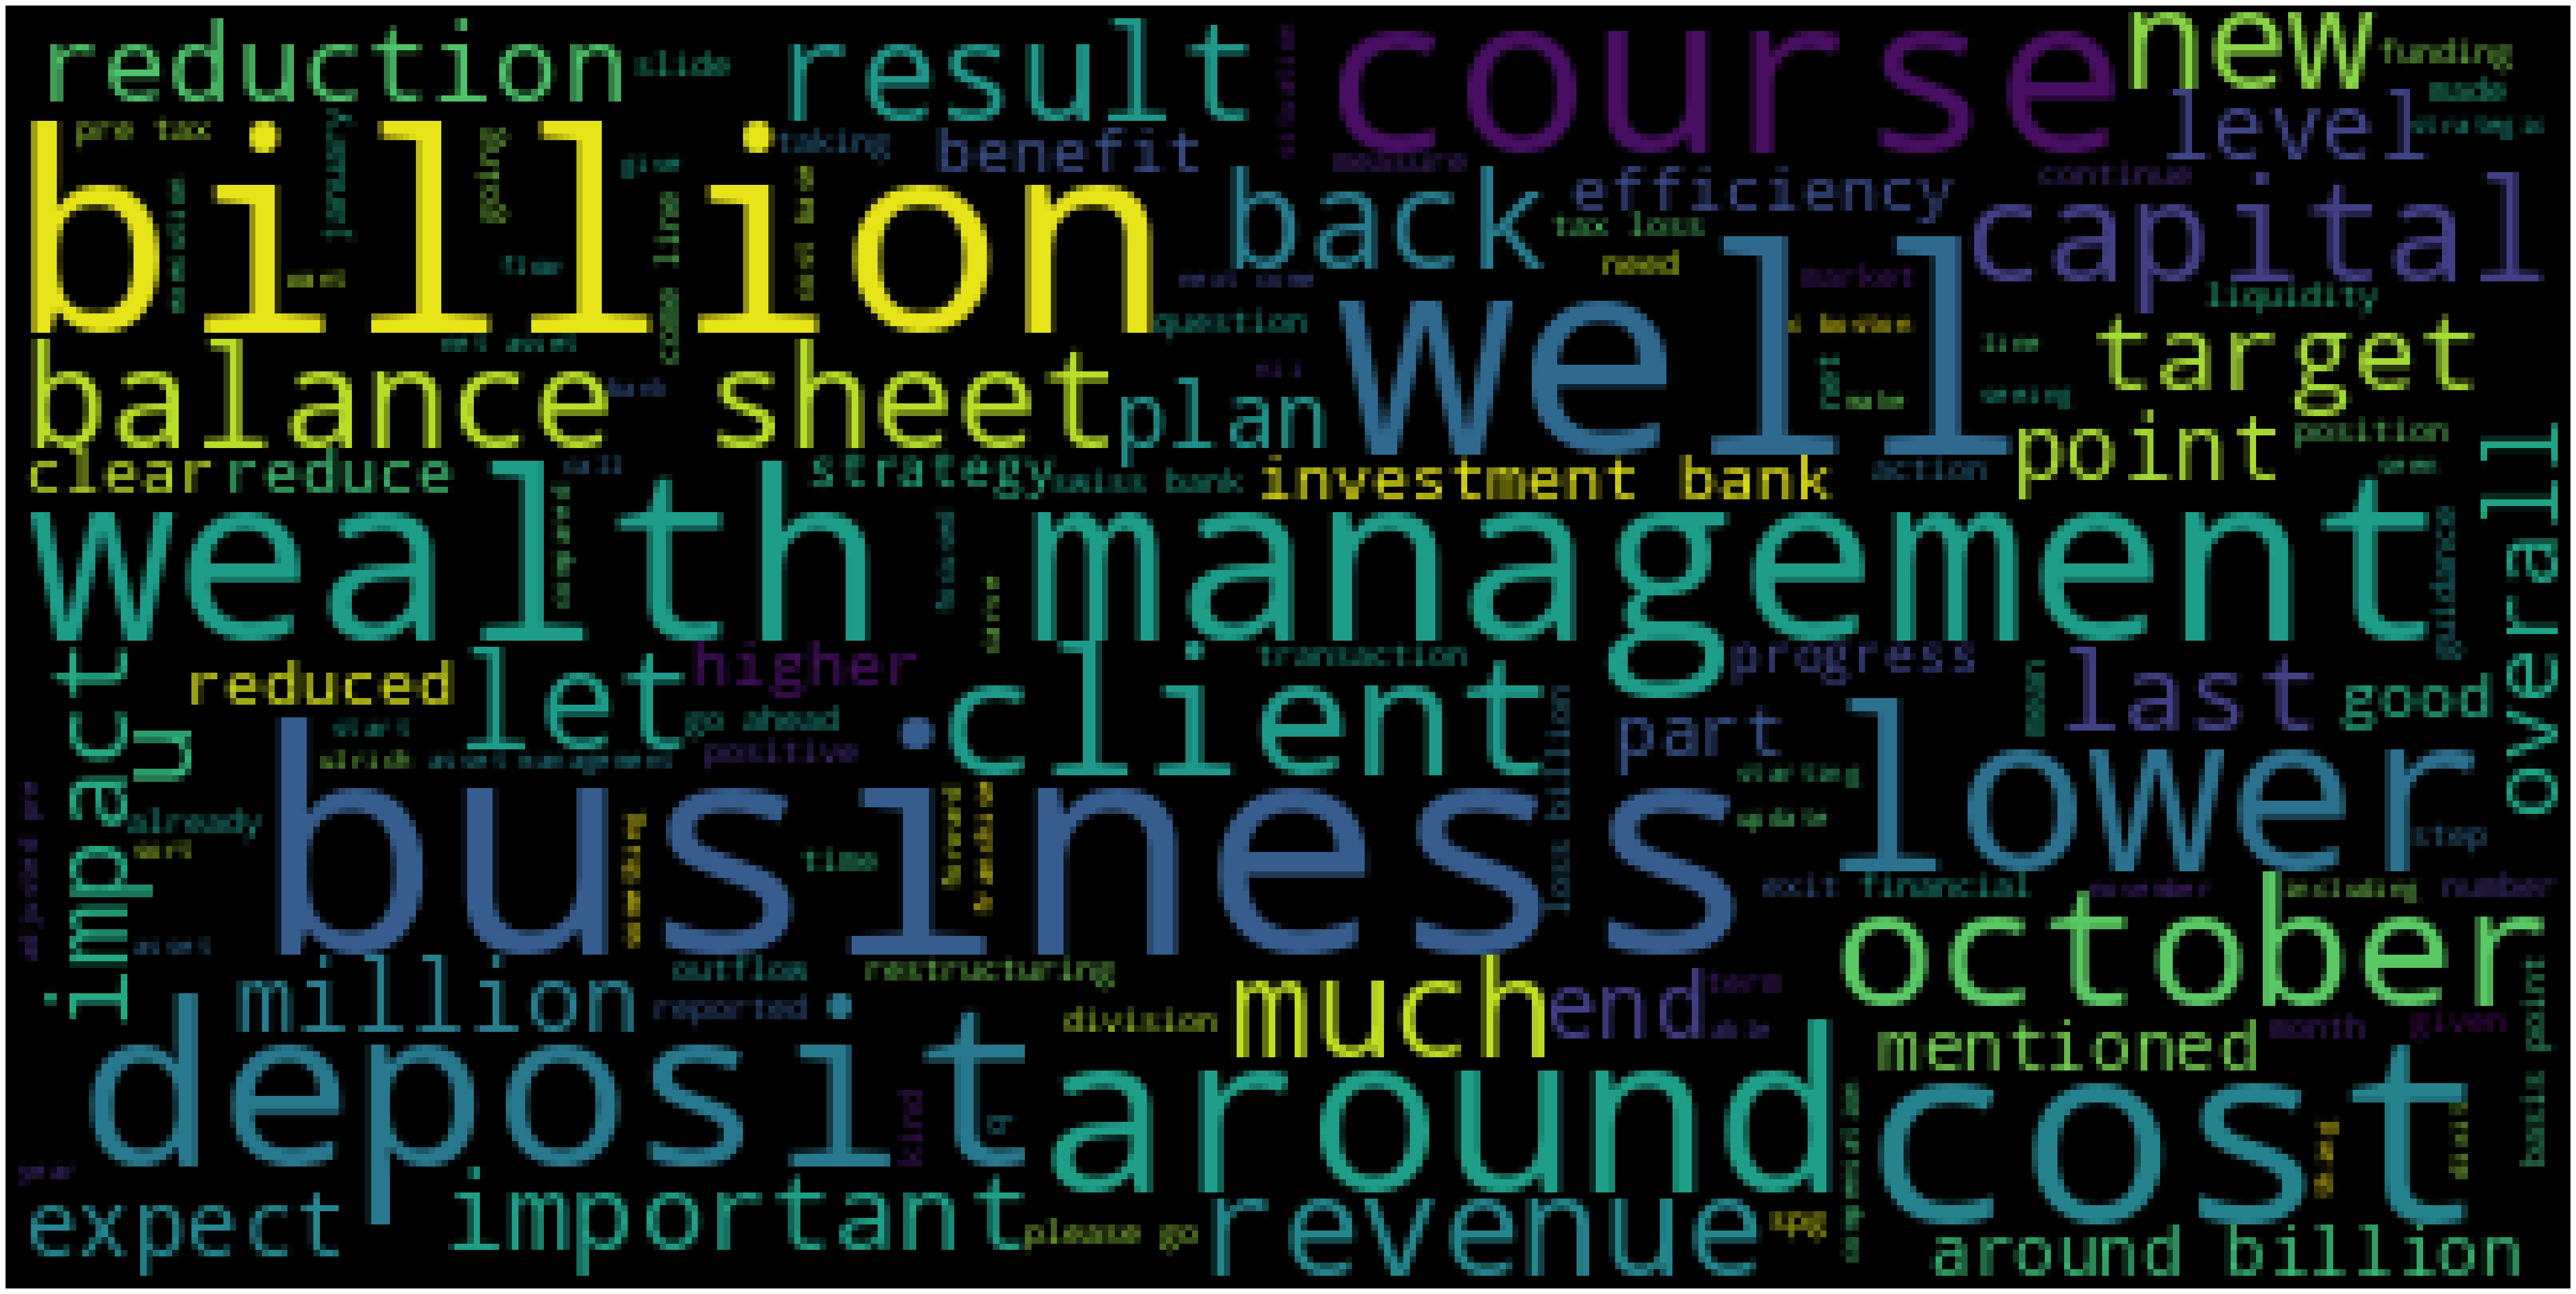

In [7]:
# word cloud for each quarter - Original transcript
transcript_grouped_df = transcript_df.groupby(by=["Year", "Quarter"])

for name, groups in transcript_grouped_df:
  word_cloud_display(groups, "Dialogue")

## WordCloud - Quarterly - Summarised Transcript

<ipython-input-4-9b7dff9d721a>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


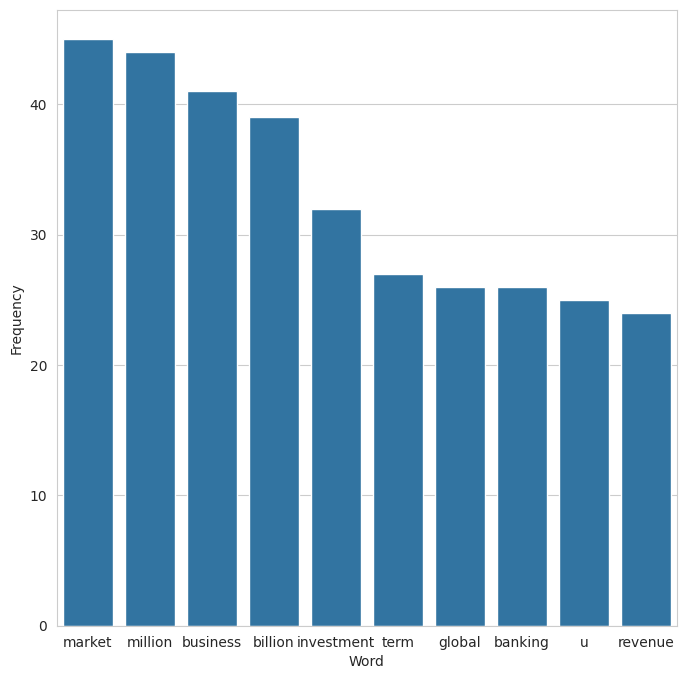

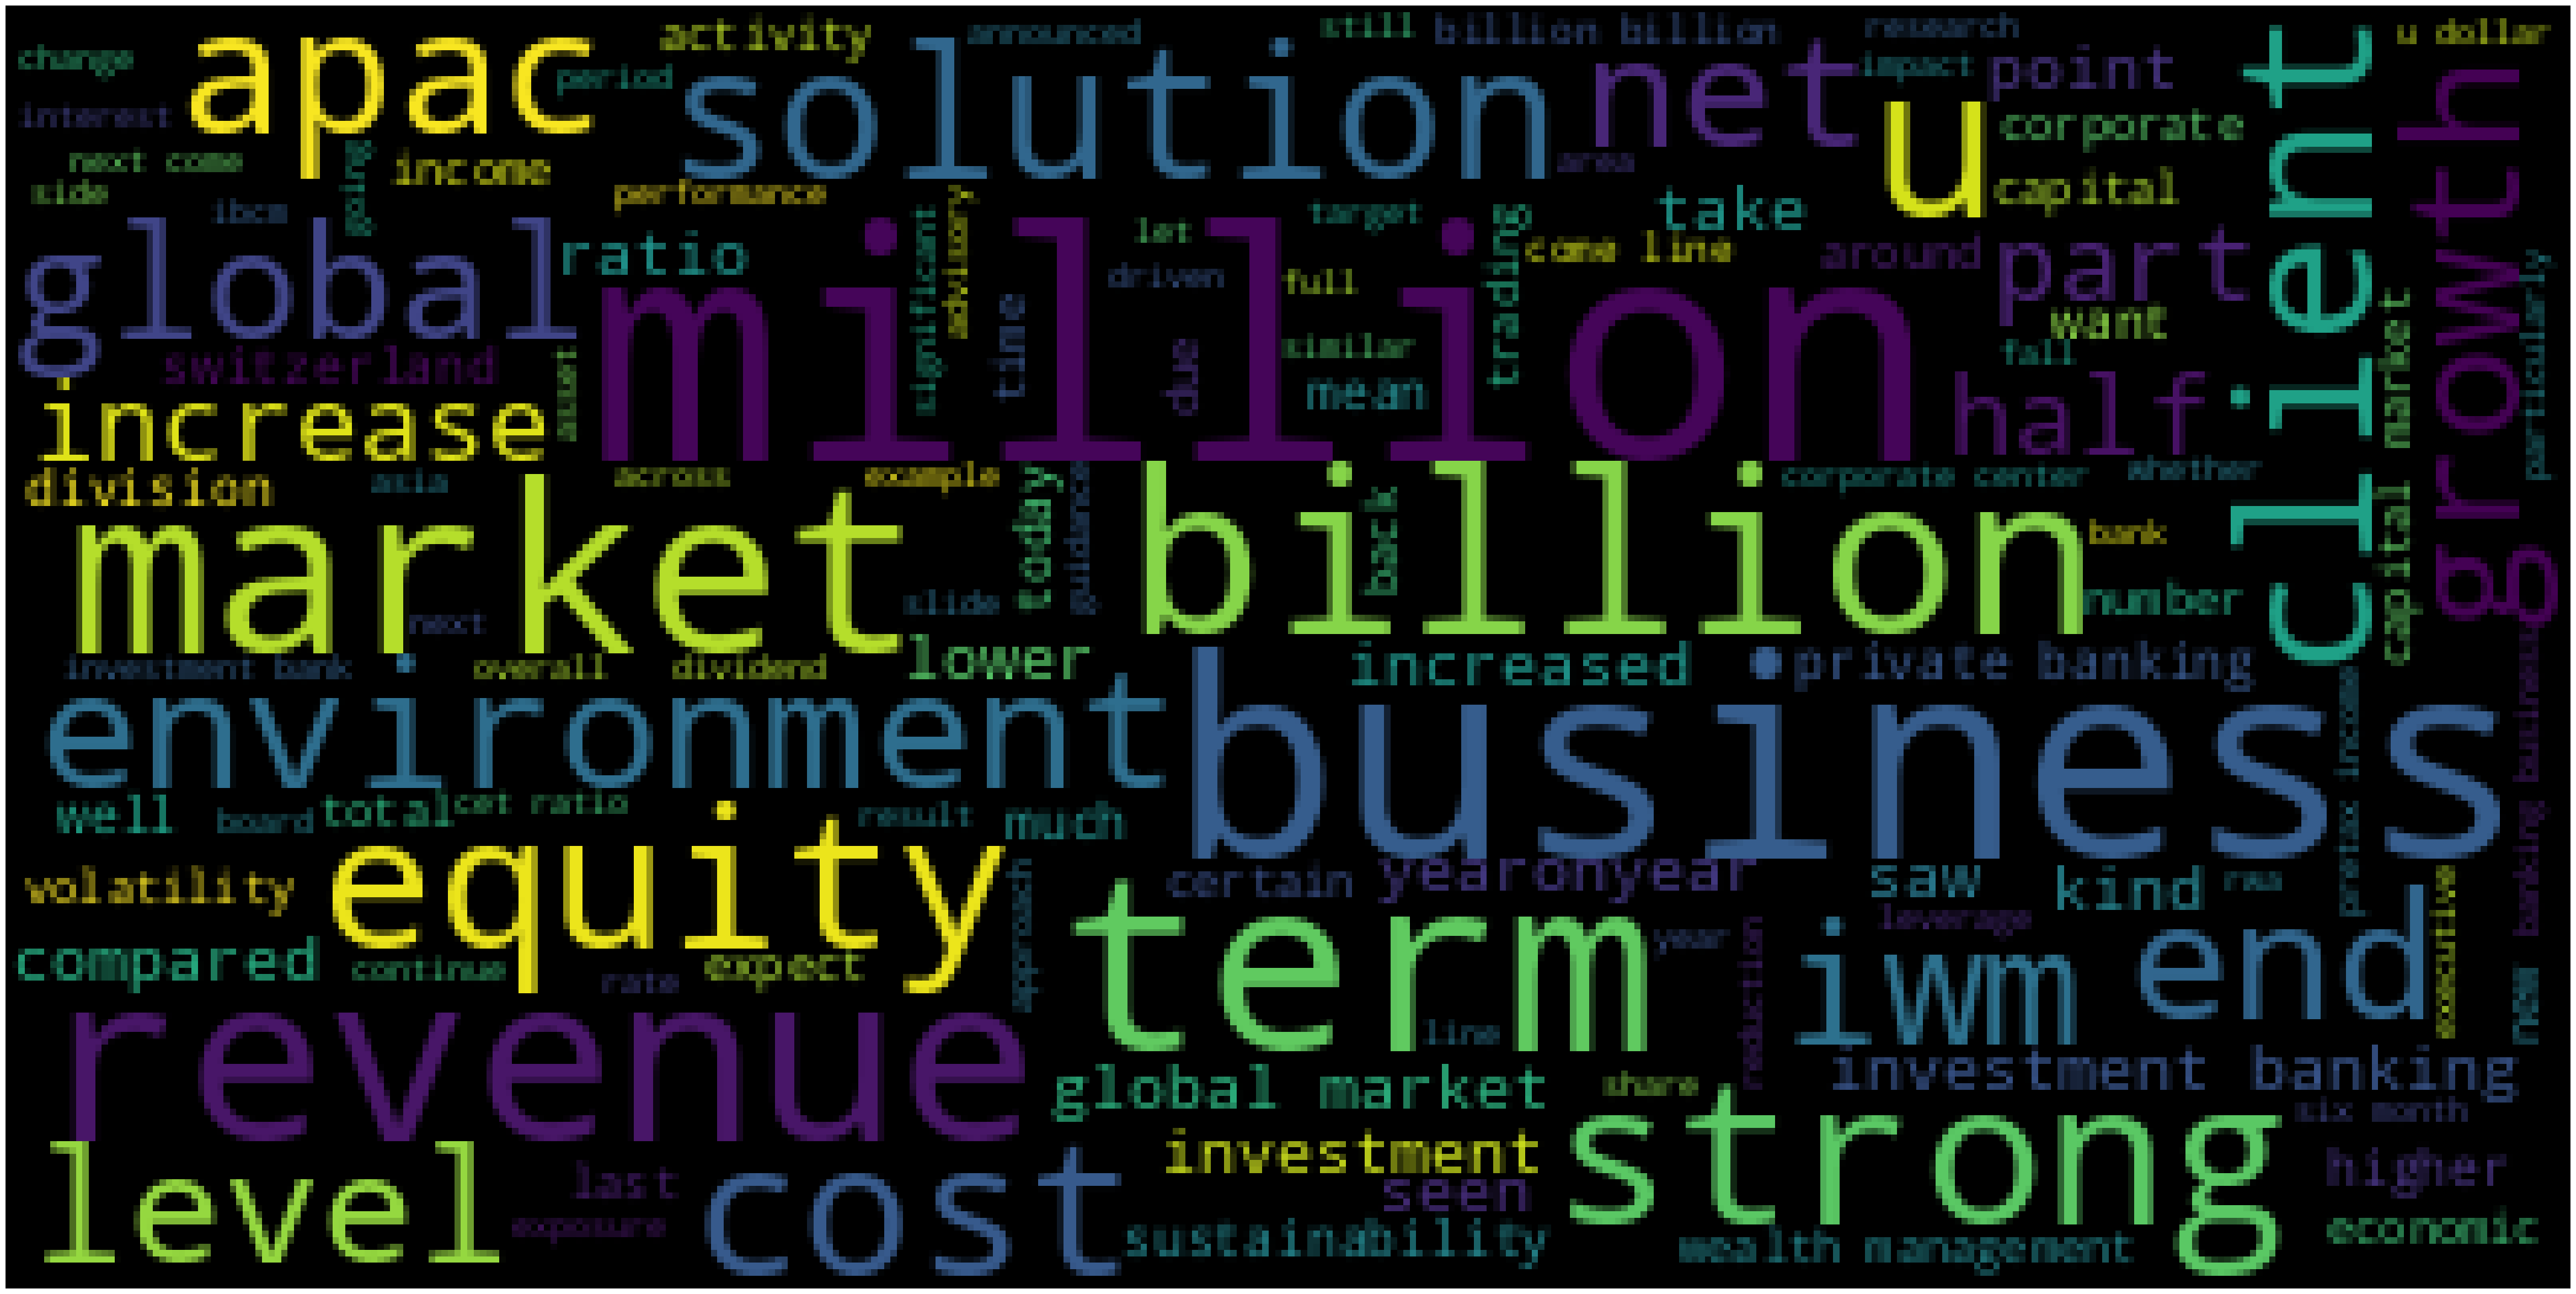

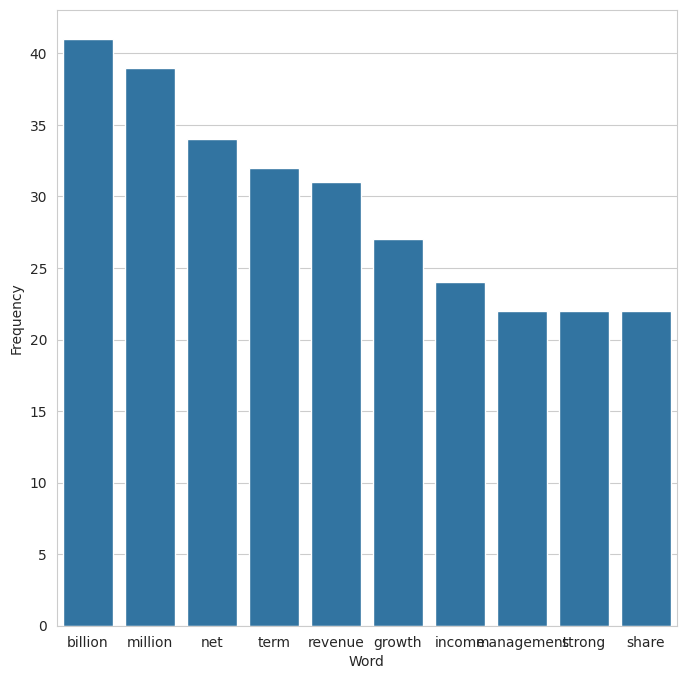

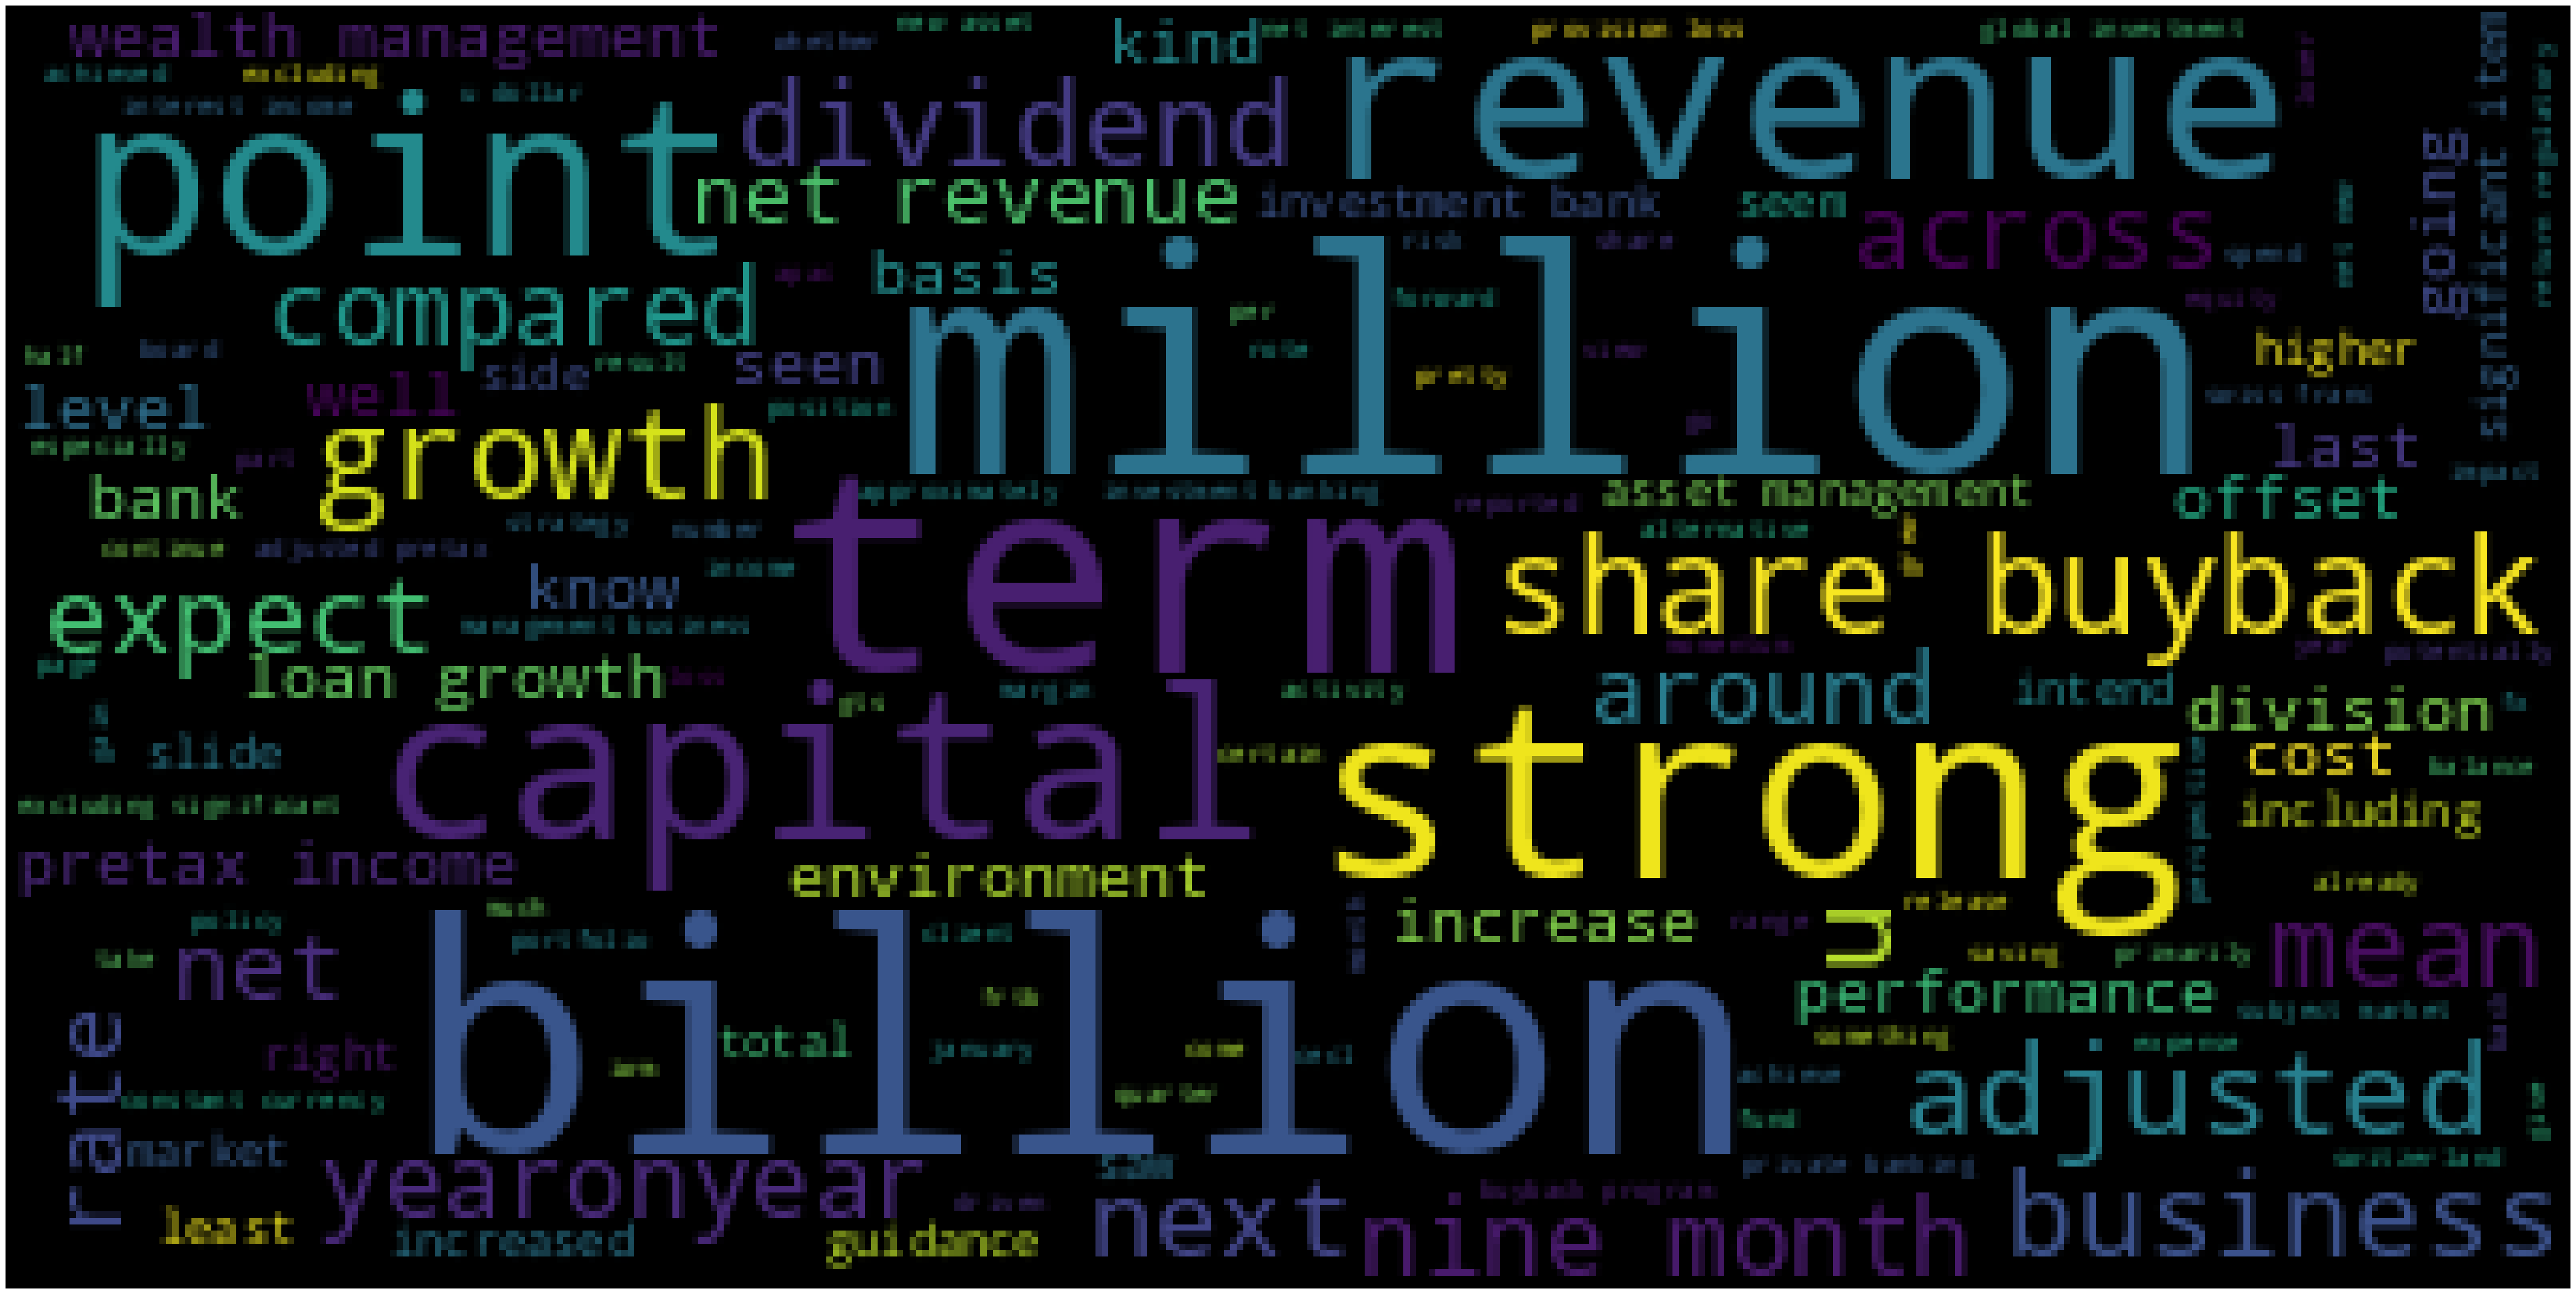

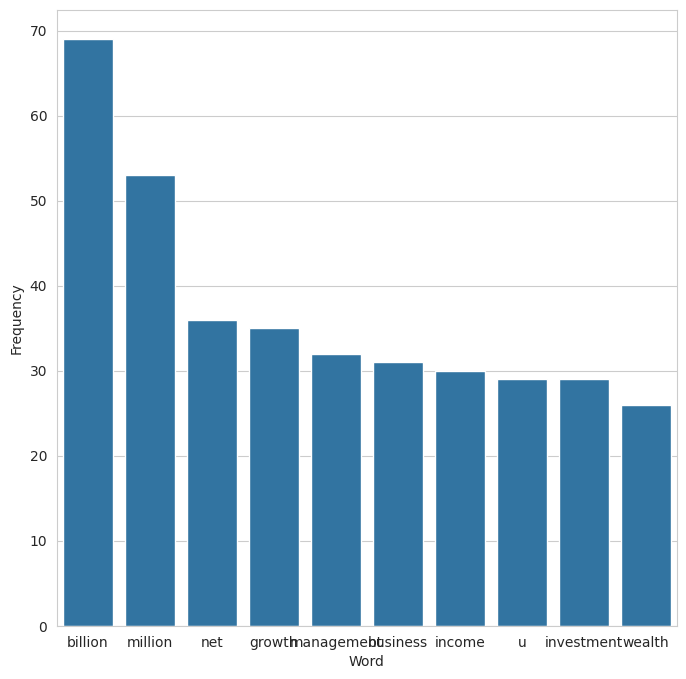

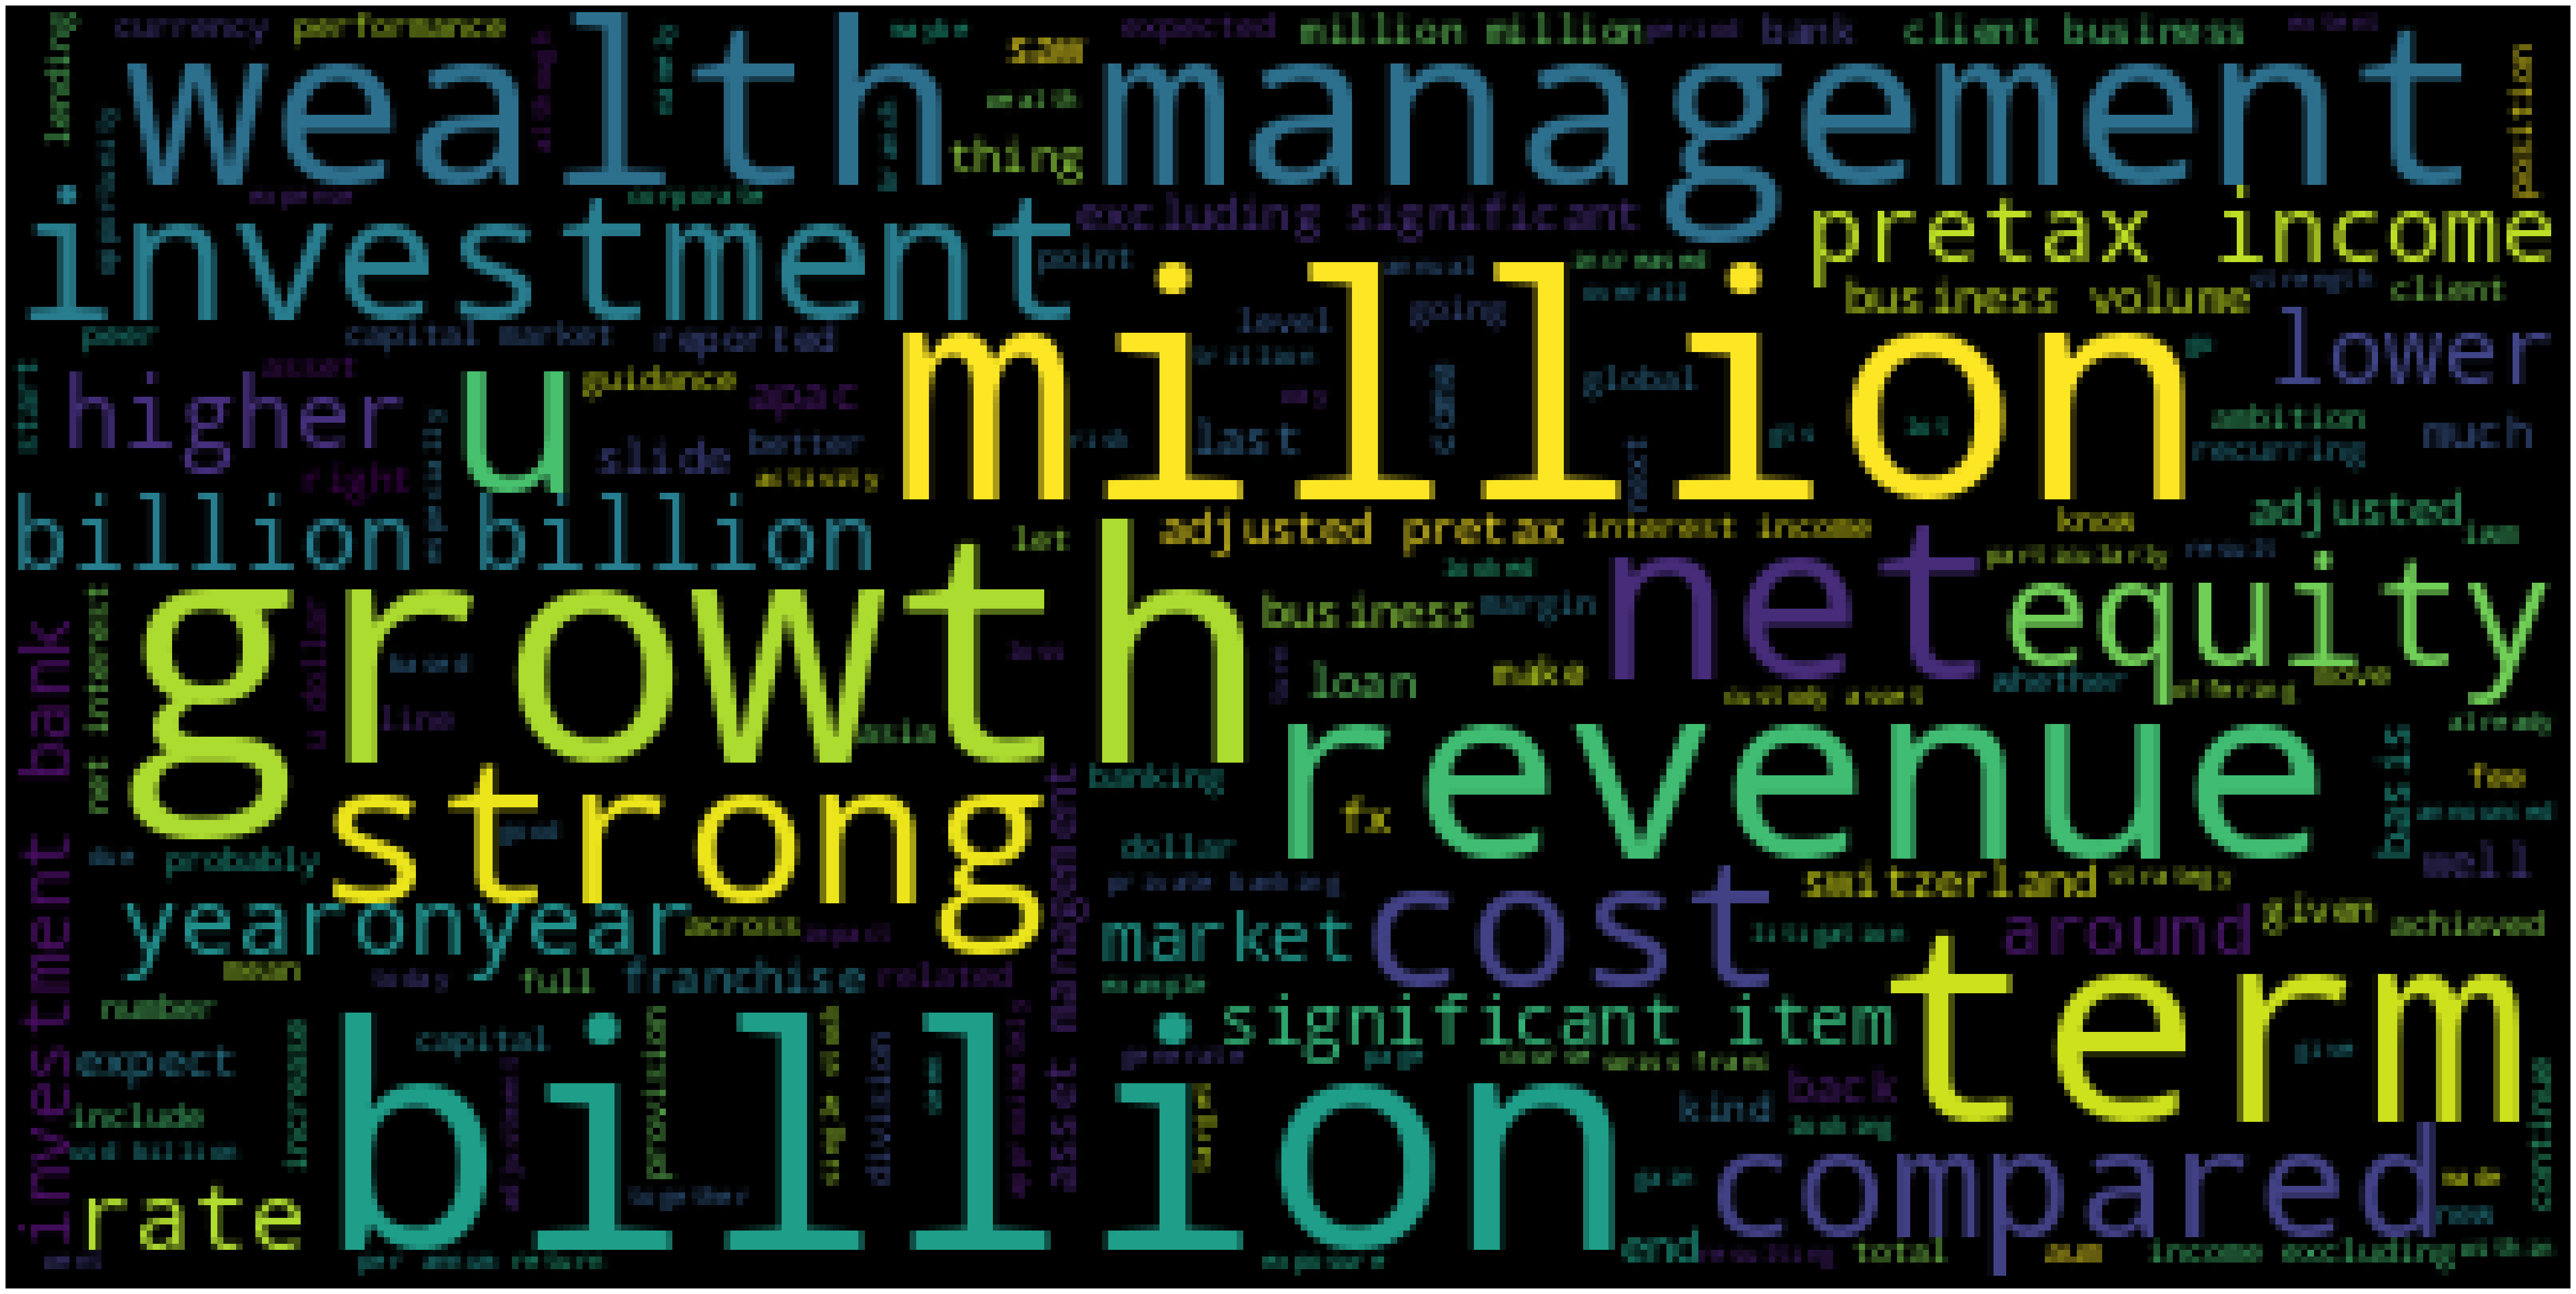

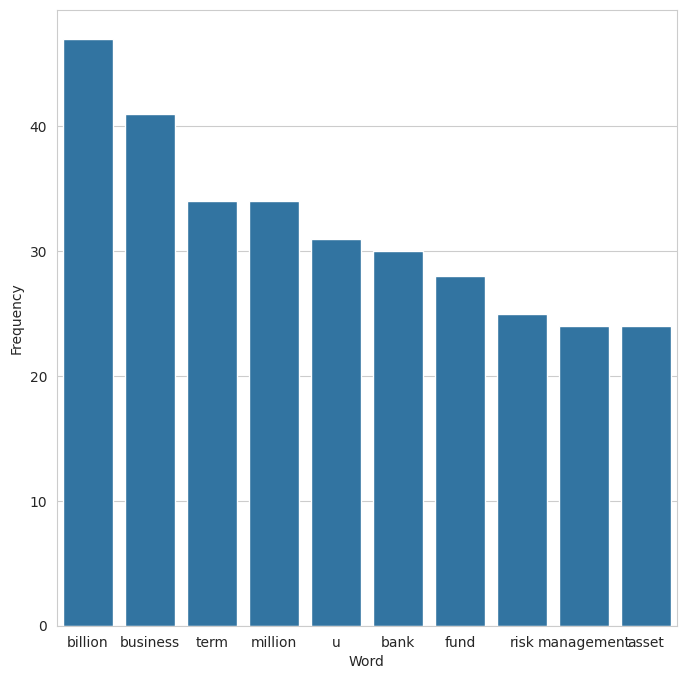

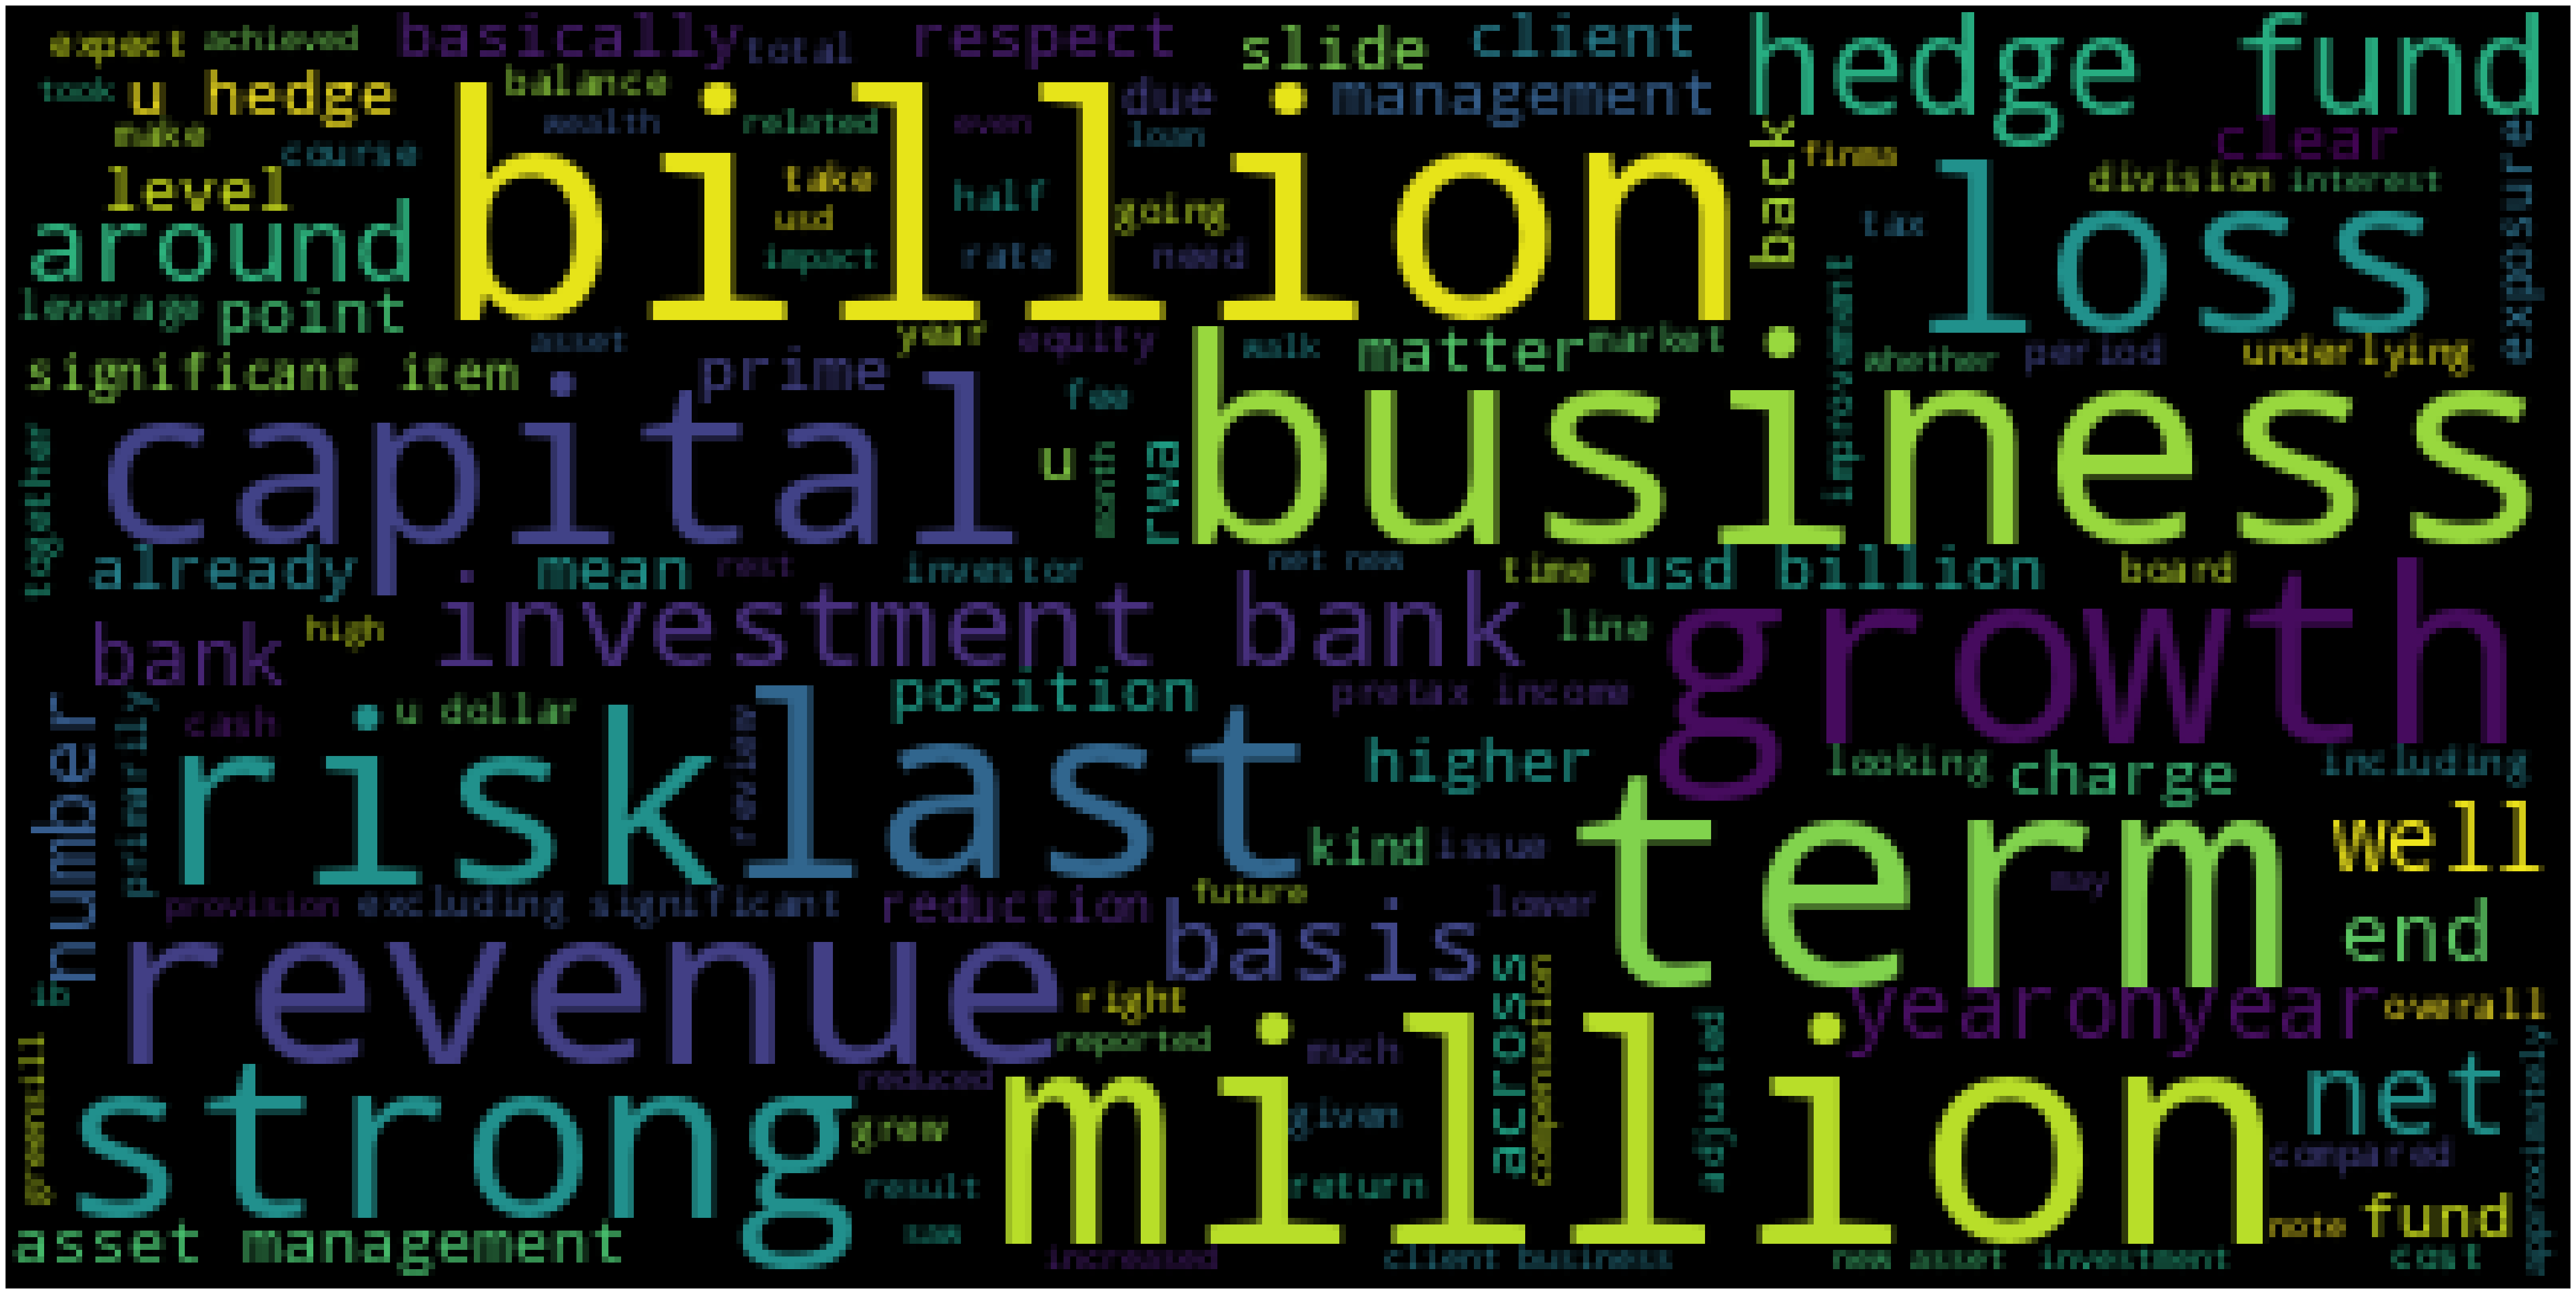

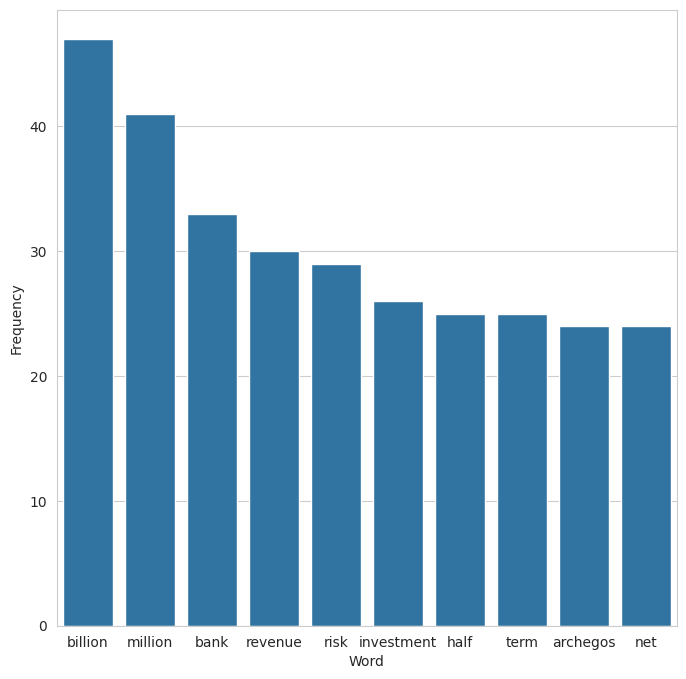

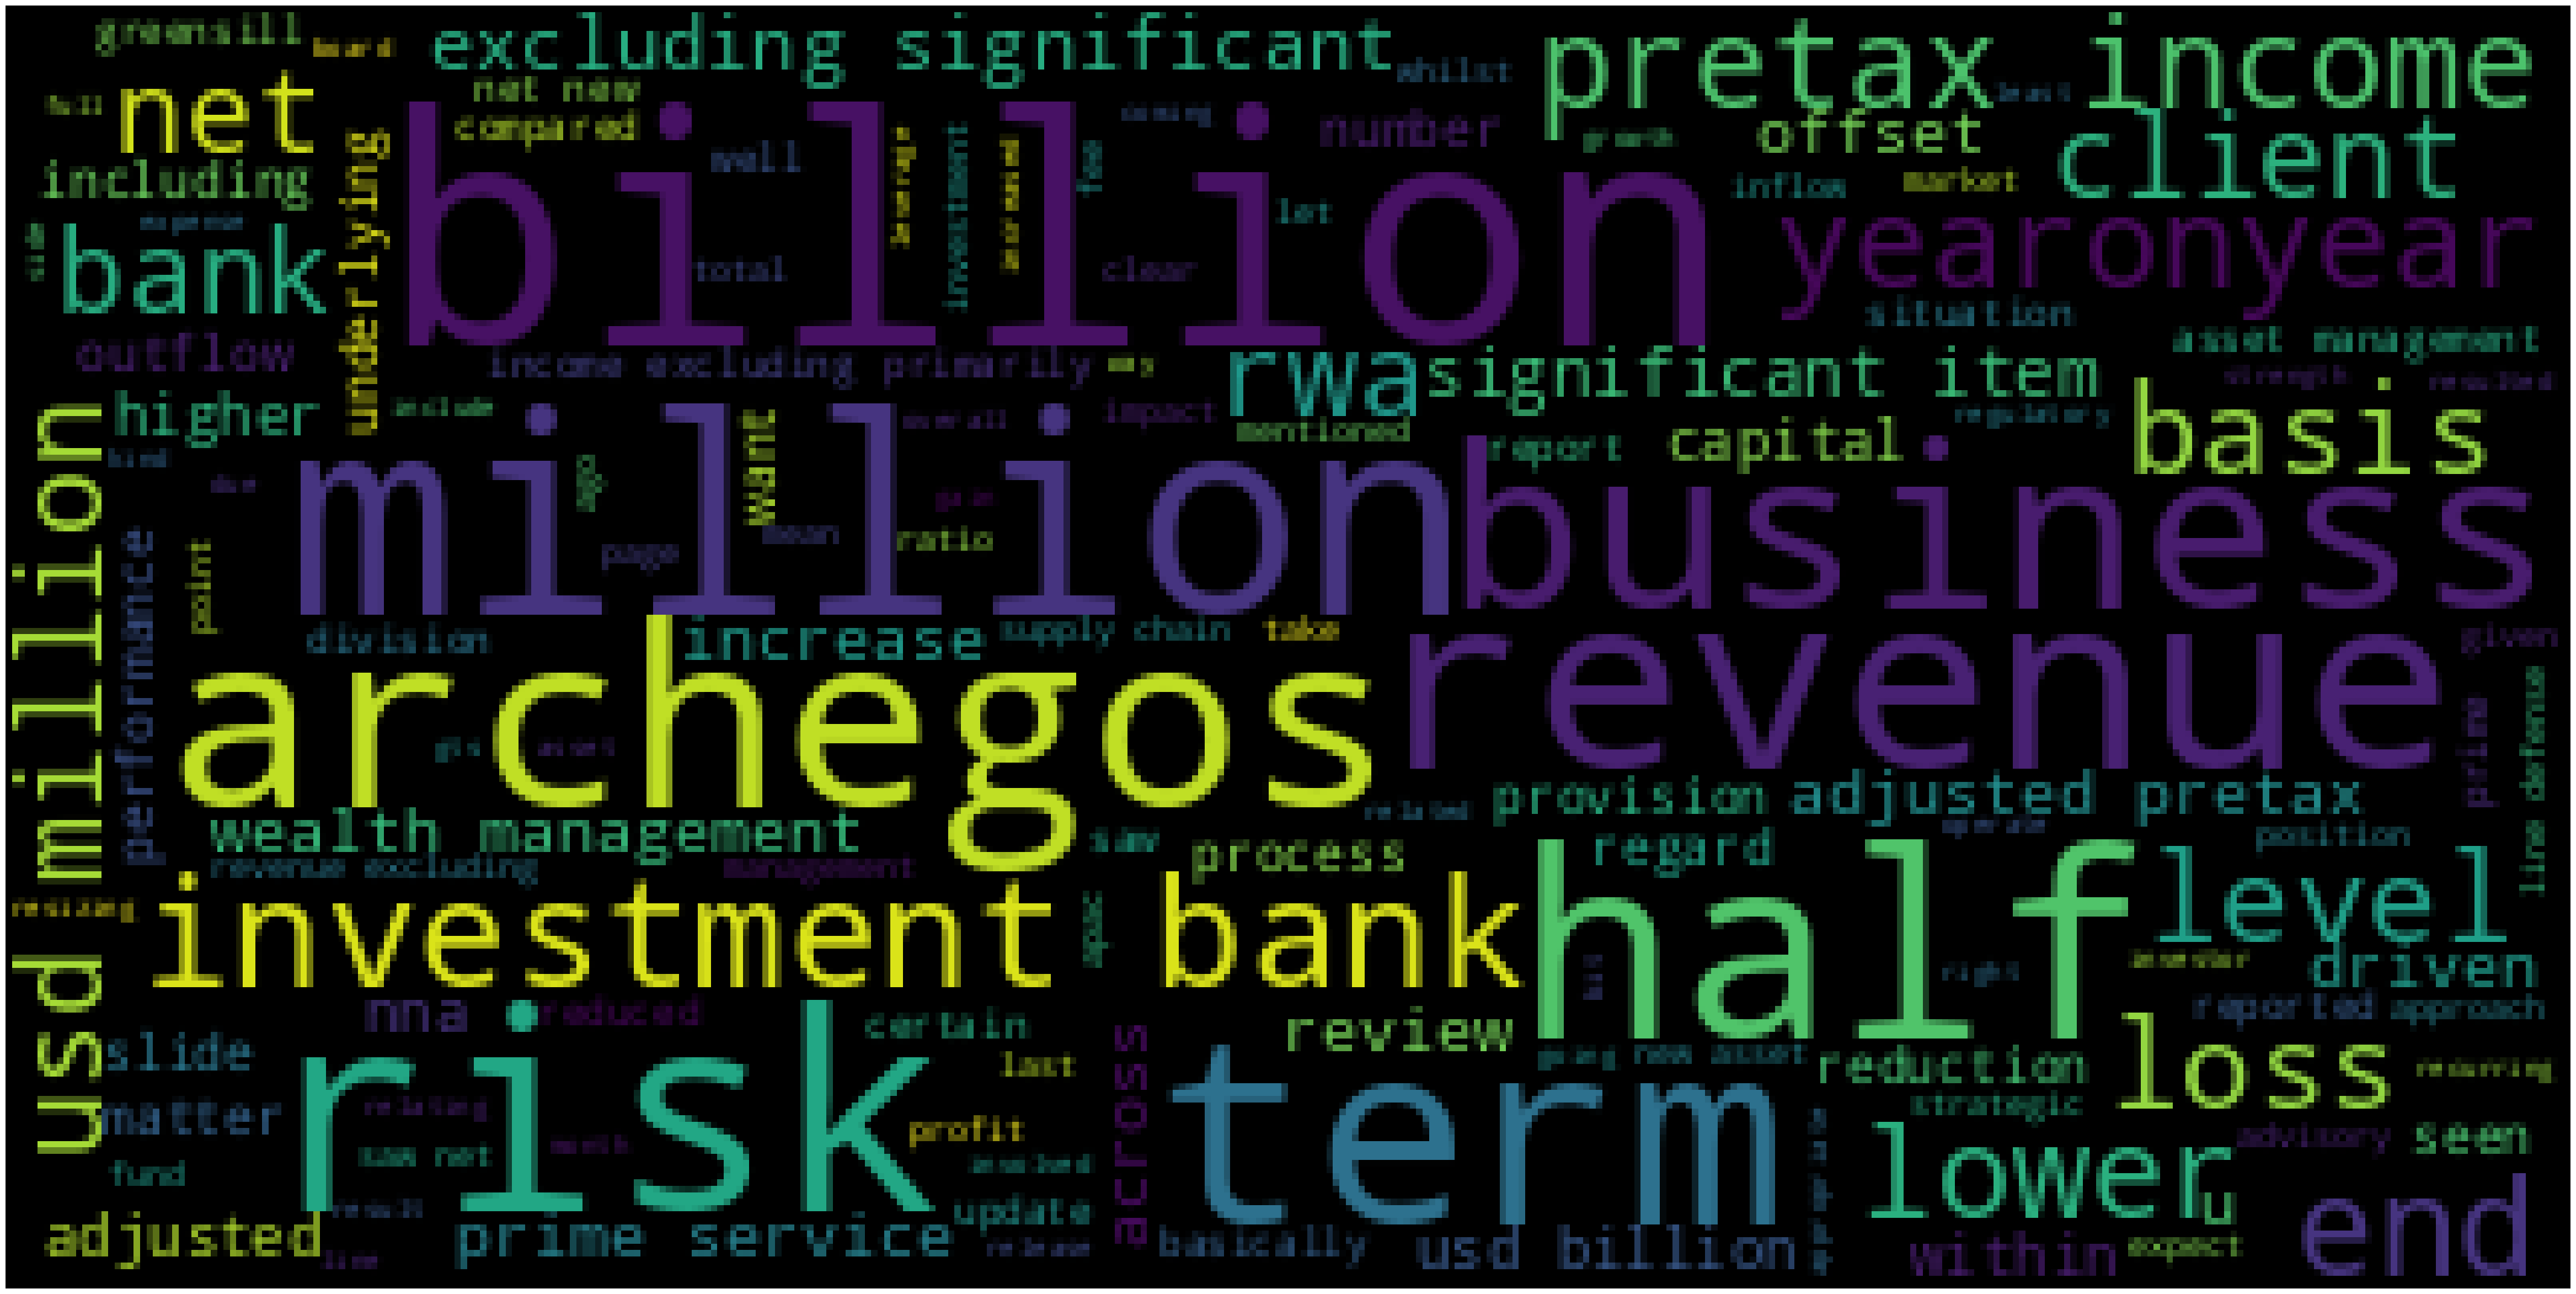

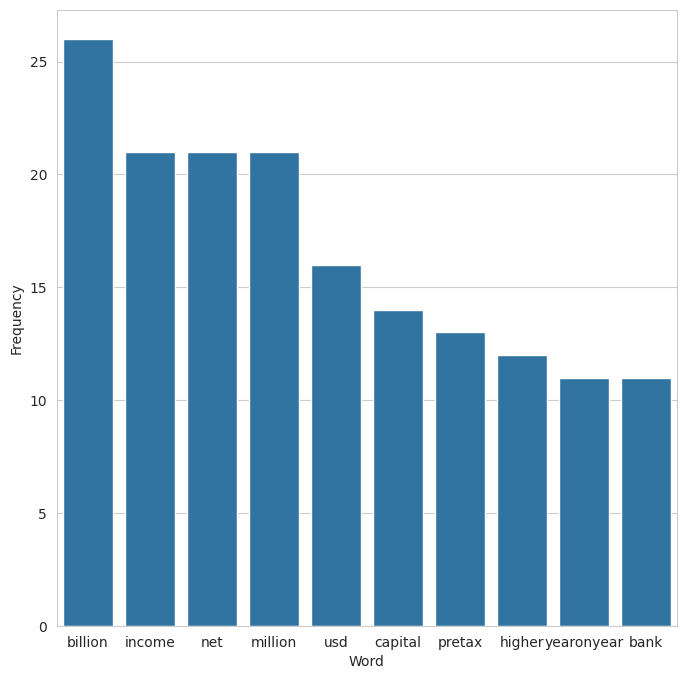

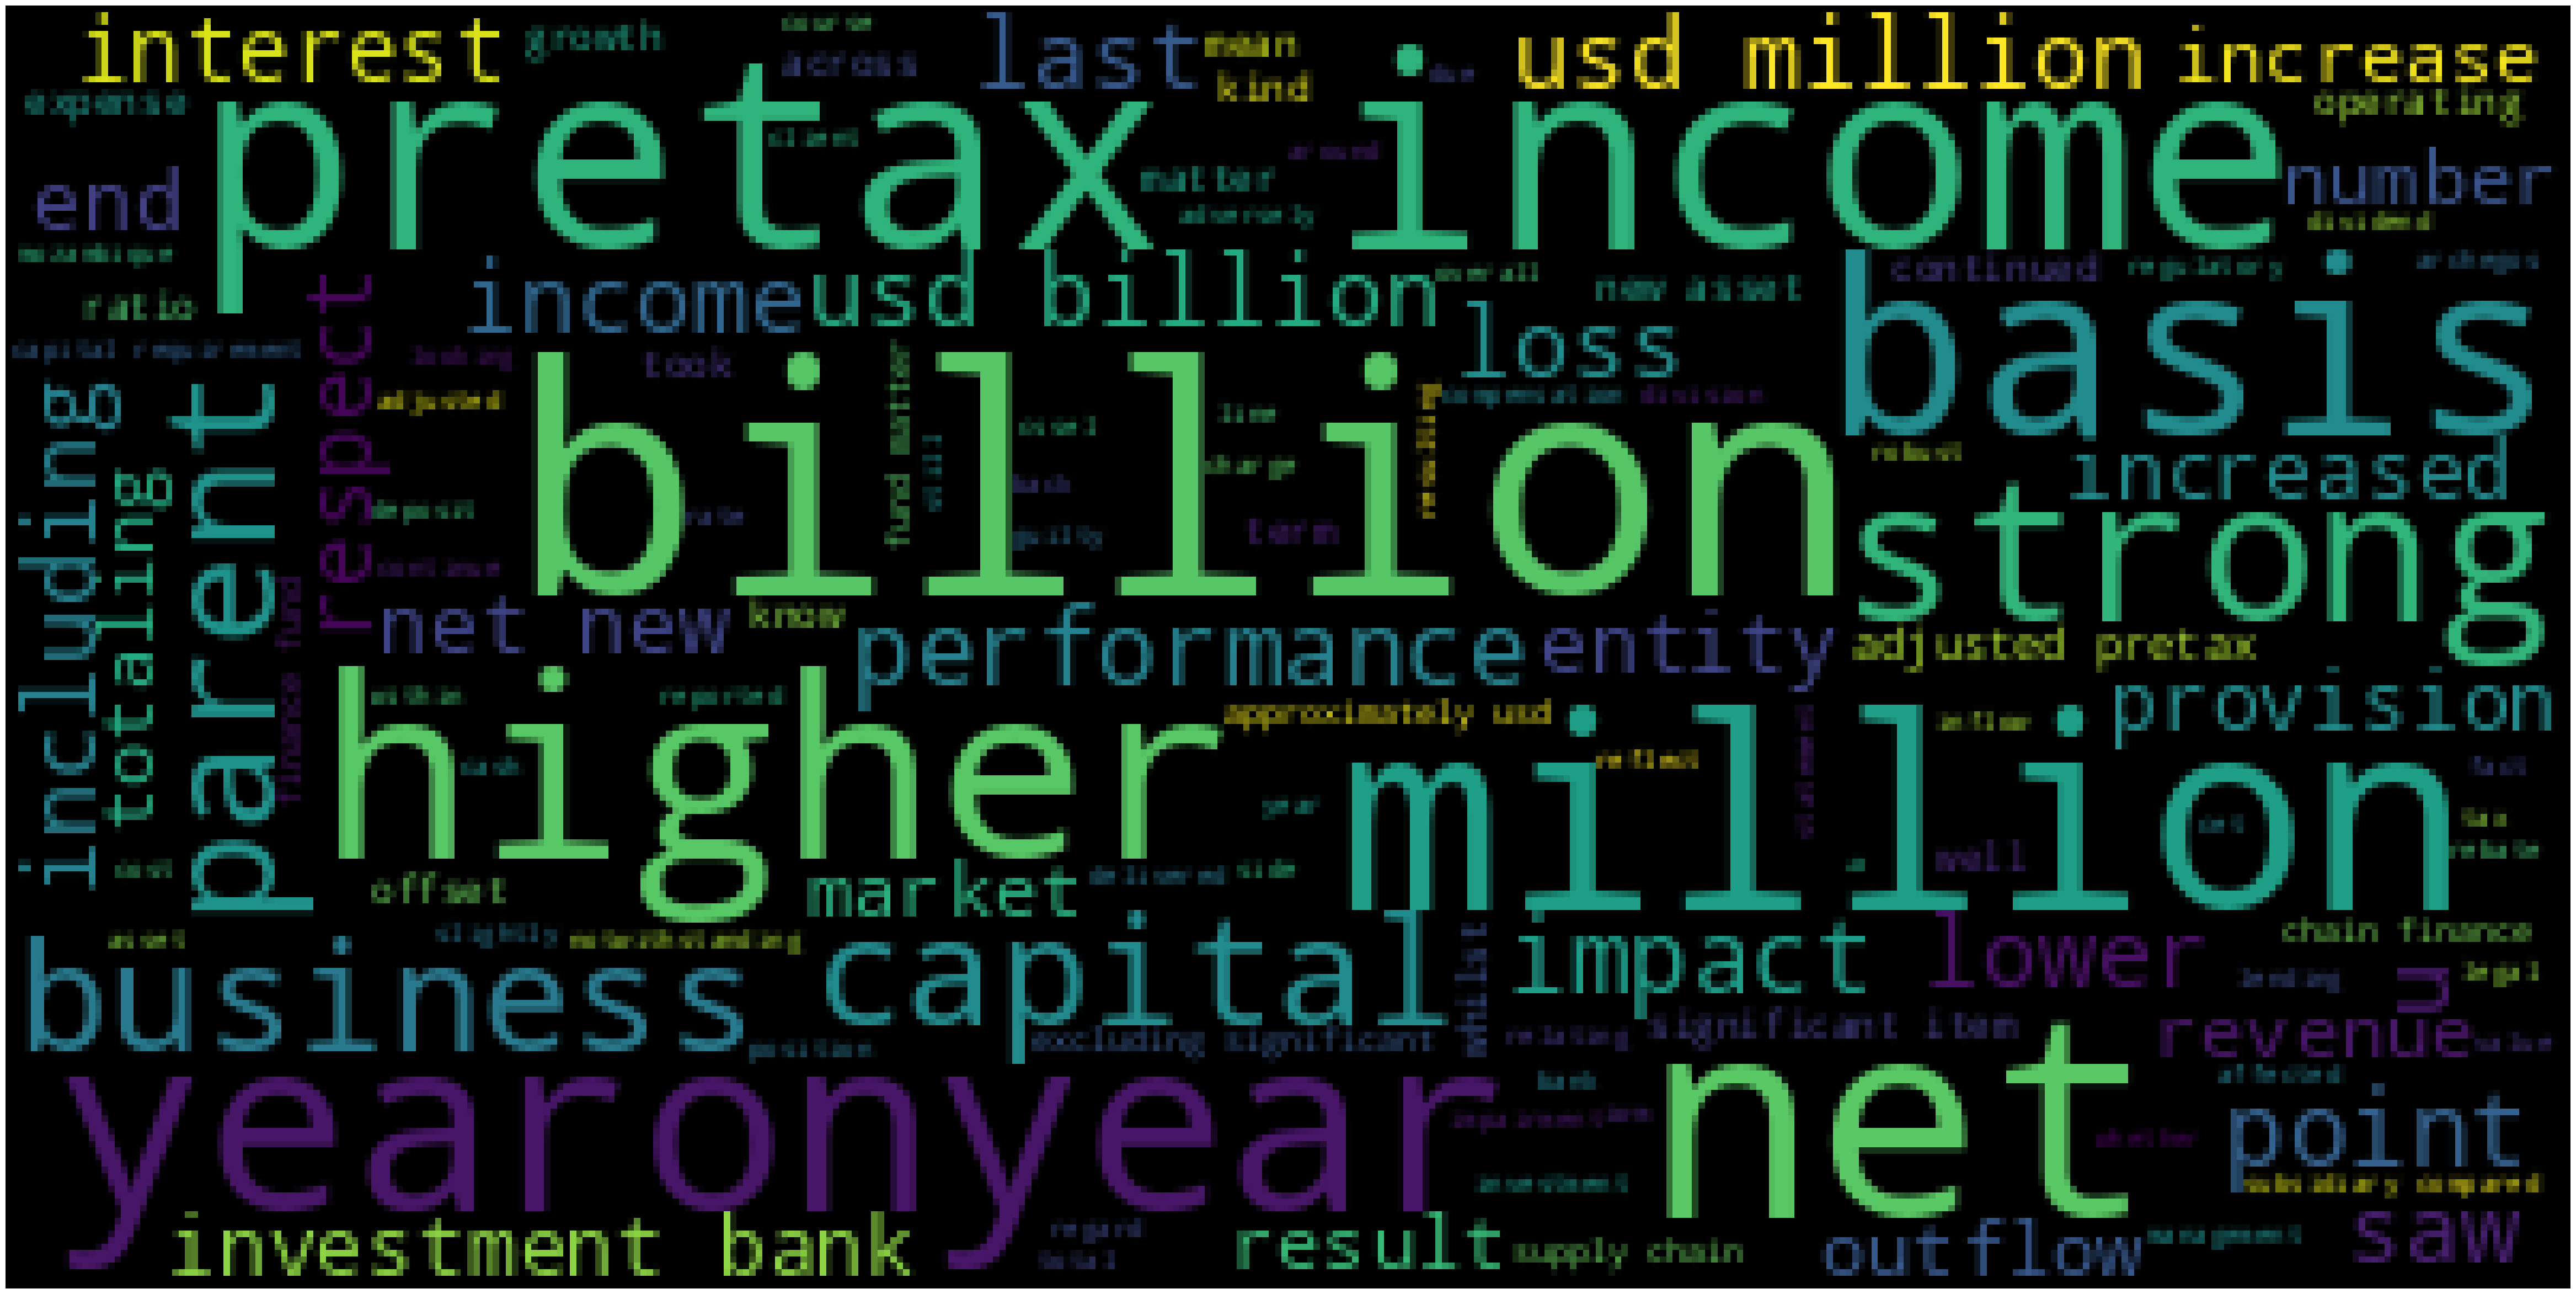

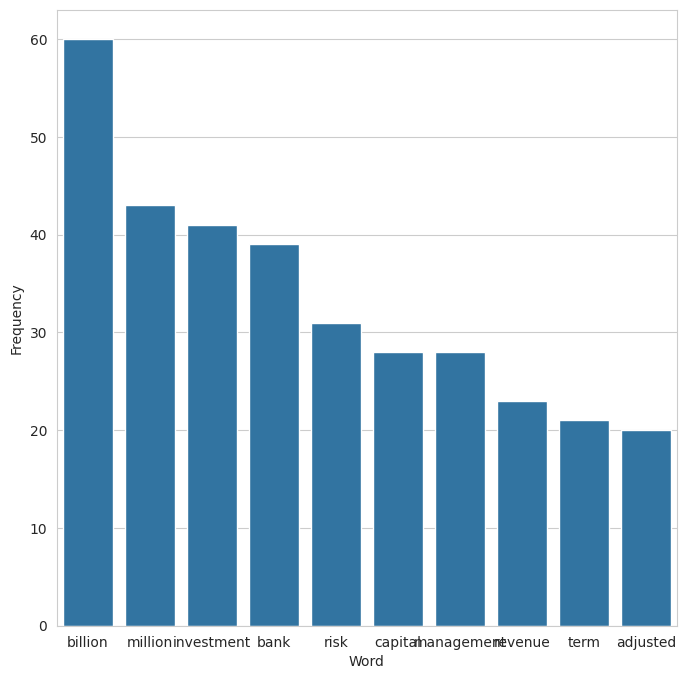

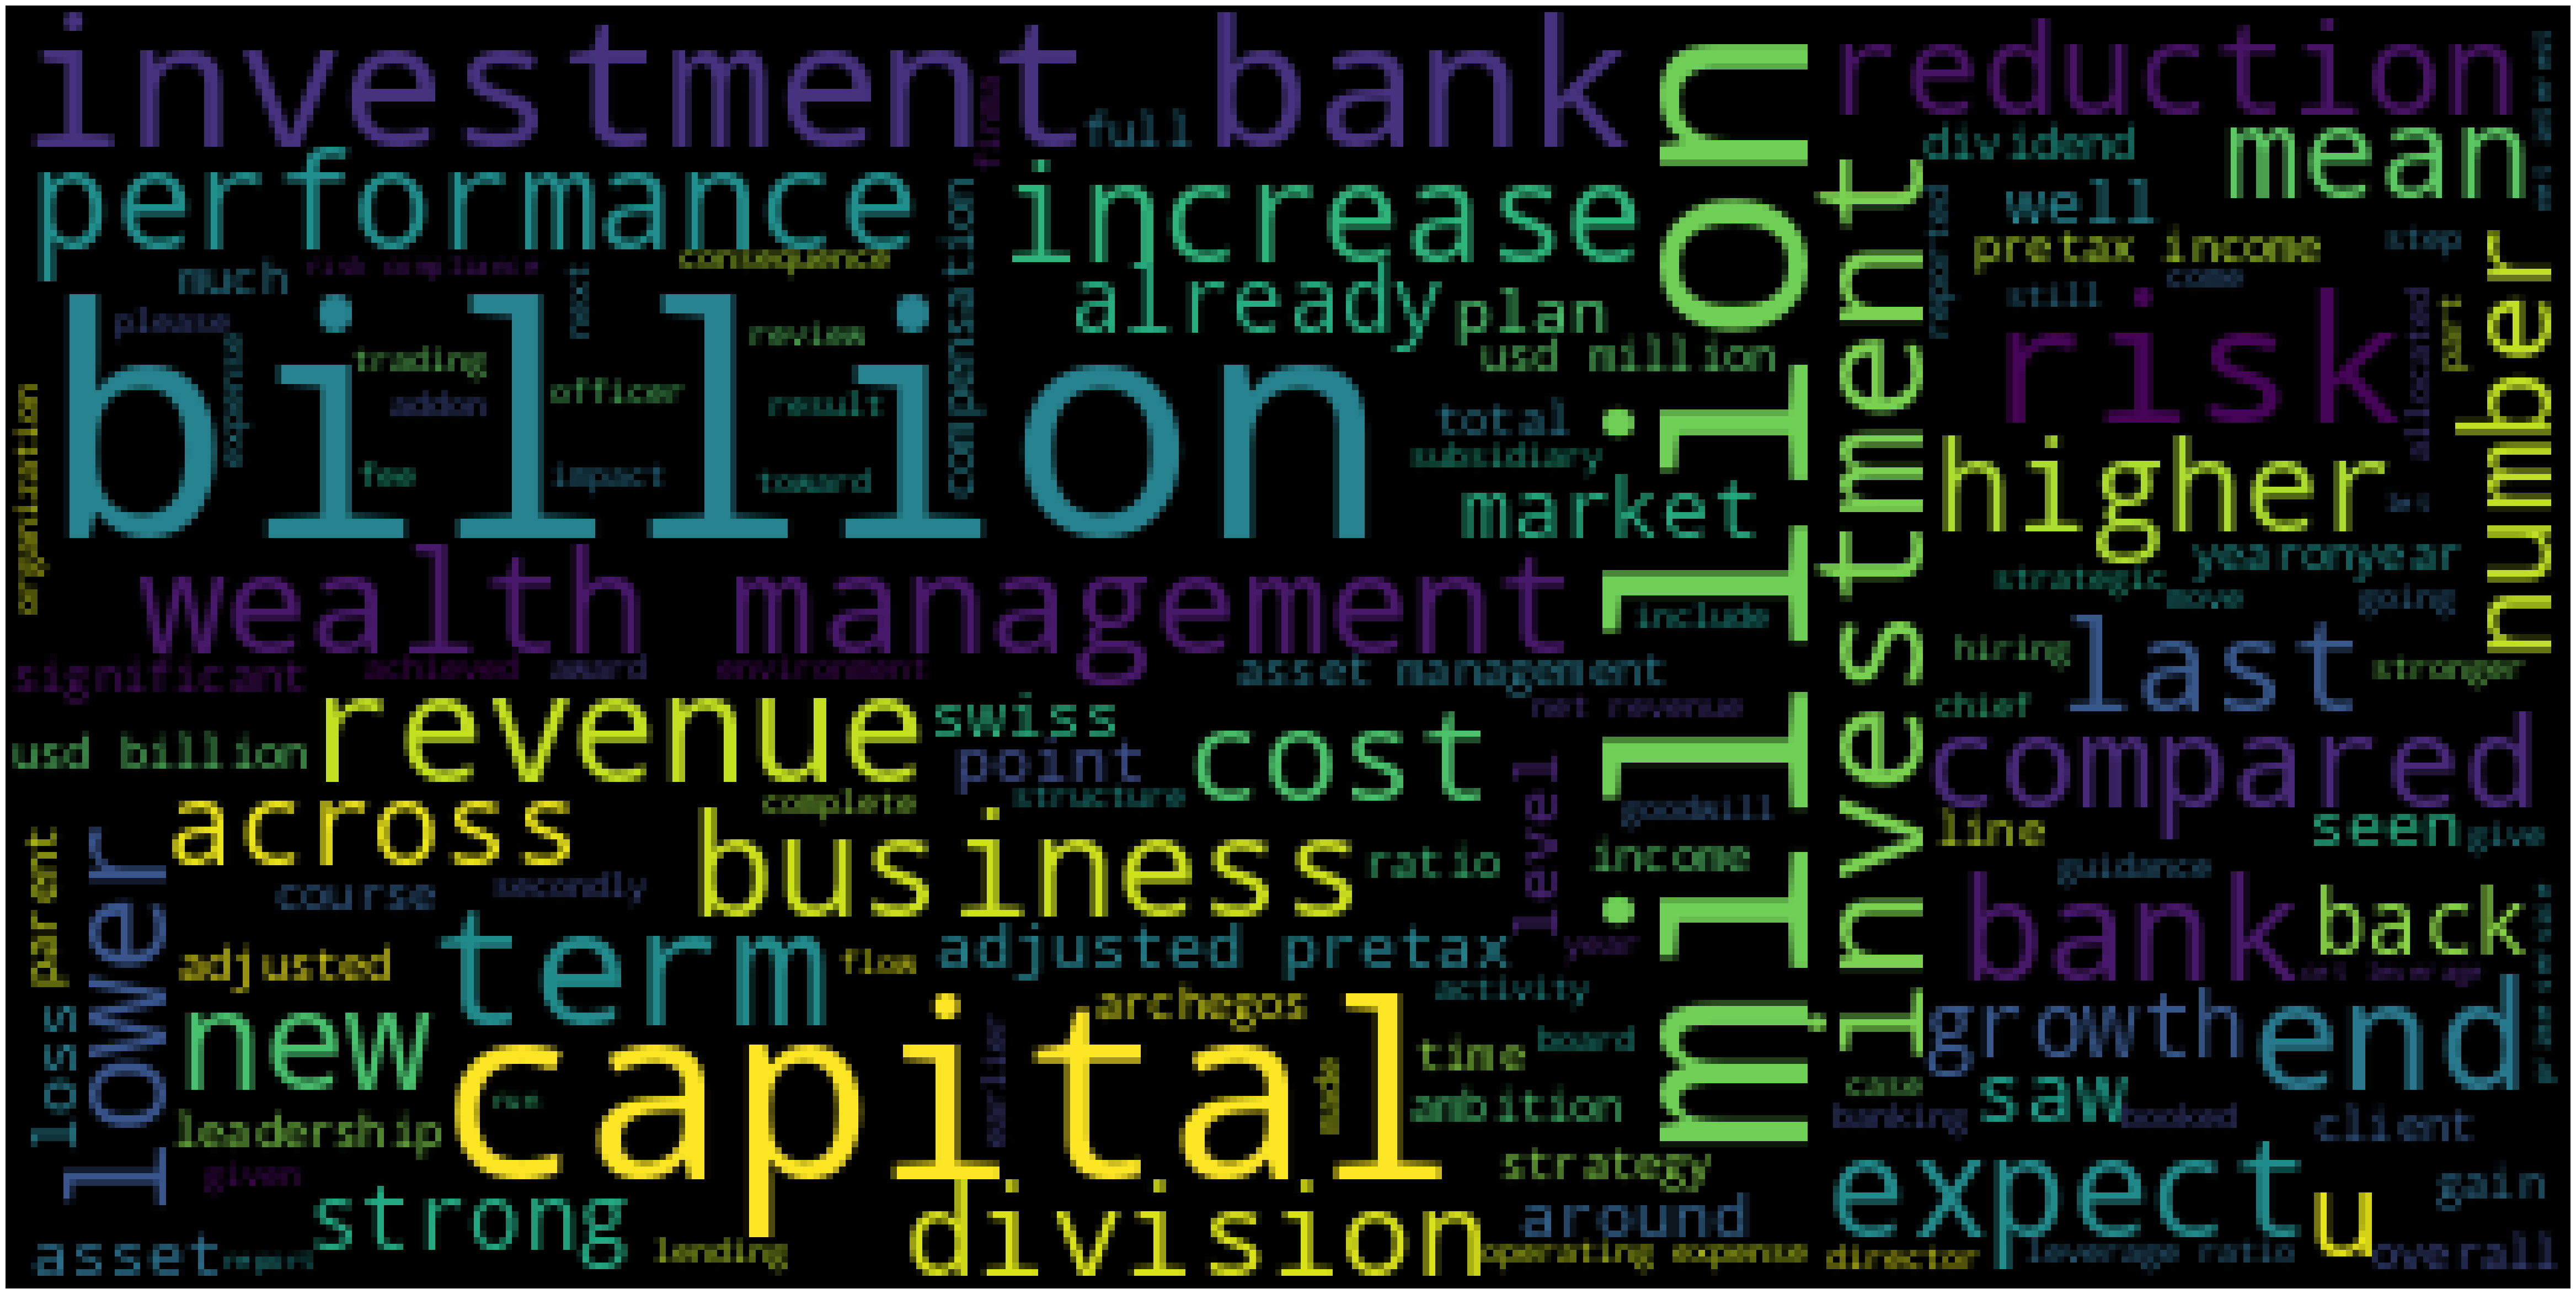

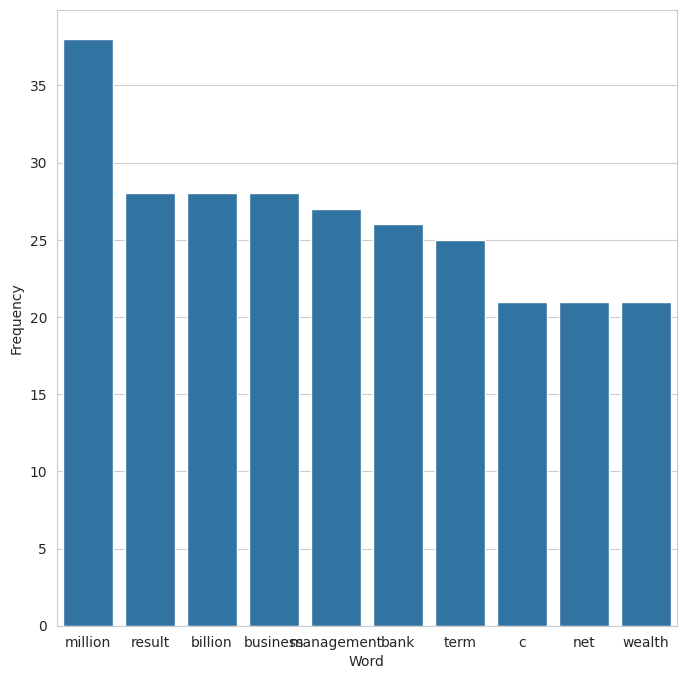

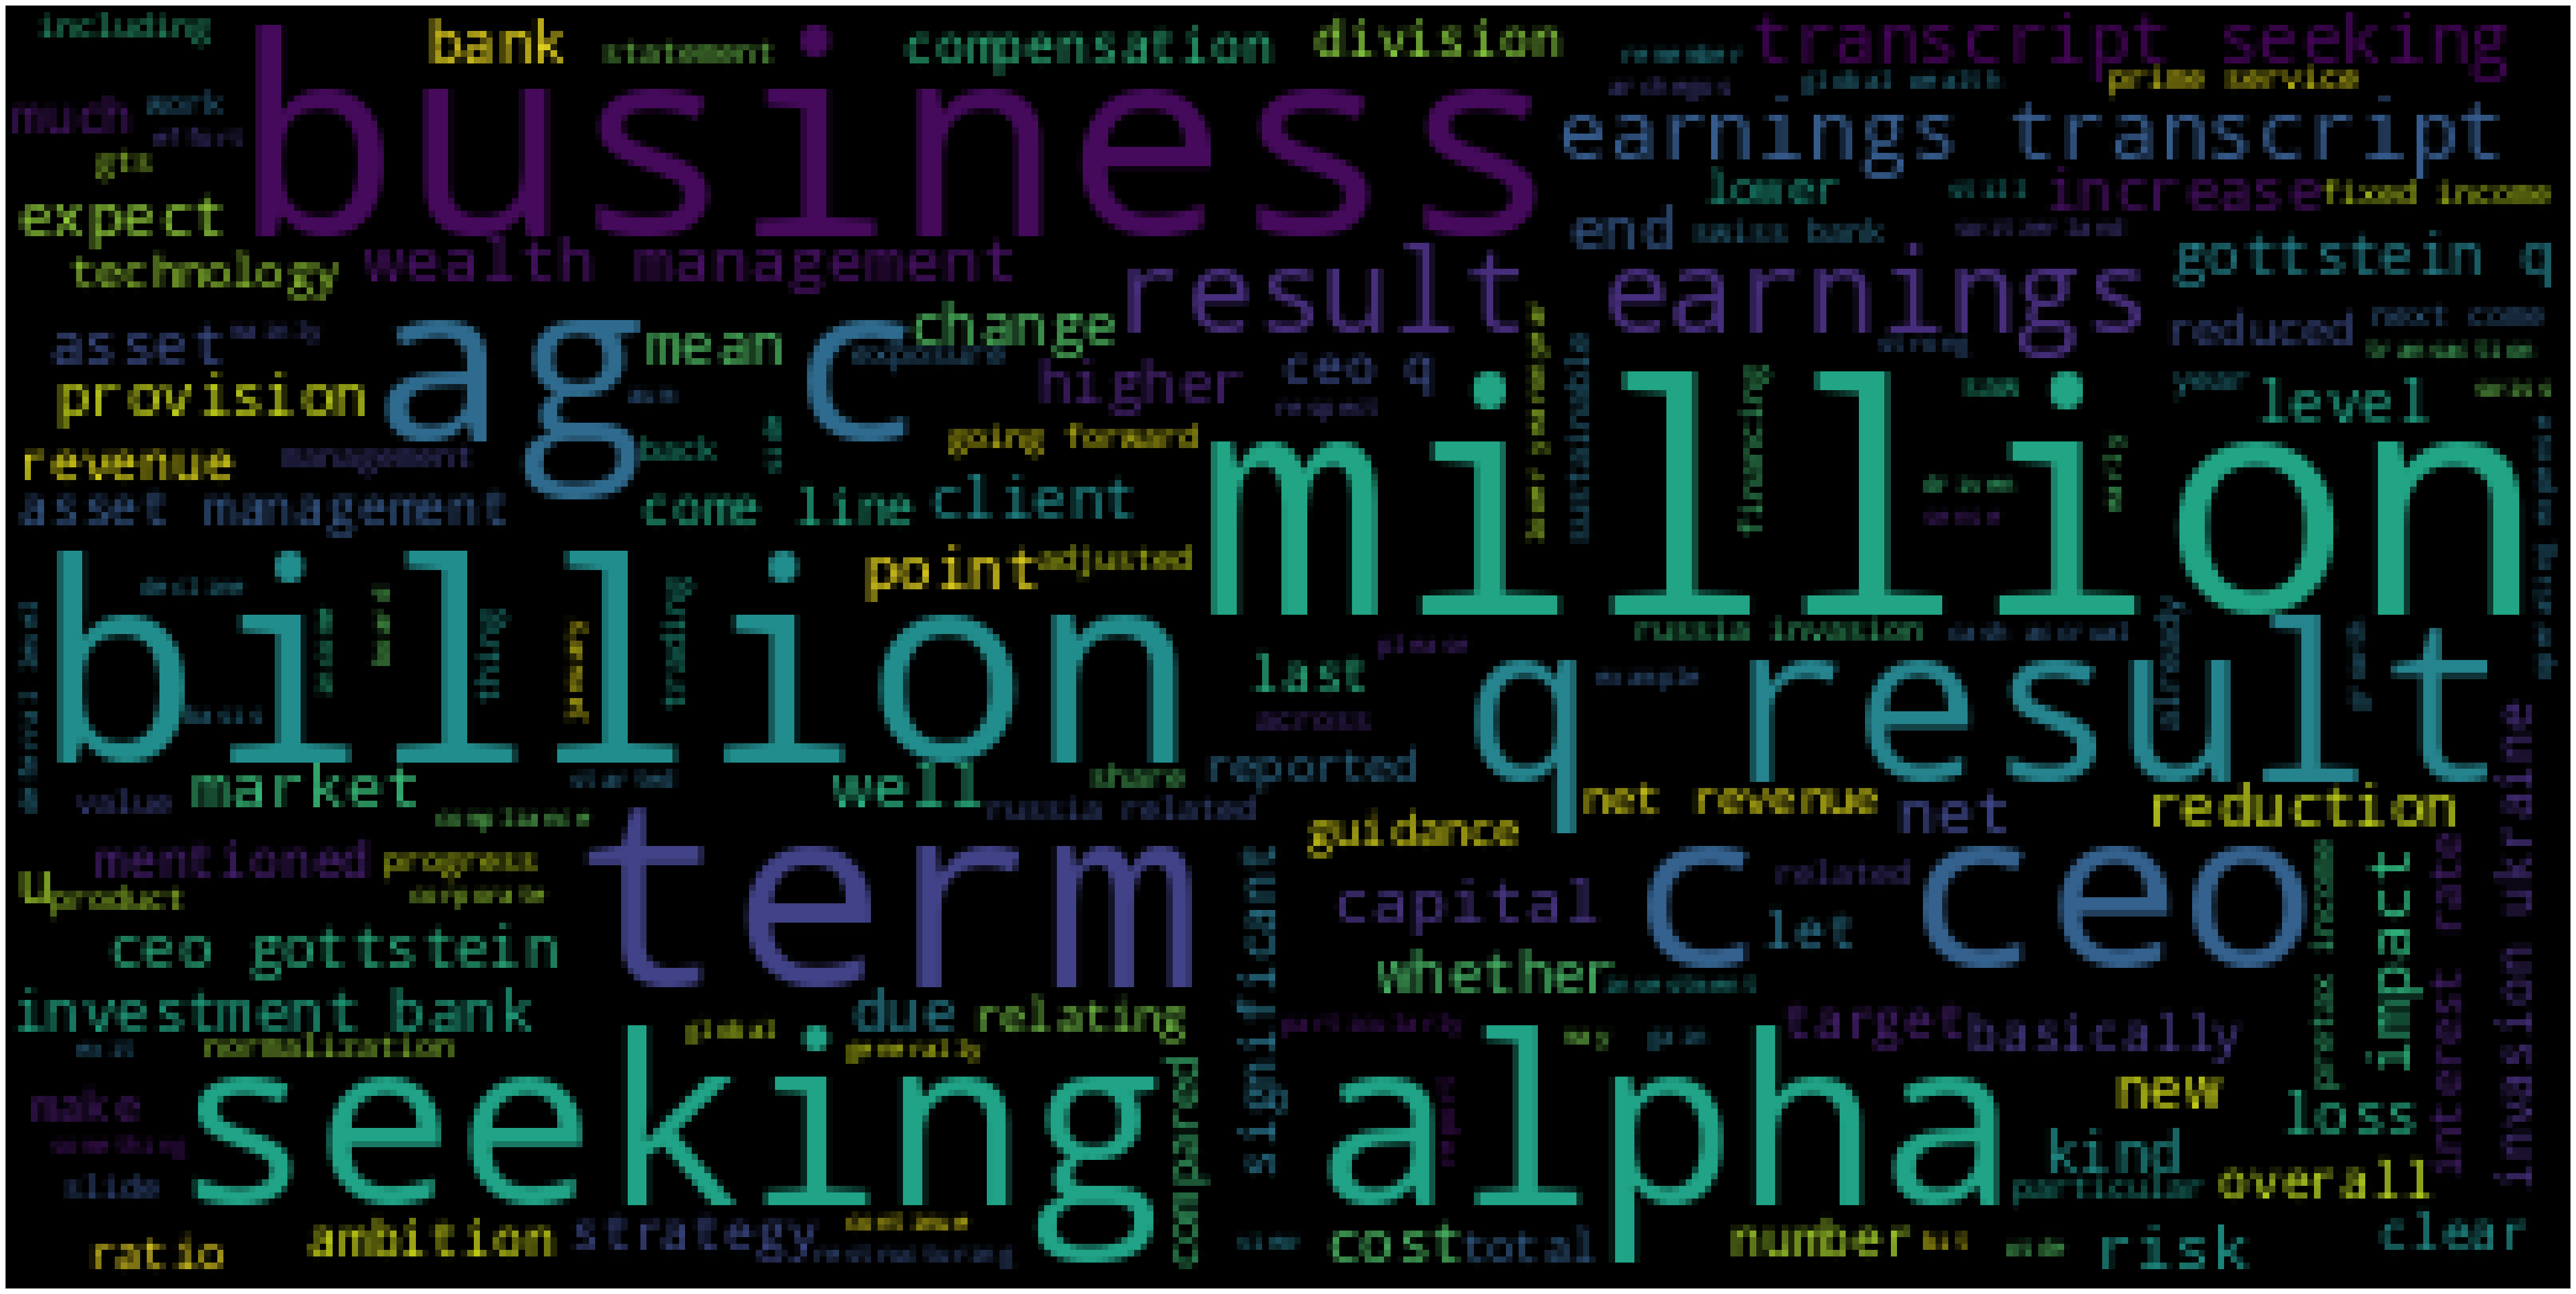

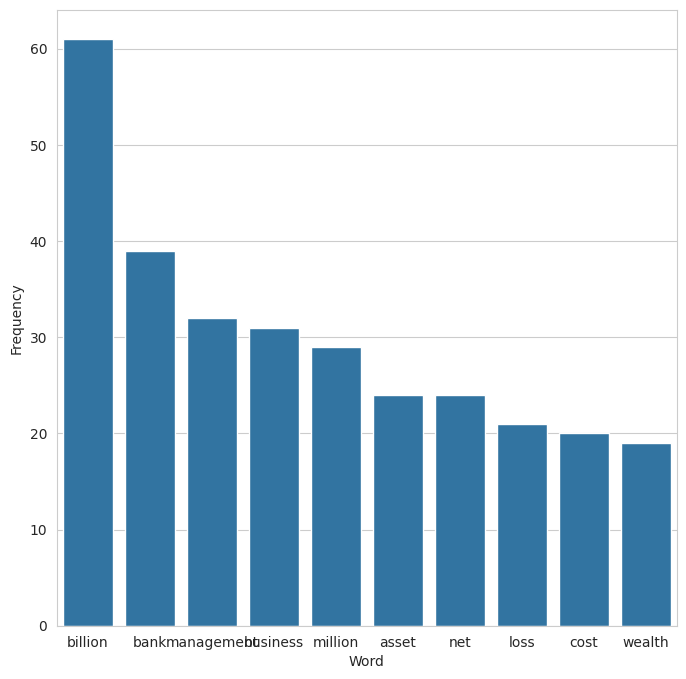

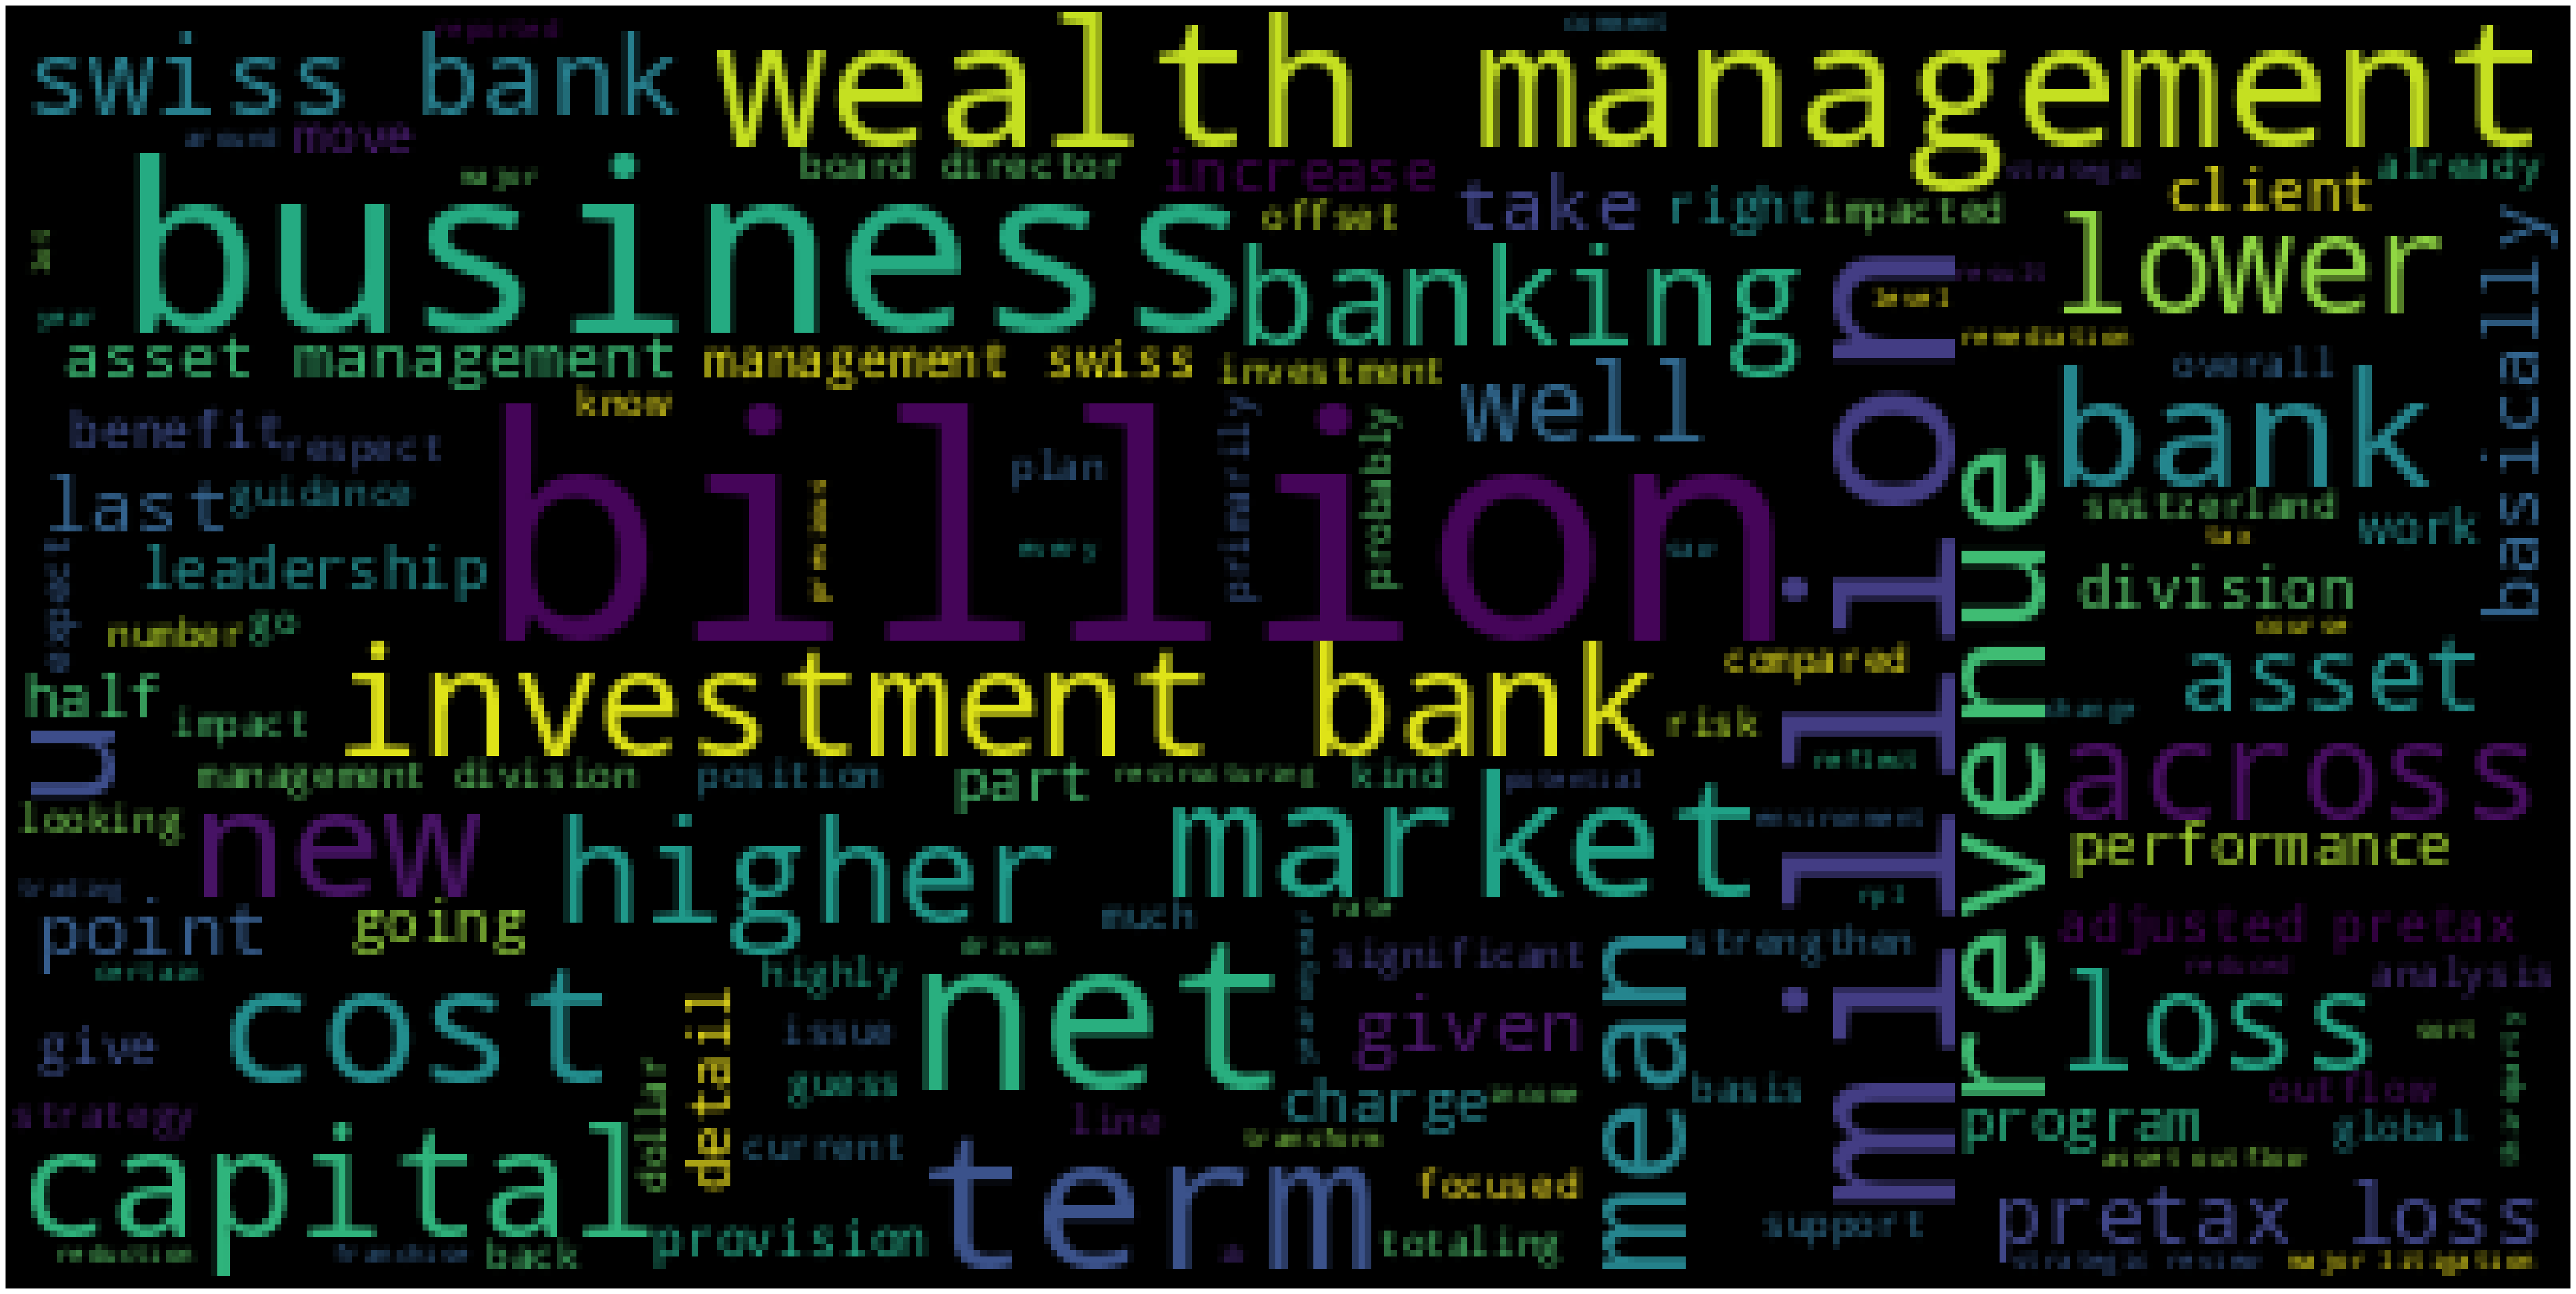

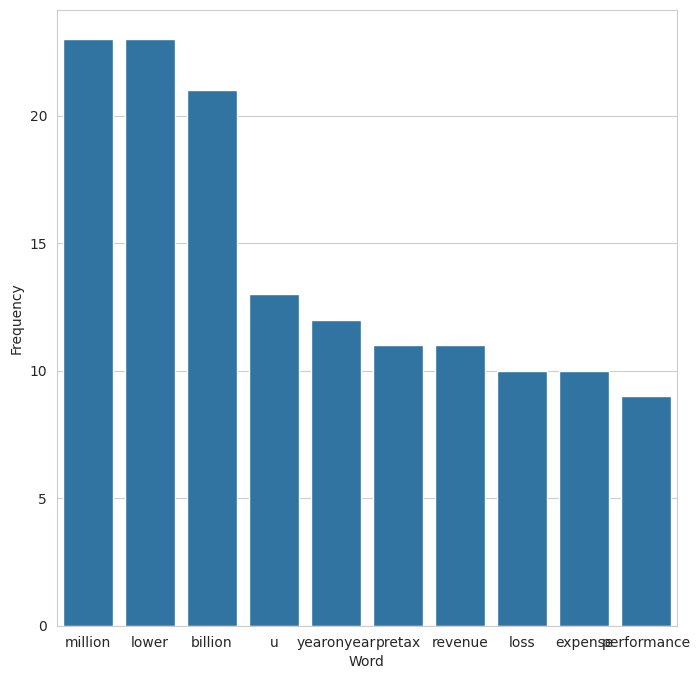

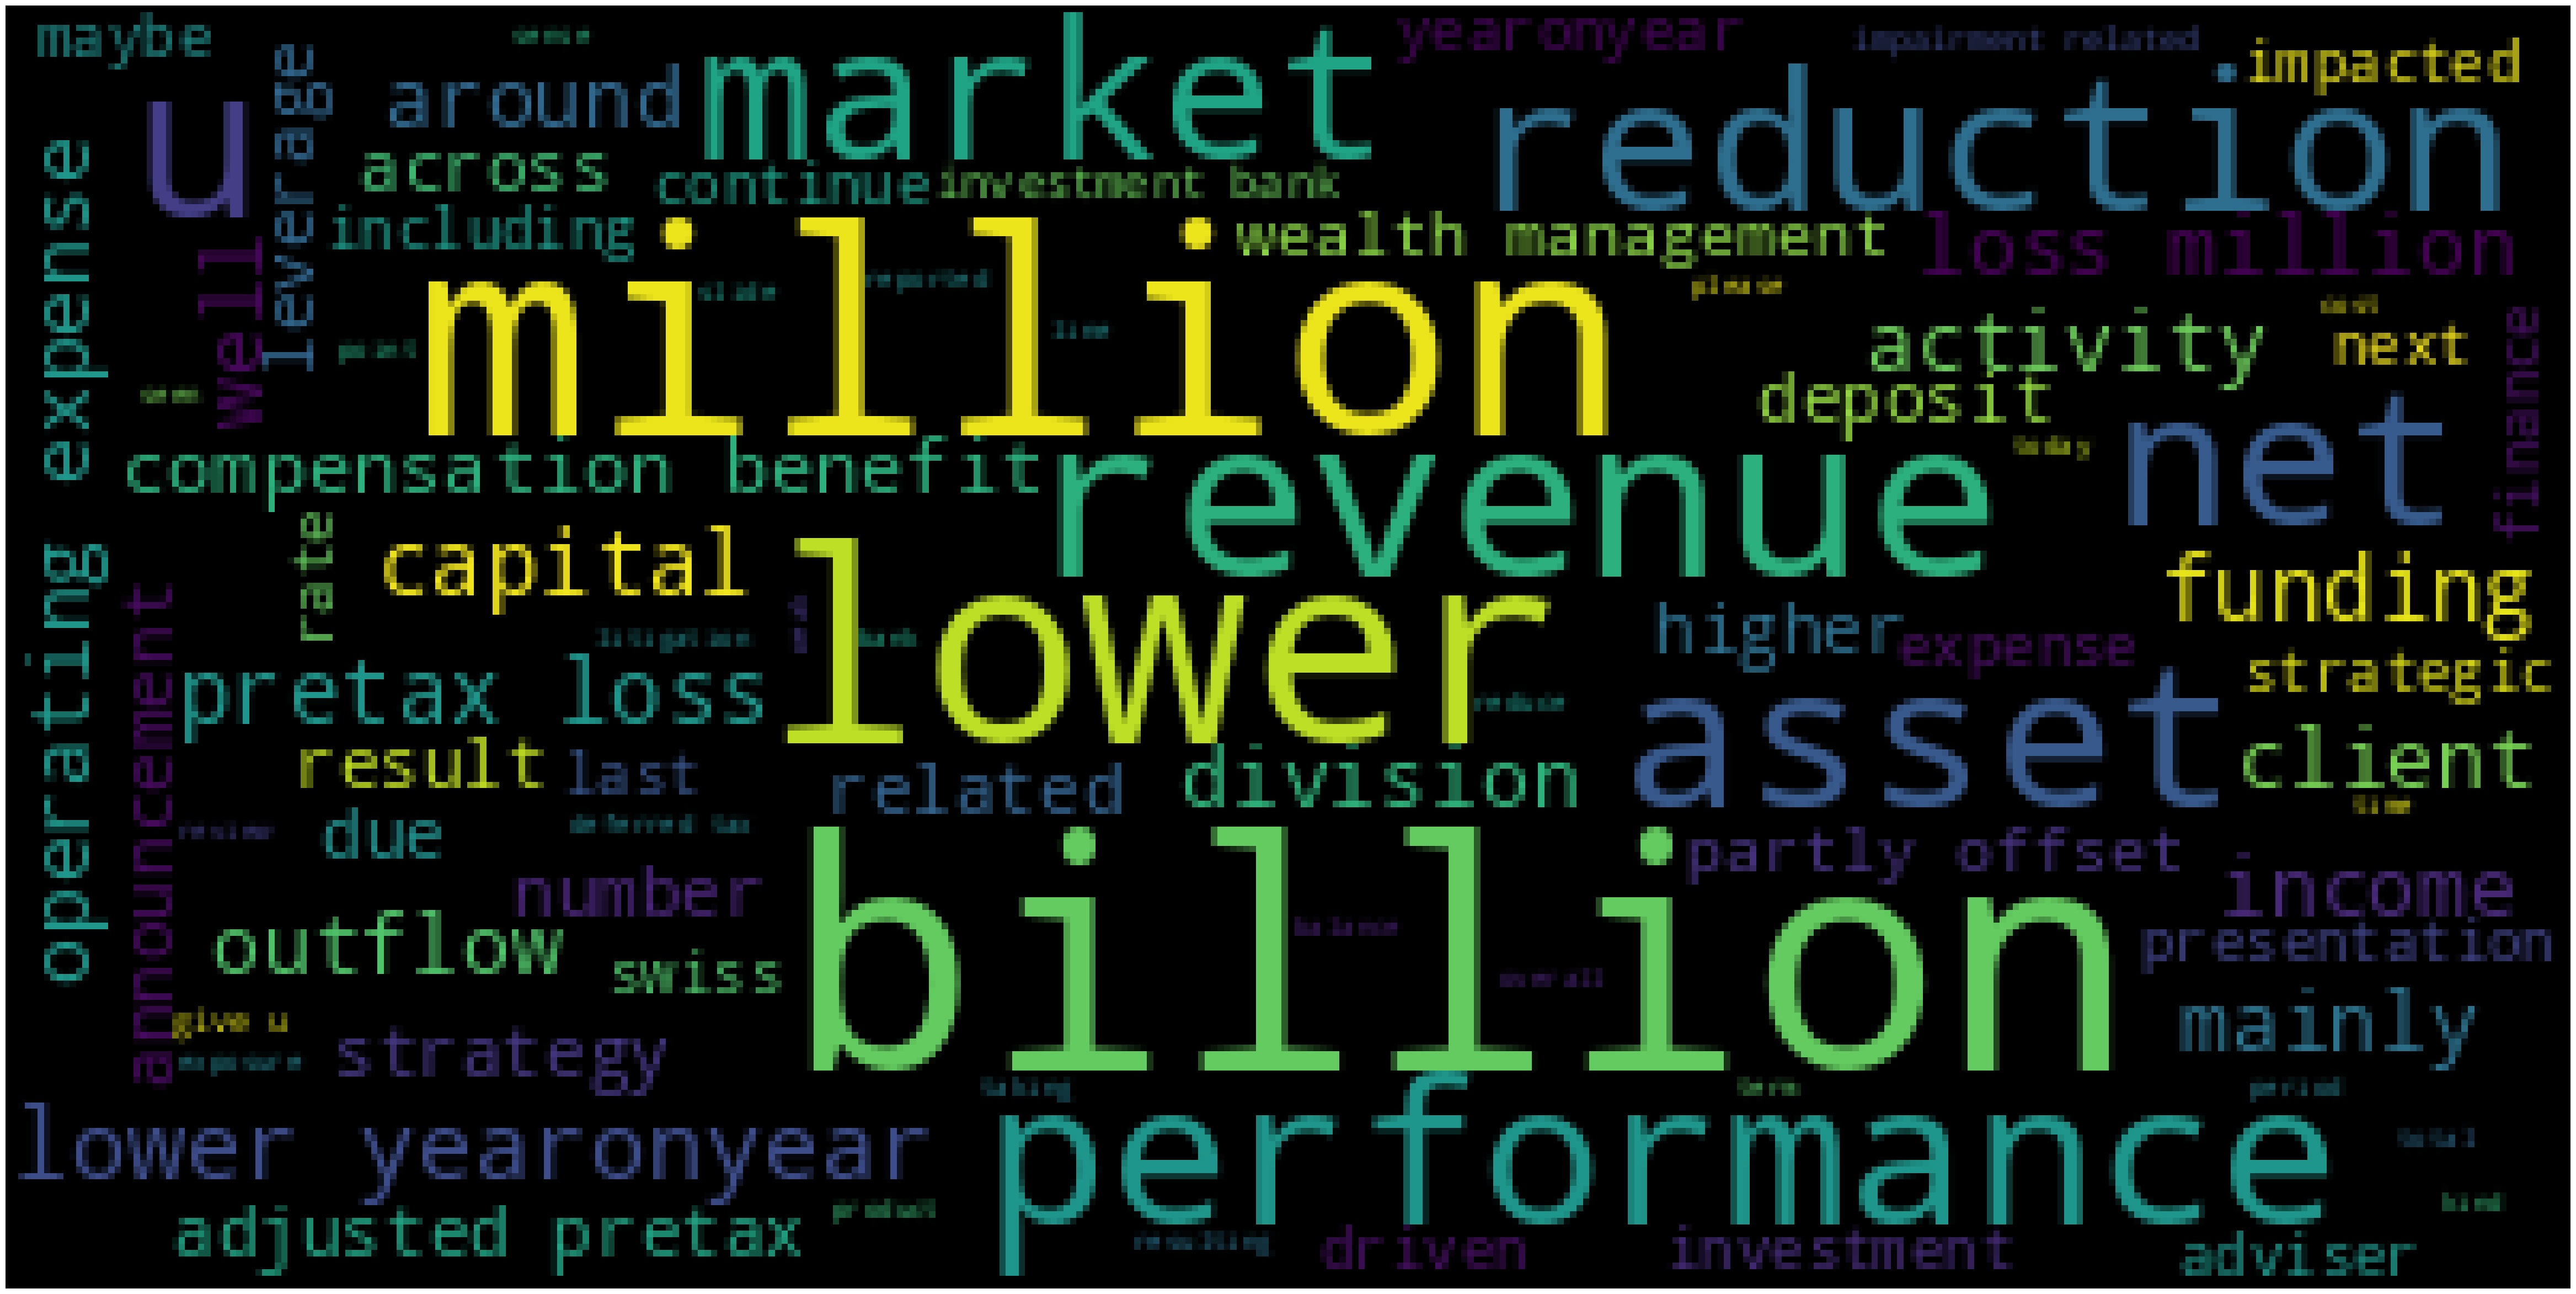

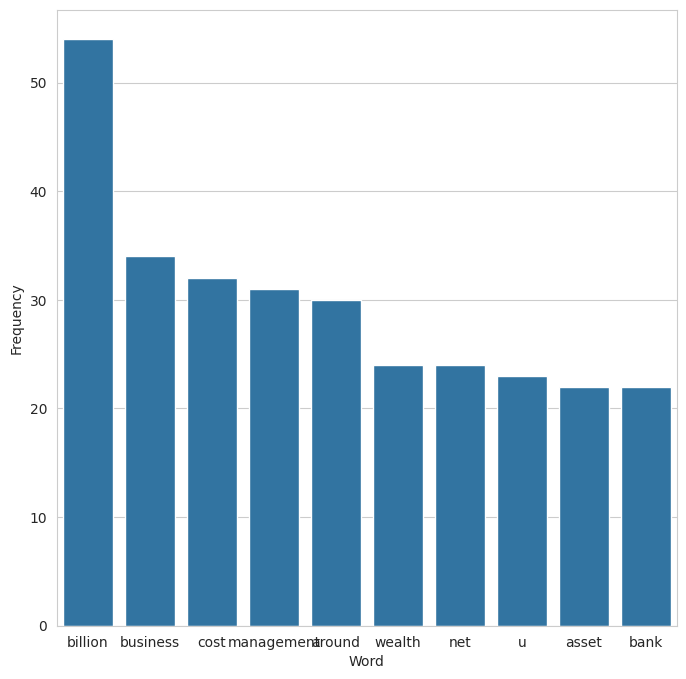

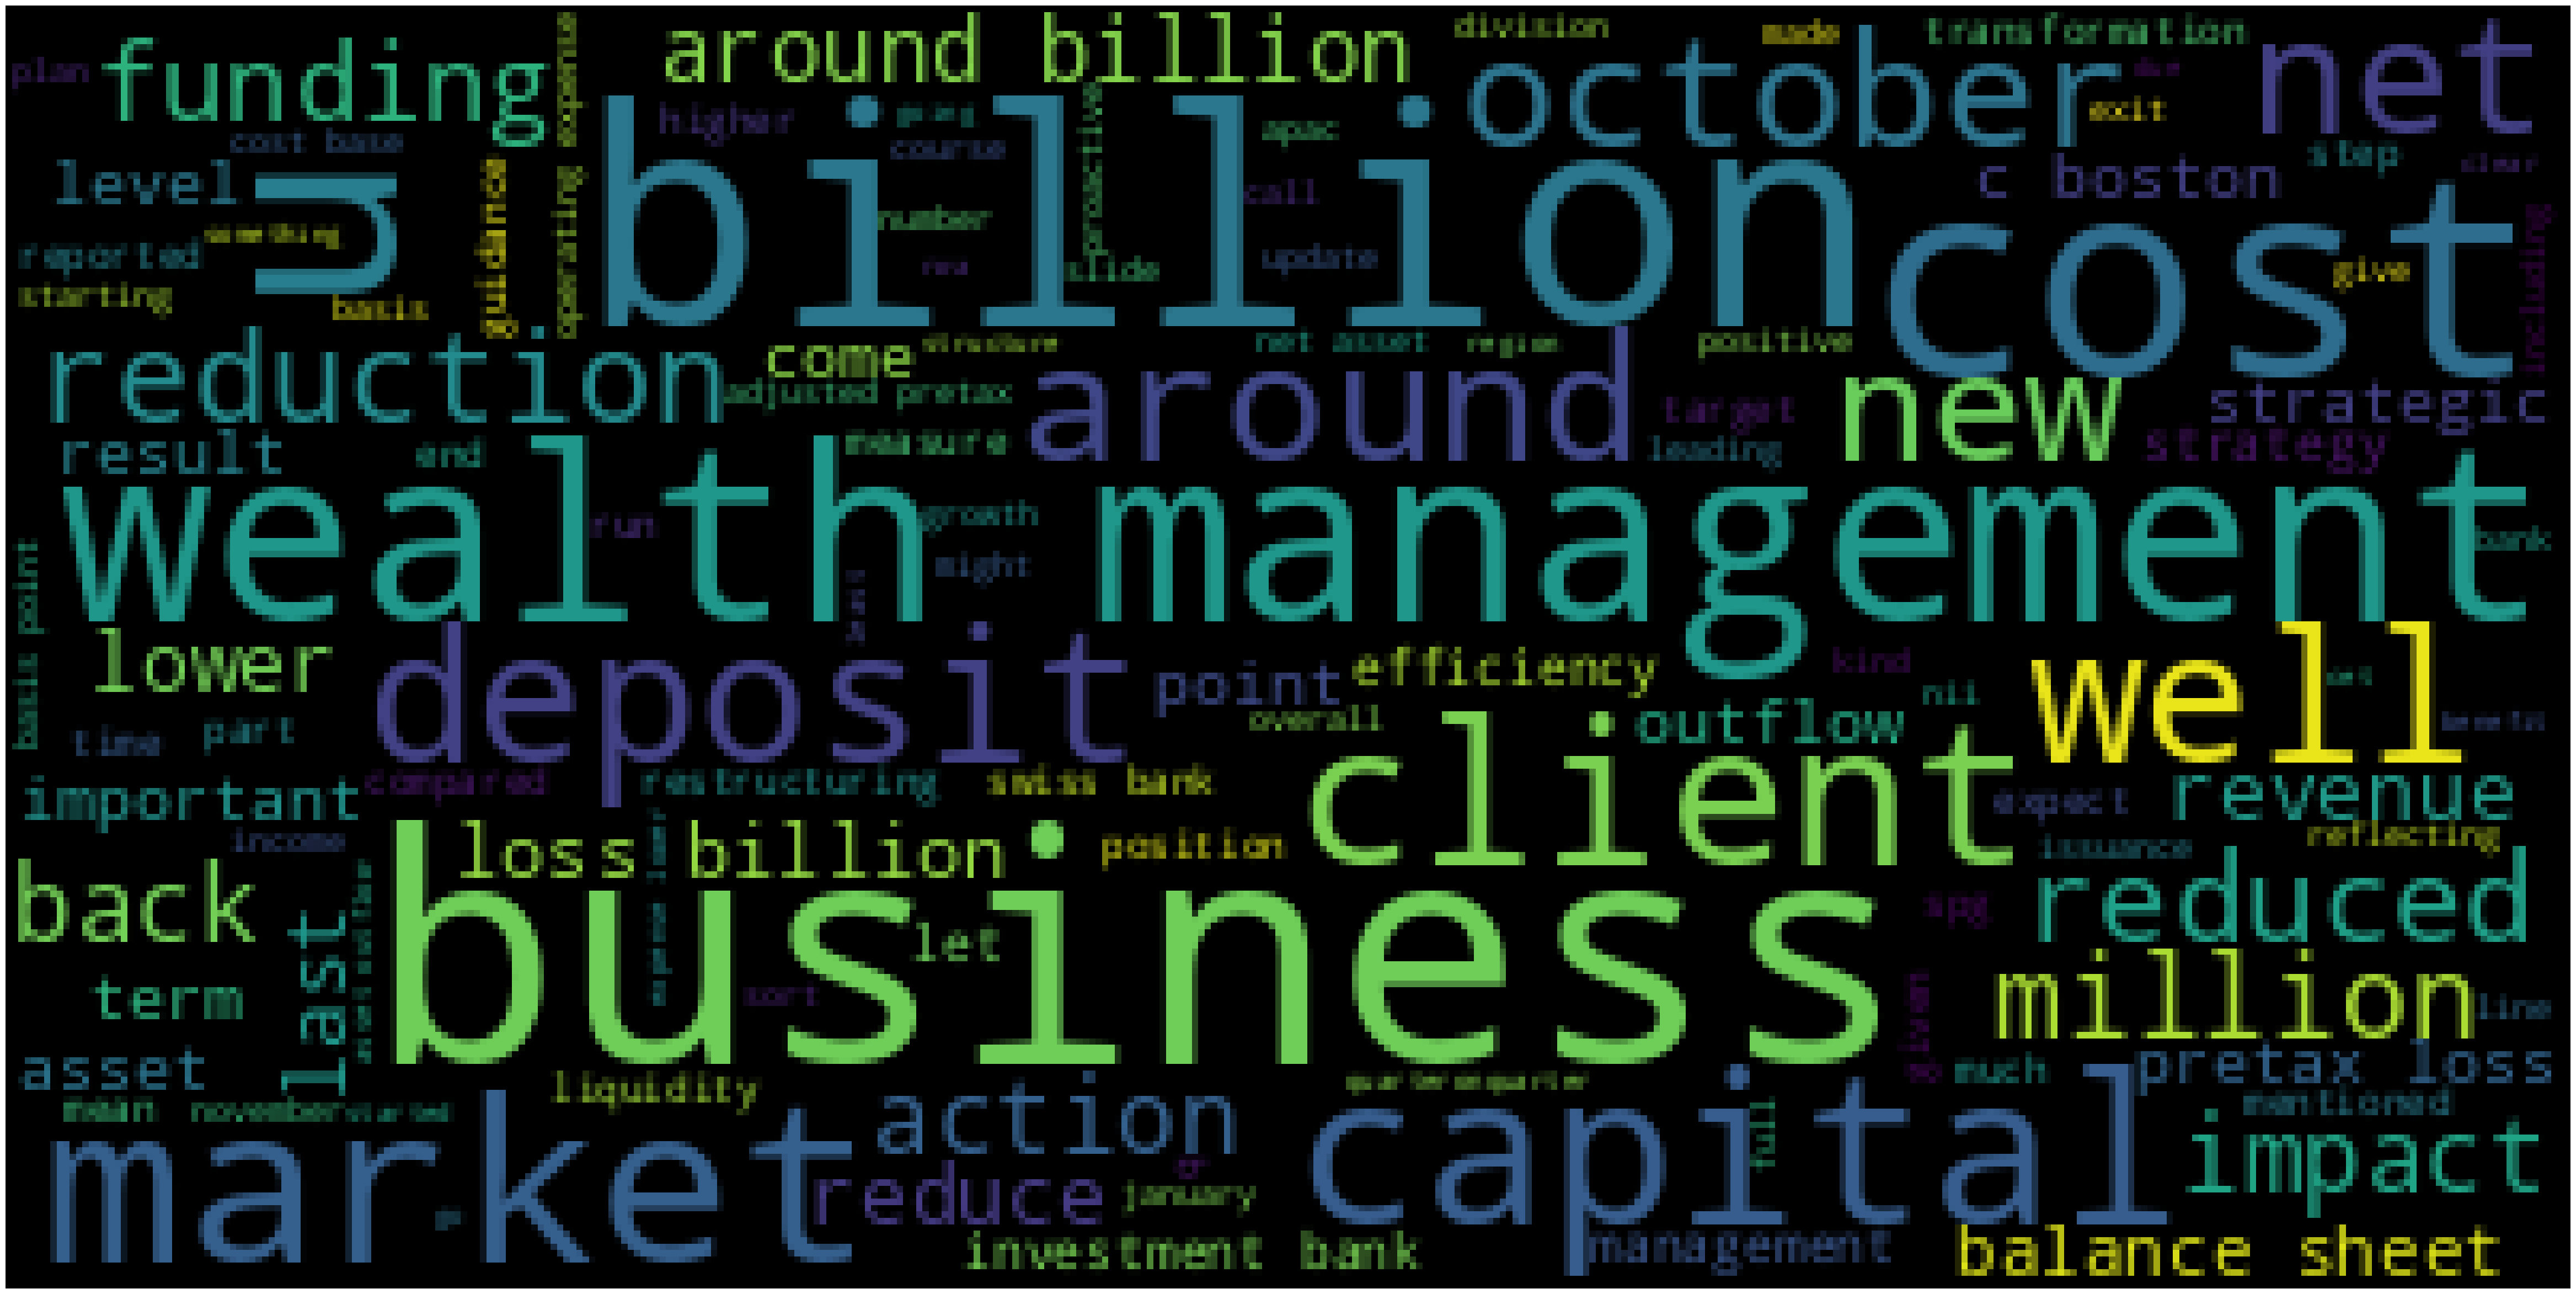

In [8]:
# word cloud for each quarter - Summarised transcript

for name, groups in transcript_grouped_df:
  word_cloud_display(groups, "Summarised_dialogue")

# BERTopic

In [9]:
# install BERTopic
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [10]:
# import pipeline and BERTopic
from transformers import pipeline
from bertopic import BERTopic

In [11]:
#define function to clean transcript text
def clean_transcript_text(text):
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)

    word_tokens = word_tokenize(text)

    for word in word_tokens:
      if ((word in stop_words) or word.isnumeric() or (word in excludes)):
        text = text.replace(" " + word + " ", " ")
      else:
        word_lemma = lemmatizer.lemmatize(word)
        text = text.replace(word, word_lemma)
    return text

#define function to clean transcript text
def clean_transcripts(transcripts_list):
  transcripts_list_clean = []
  for transcript in transcripts_list:
    if transcript is not None and transcript != "nan" and isinstance(transcript, str):
      transcript =  clean_transcript_text(transcript)
      transcripts_list_clean.append(transcript)

  return transcripts_list_clean

In [12]:
# instantiate BERTopic model and fit with transcript
def get_bertopic_model(section, dialogue_col="Dialogue"):
  transcript_answers_df = transcript_df.loc[(transcript_df['Text Type'] == "Answer")]
  if section:
    transcript_answers_df = transcript_answers_df.loc[(transcript_answers_df['Section'] == section)]
  transcript_answers_list = transcript_answers_df[dialogue_col].tolist()
  transcript_answers_list_clean = clean_transcripts(transcript_answers_list)

  model = BERTopic(verbose=False)
  topic, probabilities = model.fit_transform(transcript_answers_list_clean)

  return model

## Original Transcript

### BERTopic - Combined

In [13]:
# "" (empty) for combined dialogues
model = get_bertopic_model("")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
1      0    273
2      1     44
0      2     42
3      3     17
4     -1      1

In [15]:
model.get_topic(0)

[('billion', 0.03635368123124941),
 ('million', 0.032334004777987806),
 ('term', 0.029186822653408936),
 ('bank', 0.028421214671116444),
 ('management', 0.027582293539296268),
 ('capital', 0.02607726455158941),
 ('net', 0.02577032998996612),
 ('market', 0.025433519261684863),
 ('investment', 0.025417024111771026),
 ('revenue', 0.024340390584113664)]

In [16]:
model.get_topic(1)

[('thank', 0.5009811229674711),
 ('thanks', 0.4521123239556979),
 ('sorry', 0.3181964531123433),
 ('take', 0.29716913808708484),
 ('much', 0.25818505855466656),
 ('amit', 0.2553634154956241),
 ('andrew', 0.19387455010580795),
 ('hear', 0.16782191423520498),
 ('jeremy', 0.15171928711575475),
 ('stefan', 0.1443261842355277)]

In [17]:
model.visualize_barchart()

### BERTopic - Presentation

In [18]:
model = get_bertopic_model("Presentation")

In [19]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
1      0     29
0      1     21

In [20]:
model.visualize_barchart()

### BERTopic - Question-and-Answer

In [21]:
model = get_bertopic_model("Question-and-Answer")

In [22]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
0      0    254
1      1     73

In [23]:
model.visualize_barchart()

## Summarised Transcript

### BERTopic - Combined

In [24]:
# "" (empty) for combined dialogues
model = get_bertopic_model("", "Summarised_dialogue")

In [25]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
1      0    242
0      1     21
2      2     12

In [26]:
model.visualize_barchart()

### BERTopic - Presentation

In [27]:
model = get_bertopic_model("Presentation", "Summarised_dialogue")

In [28]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
1      0     29
0      1     19

In [29]:
model.visualize_barchart()

### BERTopic - Question-and-Answer

In [30]:
model = get_bertopic_model("Question-and-Answer", "Summarised_dialogue")

In [31]:
# Diplay top frequency topics
model.get_topic_freq().head(10)

Topic  Count
1      0    134
0     -1     81
2      1     12

In [32]:
model.visualize_barchart()

# Gensim - LDA

In [33]:
# Install Gensim
!pip install gensim nltk datasets pyLDAvis ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [50]:
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [51]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [93]:
# preprocess/clean the text
def preprocess(text):
    text = text.lower()
    # Remove special characters, digits, and extra whitespace
    text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation and word not in excludes]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [94]:
# load transcript from the csv file
transcript_df = load_transcript()

# get the appropriate section of the transcript
def get_transcripts(section):
  transcript_answers_df = transcript_df.loc[(transcript_df['Text Type'] == "Answer")]
  if section:
    transcript_answers_df = transcript_answers_df.loc[(transcript_answers_df['Section'] == section)]

  return transcript_answers_df

# Analyse each quarter
def get_topics_per_quarter(transcript_answers_df, dialogue_col="Dialogue"):

  transcript_answers_grouped_df = transcript_answers_df.groupby(by=["Year", "Quarter"])

  for name, groups in transcript_answers_grouped_df:
    lda_model = None
    documents = groups["Dialogue"].tolist()
    if len(documents) > 0:
      # Apply preprocessing
      processed_docs = [preprocess(doc) for doc in documents]

      # Create a dictionary representation of the documents
      dictionary = Dictionary(processed_docs)

      # Create a bag-of-words corpus
      corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

      #lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=45, random_state=24)
      lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            chunksize=2000,
            alpha='auto',
            eta='auto',
            iterations=400,
            num_topics=5,
            passes=30,
            eval_every=None
          )

      # Calculate the coherence score
      coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
      coherence_score = coherence_model_lda.get_coherence()

      print(f'Year: {groups["Year"].tolist()[0]}, Quarter: {groups["Quarter"].tolist()[0]}, Coherence Score: {coherence_score}, Perplexity: {lda_model.log_perplexity(corpus)}')

      for idx, topic in lda_model.print_topics(-1):
        print(f"Topic #{idx + 1}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Original Transcript

### Gensim - LDA - Combined

In [95]:
# "" (empty) for combined transcripts
transcript_answers_df = get_transcripts("")

documents = transcript_answers_df["Dialogue"].tolist()

# Apply preprocessing
processed_docs = [preprocess(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [96]:
# Detect bigrams in the corpus
bigram = Phrases(processed_docs, min_count=2, threshold=10)  # Adjust min_count and threshold as needed
bigram_mod = Phraser(bigram)

# Apply bigram model to documents
bigram_docs = [bigram_mod[doc] for doc in processed_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [97]:
# Create a dictionary representation of the documents
dictionary = gensim.corpora.Dictionary(bigram_docs)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in bigram_docs]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
# Grid search best hyperparameters for LDA model using coherence_score
def compute_coherence_values(dictionary, corpus, processed_docs, limit=10, start=5, step=1):
    coherence_values = []

    best_coherence_score = 0
    best_lda_model = None

    for num_topics in range(start, limit, step):
          # Train the LDA model
          lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            chunksize=2000,
            alpha='auto',
            eta='auto',
            iterations=400,
            num_topics=num_topics,
            passes=30,
            eval_every=None
          )

          # Calculate the coherence score
          coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
          coherence_score = coherence_model_lda.get_coherence()

          if coherence_score > best_coherence_score:
            best_coherence_score = coherence_score
            best_lda_model = lda_model

          coherence_values.append({"num_topics": num_topics,  "Coherence Score": coherence_score})

    return coherence_values, best_lda_model, best_coherence_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [100]:
coherence_values, lda_model, coherence_score = compute_coherence_values(dictionary, corpus, bigram_docs)

coherence_values_df = pd.DataFrame(coherence_values)

# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
print('Coherence Score: ', coherence_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Perplexity:  -7.5542969873035855
Coherence Score:  0.37811838675422405


In [101]:
# Print the topics and their words
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic #{idx + 1}: {topic}")

Topic #1: 0.016*"billion" + 0.015*"million" + 0.006*"investment_bank" + 0.005*"wealth_management" + 0.005*"increase" + 0.005*"higher" + 0.005*"business" + 0.005*"revenues" + 0.005*"well" + 0.005*"bank"
Topic #2: 0.012*"terms" + 0.012*"well" + 0.008*"thats" + 0.007*"much" + 0.005*"around" + 0.005*"billion" + 0.005*"basically" + 0.005*"course" + 0.005*"business" + 0.005*"weve"
Topic #3: 0.016*"business" + 0.015*"well" + 0.007*"bank" + 0.006*"thats" + 0.005*"capital" + 0.005*"right" + 0.005*"terms" + 0.005*"weve" + 0.005*"clear" + 0.005*"around"
Topic #4: 0.021*"terms" + 0.014*"thats" + 0.013*"point" + 0.009*"well" + 0.008*"billion" + 0.008*"basically" + 0.008*"mean" + 0.006*"capital" + 0.006*"much" + 0.006*"million"
Topic #5: 0.011*"business" + 0.007*"strong" + 0.006*"asia" + 0.006*"terms" + 0.006*"clients" + 0.006*"switzerland" + 0.005*"thats" + 0.005*"well" + 0.005*"example" + 0.005*"side"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [102]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualisation.
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Gensim - LDA - Combined - per quarter

In [78]:
# "" (empty) for combined transcripts
transcript_answers_df = get_transcripts("")
get_topics_per_quarter(transcript_answers_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.43368839484889427, Perplexity: -6.8651696192683955
Topic #1: 0.020*"’" + 0.013*"chf" + 0.013*"actually" + 0.011*"quarter" + 0.011*"think" + 0.010*"million" + 0.008*"first" + 0.007*"second" + 0.007*"see" + 0.006*"mean"
Topic #2: 0.027*"’" + 0.013*"chf" + 0.011*"million" + 0.010*"actually" + 0.010*"think" + 0.009*"–" + 0.009*"corporate" + 0.009*"center" + 0.007*"quarter" + 0.007*"also"
Topic #3: 0.024*"quarter" + 0.021*"’" + 0.018*"chf" + 0.013*"second" + 0.012*"credit" + 0.012*"first" + 0.011*"million" + 0.010*"revenues" + 0.010*"billion" + 0.008*"increase"
Topic #4: 0.010*"global" + 0.010*"investment" + 0.009*"markets" + 0.008*"clients" + 0.008*"banking" + 0.007*"growth" + 0.007*"quarter" + 0.007*"capital" + 0.007*"strong" + 0.007*"also"
Topic #5: 0.047*"’" + 0.031*"think" + 0.015*"actually" + 0.012*"business" + 0.012*"terms" + 0.012*"see" + 0.008*"second" + 0.008*"quarter" + 0.007*"clearly" + 0.007*"question"
Year: 2020, Quarter: Q3, Coheren

### Gensim - LDA - Presentation - per quarter

In [ ]:
transcript_answers_df = get_transcripts("Presentation")
get_topics_per_quarter(transcript_answers_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.33526131577353163, Perplexity: -6.723307937240685
Topic #1: 0.017*"revenue" + 0.016*"million" + 0.014*"market" + 0.013*"billion" + 0.011*"increase" + 0.011*"net" + 0.009*"increased" + 0.008*"end" + 0.008*"loss" + 0.008*"income"
Topic #2: 0.001*"market" + 0.001*"global" + 0.001*"client" + 0.001*"investment" + 0.001*"business" + 0.001*"revenue" + 0.001*"sustainability" + 0.001*"income" + 0.001*"solution" + 0.001*"billion"
Topic #3: 0.001*"answer" + 0.001*"part" + 0.001*"operator" + 0.001*"open" + 0.001*"conference" + 0.001*"line" + 0.001*"please" + 0.001*"let" + 0.001*"statement" + 0.001*"end"
Topic #4: 0.016*"market" + 0.012*"investment" + 0.011*"global" + 0.010*"client" + 0.009*"solution" + 0.008*"slide" + 0.007*"business" + 0.007*"banking" + 0.007*"growth" + 0.007*"sustainability"
Topic #5: 0.010*"answer" + 0.005*"let" + 0.005*"part" + 0.005*"please" + 0.005*"line" + 0.005*"conference" + 0.005*"session" + 0.005*"operator" + 0.005*"open" + 0.

Year: 2020, Quarter: Q4, Coherence Score: 0.45518633353132215, Perplexity: -6.655007209561849
Topic #1: 0.024*"million" + 0.019*"billion" + 0.017*"net" + 0.013*"adjusted" + 0.013*"higher" + 0.012*"revenue" + 0.012*"income" + 0.011*"significant" + 0.010*"provision" + 0.010*"item"
Topic #2: 0.001*"million" + 0.001*"billion" + 0.001*"higher" + 0.001*"net" + 0.001*"income" + 0.001*"adjusted" + 0.001*"significant" + 0.001*"revenue" + 0.001*"provision" + 0.001*"item"
Topic #3: 0.001*"million" + 0.001*"net" + 0.001*"higher" + 0.001*"billion" + 0.001*"adjusted" + 0.001*"revenue" + 0.001*"provision" + 0.001*"significant" + 0.001*"item" + 0.001*"excluding"
Topic #4: 0.012*"let" + 0.012*"financial" + 0.012*"statement" + 0.008*"remind" + 0.008*"published" + 0.008*"answer" + 0.008*"operator" + 0.005*"slide" + 0.005*"please" + 0.005*"around"
Topic #5: 0.017*"growth" + 0.016*"management" + 0.012*"wealth" + 0.011*"investment" + 0.011*"bank" + 0.011*"client" + 0.010*"business" + 0.010*"capital" + 0.010

Year: 2021, Quarter: Q4, Coherence Score: 0.4211687404349349, Perplexity: -6.570117262040617
Topic #1: 0.001*"million" + 0.001*"billion" + 0.001*"adjusted" + 0.001*"higher" + 0.001*"lower" + 0.001*"business" + 0.001*"revenue" + 0.001*"cost" + 0.001*"pretax" + 0.001*"expense"
Topic #2: 0.026*"billion" + 0.023*"million" + 0.013*"adjusted" + 0.011*"revenue" + 0.009*"investment" + 0.009*"cost" + 0.009*"lower" + 0.009*"higher" + 0.009*"business" + 0.008*"income"
Topic #3: 0.001*"management" + 0.001*"risk" + 0.001*"bank" + 0.001*"capital" + 0.001*"investment" + 0.001*"slide" + 0.001*"strategy" + 0.001*"wealth" + 0.001*"please" + 0.001*"growth"
Topic #4: 0.017*"bank" + 0.017*"management" + 0.013*"investment" + 0.012*"strategy" + 0.012*"risk" + 0.011*"wealth" + 0.011*"capital" + 0.009*"growth" + 0.009*"next" + 0.009*"slide"
Topic #5: 0.001*"management" + 0.001*"bank" + 0.001*"wealth" + 0.001*"investment" + 0.001*"slide" + 0.001*"risk" + 0.001*"capital" + 0.001*"growth" + 0.001*"please" + 0.001

Year: 2022, Quarter: Q1, Coherence Score: 0.2886859477537633, Perplexity: -6.677285915330019
Topic #1: 0.001*"please" + 0.001*"c" + 0.001*"strategy" + 0.001*"conference" + 0.001*"kinner" + 0.001*"seeking" + 0.001*"investor" + 0.001*"billion" + 0.001*"report" + 0.001*"slide"
Topic #2: 0.013*"financial" + 0.013*"statement" + 0.009*"let" + 0.009*"remind" + 0.009*"published" + 0.005*"result" + 0.005*"slide" + 0.005*"ceo" + 0.005*"earnings" + 0.005*"number"
Topic #3: 0.026*"million" + 0.013*"billion" + 0.010*"investment" + 0.009*"loss" + 0.009*"net" + 0.009*"increase" + 0.009*"risk" + 0.009*"bank" + 0.009*"russia" + 0.009*"lower"
Topic #4: 0.008*"risk" + 0.008*"strategy" + 0.008*"growth" + 0.005*"investment" + 0.005*"let" + 0.005*"client" + 0.005*"division" + 0.005*"new" + 0.005*"turn" + 0.005*"compliance"
Topic #5: 0.013*"market" + 0.012*"management" + 0.011*"result" + 0.009*"investment" + 0.009*"bank" + 0.009*"slide" + 0.008*"net" + 0.008*"risk" + 0.008*"billion" + 0.008*"strategy"
Year: 

### Gensim - LDA - Question-and-Answer - per quarter

In [ ]:
transcript_answers_df = get_transcripts("Question-and-Answer")
get_topics_per_quarter(transcript_answers_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.4354754716866407, Perplexity: -6.569525073937951
Topic #1: 0.019*"investment" + 0.019*"banking" + 0.015*"business" + 0.012*"private" + 0.010*"strong" + 0.010*"u" + 0.010*"bank" + 0.008*"model" + 0.008*"clear" + 0.008*"perspective"
Topic #2: 0.020*"million" + 0.018*"term" + 0.016*"cost" + 0.013*"number" + 0.012*"corporate" + 0.011*"point" + 0.009*"mean" + 0.009*"basically" + 0.008*"billion" + 0.008*"back"
Topic #3: 0.016*"dollar" + 0.016*"apac" + 0.012*"mean" + 0.009*"linked" + 0.009*"swiss" + 0.009*"remind" + 0.009*"pb" + 0.009*"franc" + 0.009*"currency" + 0.009*"pressure"
Topic #4: 0.027*"business" + 0.020*"market" + 0.013*"global" + 0.011*"want" + 0.010*"much" + 0.010*"capital" + 0.008*"u" + 0.008*"growth" + 0.008*"banking" + 0.008*"strong"
Topic #5: 0.017*"term" + 0.014*"point" + 0.013*"number" + 0.011*"billion" + 0.009*"cost" + 0.008*"well" + 0.008*"generally" + 0.008*"conservative" + 0.008*"rwa" + 0.008*"volatility"
Year: 2020, Quarter: 

## Summarised Transcript

### Gensim - LDA - Combined - per quarter

In [79]:
transcript_answers_df = get_transcripts("")
get_topics_per_quarter(transcript_answers_df, "Summarised_dialogue")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.4059201916334594, Perplexity: -6.972537699472548
Topic #1: 0.010*"see" + 0.007*"six" + 0.006*"strong" + 0.006*"areas" + 0.006*"400" + 0.005*"months" + 0.005*"markets" + 0.005*"’" + 0.005*"cost" + 0.004*"driven"
Topic #2: 0.017*"quarter" + 0.014*"’" + 0.014*"chf" + 0.010*"second" + 0.009*"first" + 0.009*"credit" + 0.008*"million" + 0.008*"revenues" + 0.007*"billion" + 0.007*"markets"
Topic #3: 0.008*"growth" + 0.008*"investments" + 0.005*"efforts" + 0.005*"self-funding" + 0.005*"think" + 0.003*"sustainability" + 0.003*"banking" + 0.003*"globally" + 0.003*"significant" + 0.003*"digitalization"
Topic #4: 0.020*"’" + 0.010*"capital" + 0.009*"banking" + 0.008*"investment" + 0.008*"think" + 0.007*"also" + 0.007*"business" + 0.007*"chf" + 0.007*"center" + 0.006*"corporate"
Topic #5: 0.046*"’" + 0.030*"think" + 0.019*"actually" + 0.013*"terms" + 0.012*"quarter" + 0.011*"see" + 0.010*"business" + 0.010*"second" + 0.009*"chf" + 0.008*"–"
Year: 2020, Qu

### Gensim - LDA - Presentation - per quarter

In [ ]:
transcript_answers_df = get_transcripts("Presentation")
get_topics_per_quarter(transcript_answers_df, "Summarised_dialogue")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.3891110034744103, Perplexity: -6.72203172847073
Topic #1: 0.016*"revenue" + 0.016*"million" + 0.014*"market" + 0.013*"billion" + 0.011*"increase" + 0.011*"net" + 0.009*"increased" + 0.008*"end" + 0.008*"loss" + 0.008*"income"
Topic #2: 0.001*"market" + 0.001*"global" + 0.001*"investment" + 0.001*"business" + 0.001*"client" + 0.001*"billion" + 0.001*"revenue" + 0.001*"net" + 0.001*"management" + 0.001*"slide"
Topic #3: 0.016*"market" + 0.013*"investment" + 0.012*"global" + 0.010*"client" + 0.010*"solution" + 0.008*"slide" + 0.008*"banking" + 0.008*"business" + 0.007*"capital" + 0.007*"wealth"
Topic #4: 0.007*"market" + 0.007*"month" + 0.007*"last" + 0.007*"please" + 0.007*"today" + 0.007*"environment" + 0.007*"tangible" + 0.007*"part" + 0.007*"challenging" + 0.007*"value"
Topic #5: 0.001*"market" + 0.001*"revenue" + 0.001*"global" + 0.001*"net" + 0.001*"million" + 0.001*"business" + 0.001*"strong" + 0.001*"investment" + 0.001*"bank" + 0.001*"i

Year: 2020, Quarter: Q4, Coherence Score: 0.399682201908627, Perplexity: -6.66241472644543
Topic #1: 0.017*"growth" + 0.014*"management" + 0.012*"client" + 0.011*"bank" + 0.011*"wealth" + 0.010*"investment" + 0.010*"business" + 0.009*"capital" + 0.009*"market" + 0.008*"billion"
Topic #2: 0.024*"million" + 0.018*"billion" + 0.016*"net" + 0.013*"higher" + 0.013*"adjusted" + 0.011*"revenue" + 0.011*"income" + 0.010*"significant" + 0.010*"item" + 0.010*"provision"
Topic #3: 0.014*"management" + 0.011*"investment" + 0.011*"wealth" + 0.009*"market" + 0.009*"expect" + 0.009*"ambition" + 0.006*"billion" + 0.006*"bank" + 0.006*"business" + 0.006*"income"
Topic #4: 0.010*"answer" + 0.005*"let" + 0.005*"part" + 0.005*"open" + 0.005*"conference" + 0.005*"session" + 0.005*"line" + 0.005*"operator" + 0.005*"please" + 0.001*"possible"
Topic #5: 0.001*"million" + 0.001*"net" + 0.001*"billion" + 0.001*"adjusted" + 0.001*"income" + 0.001*"higher" + 0.001*"significant" + 0.001*"revenue" + 0.001*"compared

Year: 2021, Quarter: Q1, Coherence Score: 0.3277728238678389, Perplexity: -6.399569622632694
Topic #1: 0.024*"million" + 0.023*"billion" + 0.017*"net" + 0.011*"ratio" + 0.010*"revenue" + 0.010*"last" + 0.010*"usd" + 0.010*"fund" + 0.009*"loss" + 0.009*"note"
Topic #2: 0.001*"answer" + 0.001*"session" + 0.001*"conference" + 0.001*"please" + 0.001*"part" + 0.001*"open" + 0.001*"operator" + 0.001*"statement" + 0.001*"line" + 0.001*"remind"
Topic #3: 0.015*"financial" + 0.015*"statement" + 0.011*"let" + 0.011*"published" + 0.011*"remind" + 0.006*"slide" + 0.006*"good" + 0.006*"around" + 0.006*"including" + 0.006*"may"
Topic #4: 0.016*"management" + 0.016*"business" + 0.013*"growth" + 0.013*"billion" + 0.012*"asset" + 0.011*"fund" + 0.010*"grew" + 0.009*"across" + 0.009*"client" + 0.009*"investment"
Topic #5: 0.013*"answer" + 0.007*"please" + 0.007*"part" + 0.007*"line" + 0.007*"session" + 0.007*"open" + 0.007*"operator" + 0.007*"conference" + 0.001*"management" + 0.001*"billion"
Year: 2021

Year: 2021, Quarter: Q4, Coherence Score: 0.35581406223710105, Perplexity: -6.554704420167944
Topic #1: 0.001*"bank" + 0.001*"billion" + 0.001*"million" + 0.001*"management" + 0.001*"wealth" + 0.001*"business" + 0.001*"investment" + 0.001*"adjusted" + 0.001*"capital" + 0.001*"let"
Topic #2: 0.026*"billion" + 0.023*"million" + 0.013*"adjusted" + 0.011*"revenue" + 0.010*"investment" + 0.010*"cost" + 0.010*"lower" + 0.010*"higher" + 0.009*"business" + 0.009*"income"
Topic #3: 0.018*"management" + 0.018*"bank" + 0.013*"investment" + 0.012*"risk" + 0.012*"strategy" + 0.011*"wealth" + 0.011*"capital" + 0.009*"growth" + 0.009*"slide" + 0.009*"billion"
Topic #4: 0.011*"let" + 0.011*"financial" + 0.011*"statement" + 0.007*"board" + 0.007*"including" + 0.007*"outlined" + 0.007*"fully" + 0.007*"remind" + 0.007*"published" + 0.004*"strategy"
Topic #5: 0.001*"billion" + 0.001*"investment" + 0.001*"million" + 0.001*"increase" + 0.001*"management" + 0.001*"capital" + 0.001*"bank" + 0.001*"adjusted" +

Year: 2022, Quarter: Q3, Coherence Score: 0.3978441470085864, Perplexity: -6.070245435690416
Topic #1: 0.026*"lower" + 0.021*"revenue" + 0.021*"million" + 0.019*"billion" + 0.015*"capital" + 0.015*"management" + 0.014*"asset" + 0.013*"net" + 0.012*"tax" + 0.011*"market"
Topic #2: 0.002*"million" + 0.002*"lower" + 0.002*"asset" + 0.002*"capital" + 0.002*"management" + 0.002*"revenue" + 0.002*"billion" + 0.002*"net" + 0.002*"benefit" + 0.002*"market"
Topic #3: 0.025*"million" + 0.017*"tax" + 0.017*"loss" + 0.015*"performance" + 0.015*"division" + 0.015*"litigation" + 0.013*"asset" + 0.013*"pre" + 0.013*"related" + 0.013*"strategic"
Topic #4: 0.002*"lower" + 0.002*"million" + 0.002*"revenue" + 0.002*"billion" + 0.002*"tax" + 0.002*"net" + 0.002*"management" + 0.002*"capital" + 0.002*"asset" + 0.002*"loss"
Topic #5: 0.021*"earnings" + 0.016*"remind" + 0.016*"please" + 0.016*"financial" + 0.016*"statement" + 0.016*"presentation" + 0.011*"result" + 0.011*"strategy" + 0.011*"time" + 0.011*"le

### Gensim - LDA - Question-and-Answer - per quarter

In [ ]:
transcript_answers_df = get_transcripts("Question-and-Answer")
get_topics_per_quarter(transcript_answers_df, "Summarised_dialogue")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Year: 2020, Quarter: Q2, Coherence Score: 0.34127524191791225, Perplexity: -6.51850685741289
Topic #1: 0.019*"term" + 0.016*"number" + 0.016*"million" + 0.013*"cost" + 0.011*"billion" + 0.011*"center" + 0.011*"corporate" + 0.010*"net" + 0.009*"u" + 0.009*"well"
Topic #2: 0.027*"business" + 0.018*"market" + 0.016*"global" + 0.016*"investment" + 0.014*"banking" + 0.011*"strong" + 0.011*"capital" + 0.010*"revenue" + 0.009*"want" + 0.009*"area"
Topic #3: 0.016*"term" + 0.015*"million" + 0.013*"business" + 0.012*"iwm" + 0.011*"mean" + 0.011*"cost" + 0.011*"point" + 0.009*"side" + 0.008*"corporate" + 0.008*"take"
Topic #4: 0.011*"term" + 0.011*"want" + 0.011*"business" + 0.008*"basically" + 0.008*"give" + 0.008*"cost" + 0.008*"thing" + 0.008*"point" + 0.008*"market" + 0.007*"mean"
Topic #5: 0.015*"point" + 0.015*"term" + 0.012*"make" + 0.009*"cost" + 0.009*"number" + 0.009*"much" + 0.009*"relief" + 0.006*"restructuring" + 0.006*"remain" + 0.006*"billion"
Year: 2020, Quarter: Q3, Coherence Sc